# Chapter 3: Data Structures

Pandas bao gồm 2 data structures (Series, DataFrame)

| Data Structure | Dimensionality | Spreadsheet Analog | Database Analog | Linear Algebra |
| :------------: | :------------: | :----------------: | :-------------: | :------------: |
| Series         | 1D             | Column             | Column          | Column         |
|  DataFrame     | 2D             | Single Sheet       | Table           | Vector Matrix  |

- Cả 2 đều có index
- Trong DataFrame có nhiều columns là Series

## 3.1 Summary

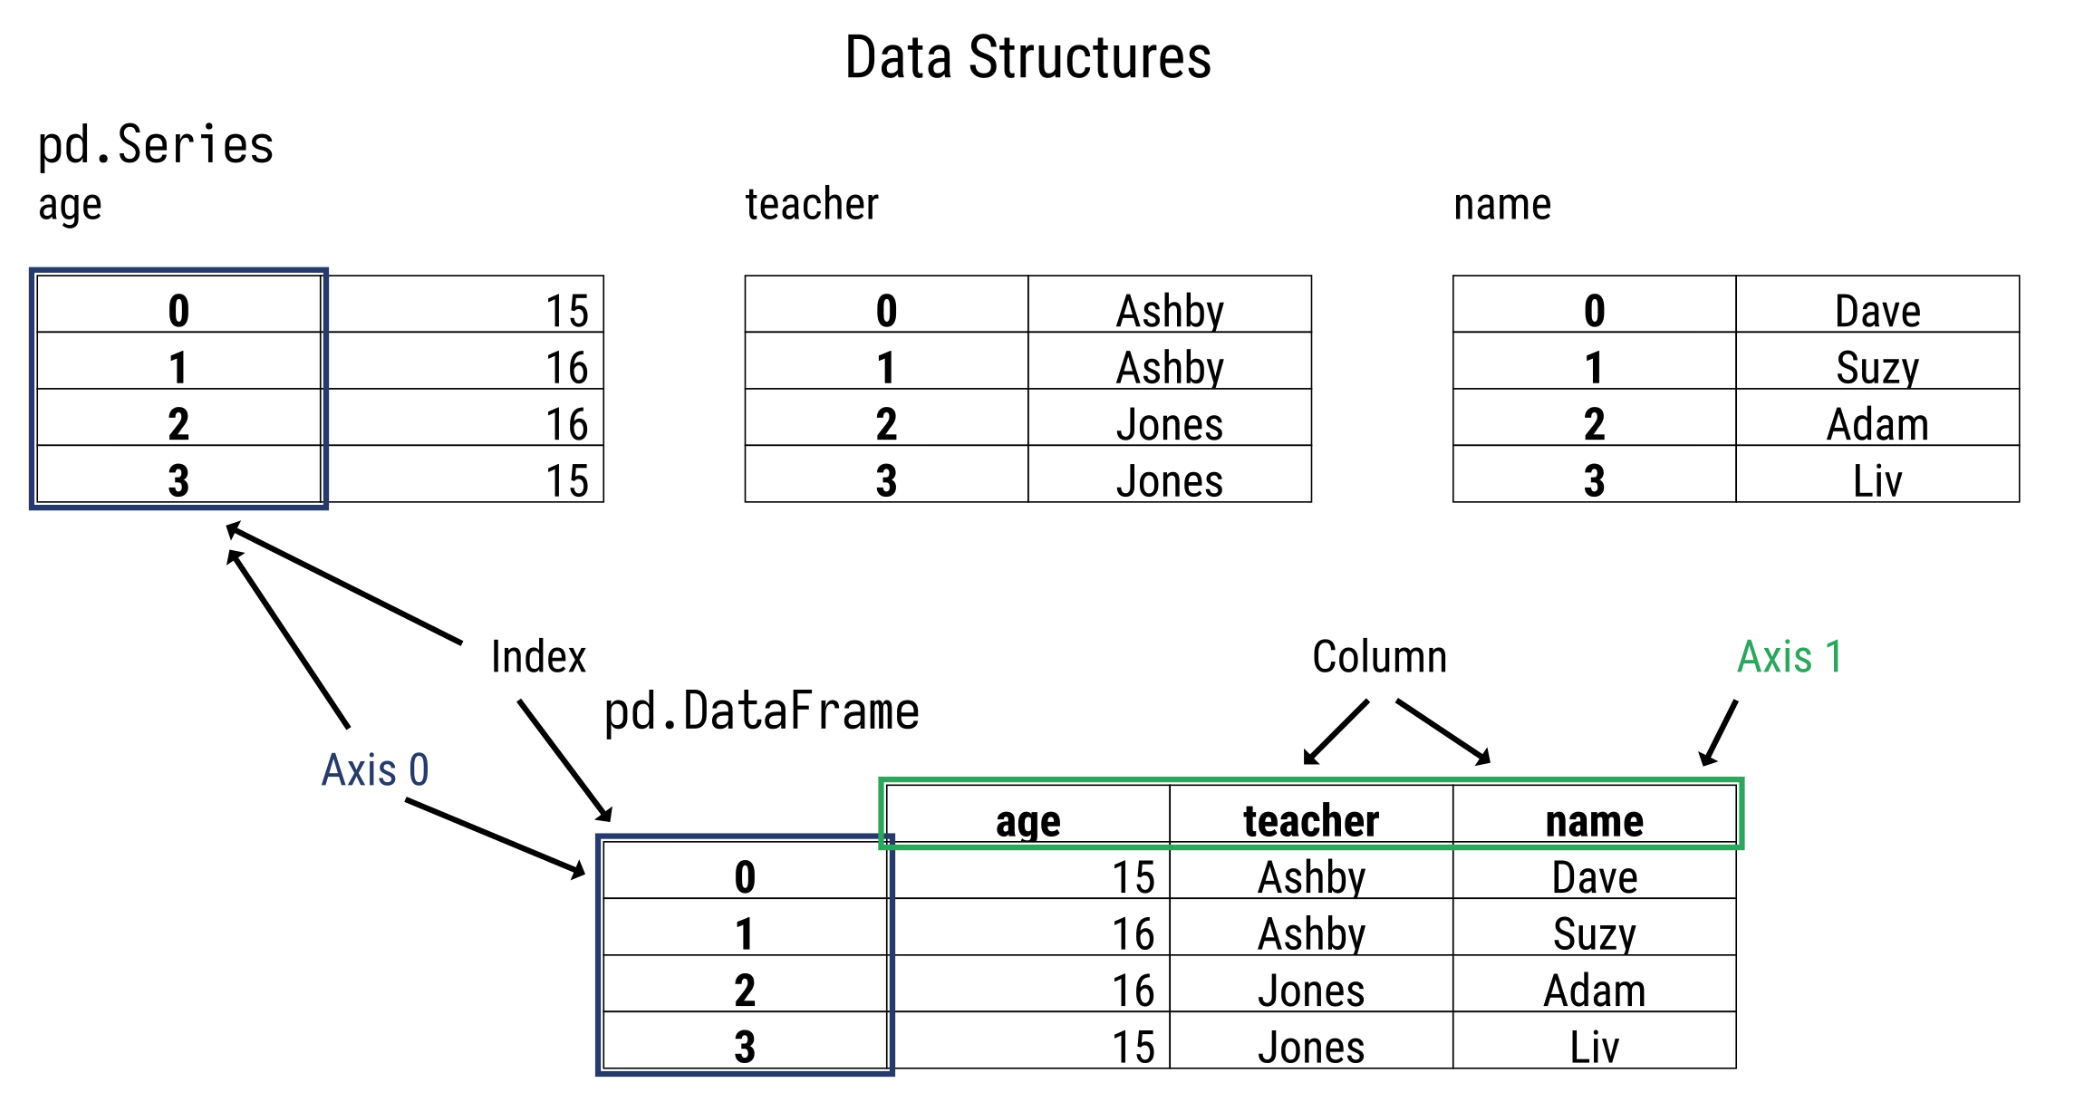</img>

Mối liên hệ giữa DataFrame và Series

## 3.2 Exercises

1. If you had a spreadsheet with data, which pandas data structure would you use to hold the data? Why?

    $\to$ DataFrame

2. If you had a database with data, which pandas data structure would you use to hold the data? Why?

    $\to$ DataFrame

# Chapter 4: Series Introduction

- one-dimensional data
- has a few more bits of data, including an index and a name
- A common idea through pandas is the notion of an axis
    - Because a series is one-dimensional, it has a single axis—the index.

In [2]:
series = {
    'index': [0, 1, 2, 3],
    'data': [145, 142, 38, 13],
    'name': 'song'
}

In [3]:
def get(series, idx):
    value_idx = series['index'].index(idx) 
    return series['data'][value_idx]

In [4]:
get(series, 1)

142

## 4.1 The index abstraction

In [5]:
songs = {
    'index': ['Paul', 'John', 'George', 'Ringo'],
    'data': [145, 142, 38, 13],
    'name': 'counts'
}

get(songs, 'Paul')

145

## 4.2 The pandas Series

In [6]:
import pandas as pd

In [7]:
songs2 = pd.Series([145, 142, 38, 13], name="counts")

In [8]:
songs2

0    145
1    142
2     38
3     13
Name: counts, dtype: int64

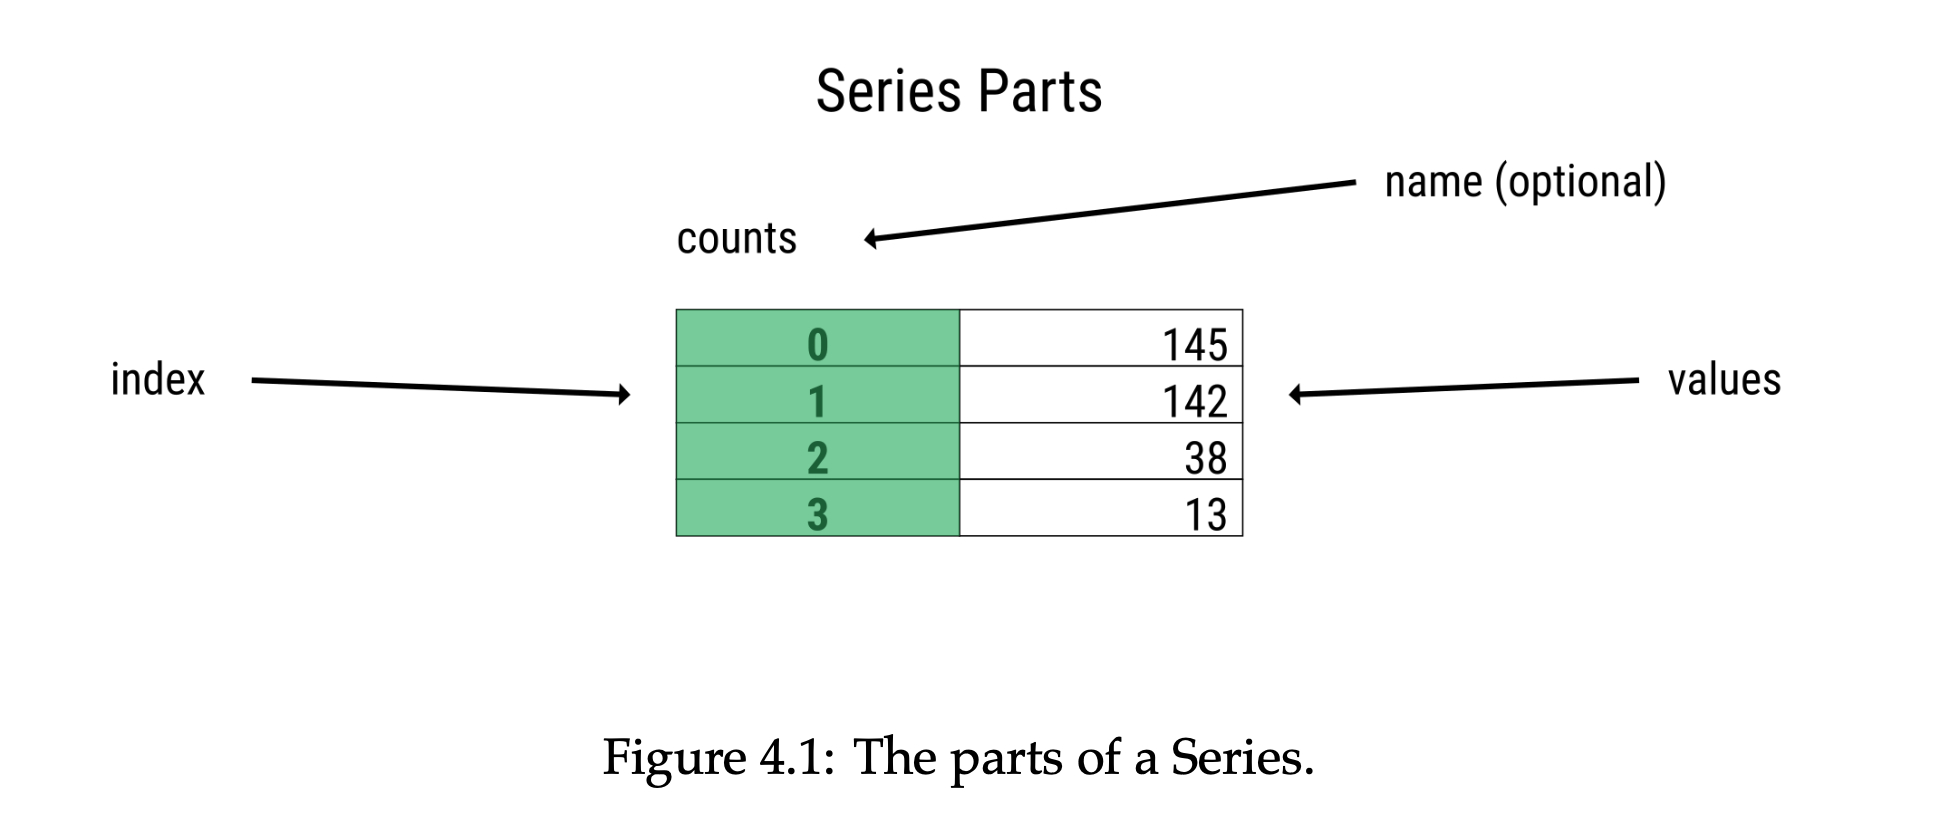</img>

In [9]:
songs2.index

RangeIndex(start=0, stop=4, step=1)

**The actual data (or values) for a series does not have to be numeric or homogeneous.**

In [13]:
class Foo:
    pass
ringo = pd.Series(['Richard', 'Starkey', 13, Foo()])
ringo

0                                 Richard
1                                 Starkey
2                                      13
3    <__main__.Foo object at 0x1331c9bd0>
dtype: object

- Kiểu object khi các thành phần xong series không đồng nhất kiểu dữ liệu
- Kiểu object được dùng cho string series
- Khi series là dạng date string, cần chuyển sang `datetime64[ns]`

## 4.3 The NaN value

In [18]:
import numpy as np

In [21]:
nan_series = pd.Series([1, 2, 3, np.nan])
nan_series

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [22]:
nan_series.count()

3

Khi dùng `.count()` nó sẽ trả về số lượng phần tử không phải `nan` trong series

In [23]:
nan_series.size

4

Để kiểm tra số lượng `nan` tính chênh lệch giữa `.size` và `.count()`

In [26]:
len(nan_series) # tương tự .size

4

Các dạng dữ liệu được xem là NULL trong pandas:
- `None`
- `NaN`
- `nan`
- `<NA>`
- `null`

## 4.4 Optional Integer Support for NaN

- `int64` type does not support missing data.
- As of pandas 0.24, there is optional support for another integer type that can hold missing values denoted as `<NA>` below.
- The documentation calls this type the nullable integer type.
- When you create a series, you can pass in `dtype='Int64'` (note the capitalization):

In [32]:
nan_series2 = pd.Series([1, 2, 3, None], dtype='Int64')
nan_series2

0       1
1       2
2       3
3    <NA>
dtype: Int64

In [33]:
nan_series2.count()

3

In [34]:
nan_series

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [37]:
nan_series.astype('Int64')

0       1
1       2
2       3
3    <NA>
dtype: Int64

## 4.5 Similar to NumPy

In [41]:
numpy_series = np.array([145, 142, 38, 13])

In [42]:
songs2[1]

142

In [43]:
numpy_series[1]

142

They both have methods in common:

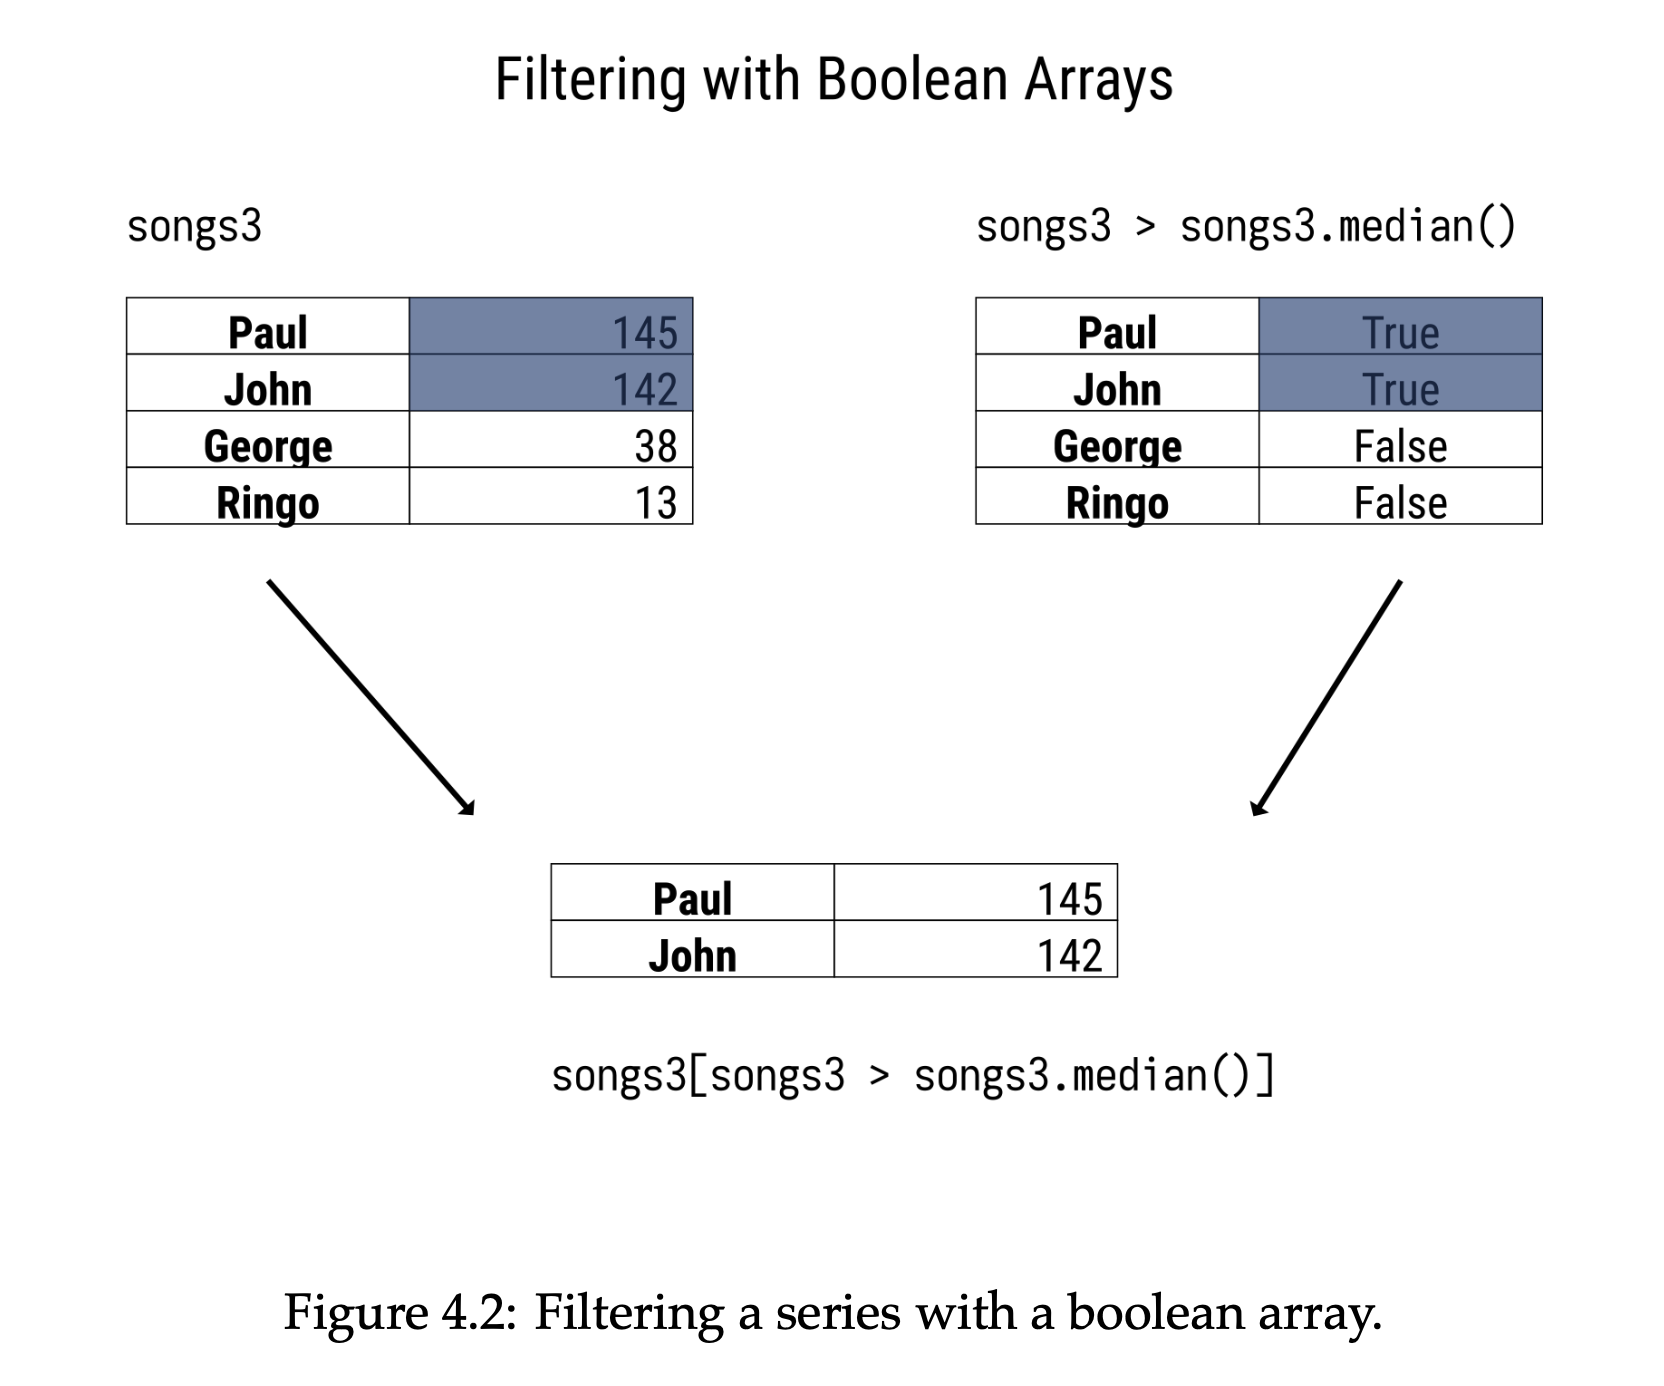</img>

In [44]:
songs2.mean()

84.5

In [45]:
numpy_series.mean()

84.5

In [48]:
mask = songs2 > songs2.median() # boolean array

In [49]:
mask

0     True
1     True
2    False
3    False
Name: counts, dtype: bool

<br>
<br>

**Once we have a mask, we can use that as a filter.**

In [51]:
songs2[mask]

0    145
1    142
Name: counts, dtype: int64

In [53]:
numpy_series[numpy_series > np.median(numpy_series)]

array([145, 142])

## 4.6 Categorical Data

- When you load data, you can indicate that the data is categorical.
- If we know that our data is limited to a few values;
- Categorical values have a few benefits:
    - Use less memory than strings
    - Use less memory than strings
    - Improve performance
    - Can perform operations on categories
    - Enforce membership on values

Để dùng ta có thể thêm `dtype="category"` hoặc `.astype("category")`

In [54]:
category = pd.Series(['m', 'l', 'xs', 's', 'xl'], dtype="category")
category

0     m
1     l
2    xs
3     s
4    xl
dtype: category
Categories (5, object): ['l', 'm', 's', 'xl', 'xs']

In [56]:
category.cat.ordered # Kiểm tra category bằng cách inspect vào cat attribtue

False

In [58]:
ordered_cate = pd.Series(['m', 'l', 'xs', 's', 'xl'])
ordered_cate_type = pd.api.types.CategoricalDtype(categories=['xs', 's', 'm', 'l', 'xl'], ordered=True)
ordered_cate.astype(ordered_cate_type)

0     m
1     l
2    xs
3     s
4    xl
dtype: category
Categories (5, object): ['xs' < 's' < 'm' < 'l' < 'xl']

In [61]:
category.cat.reorder_categories(new_categories=['xs', 's', 'm', 'l', 'xl'], ordered=True)

0     m
1     l
2    xs
3     s
4    xl
dtype: category
Categories (5, object): ['xs' < 's' < 'm' < 'l' < 'xl']

<br>
<br>

**Đối với string hoặc datetime có attribute `str` hoặc `dt` để truy cập vào từng đối tượng**

In [65]:
s3 = pd.Series(['a', 'b', 'c'])

In [69]:
s3.str.upper()

0    A
1    B
2    C
dtype: object

<br>
<br>

**Series Overview Attributes and Methods:**

|Method|Description|
|------|-----------|
| `pd.Series(data=None, index=None, dtype=None, name=None, copy=False)`|Create a series from data (sequence, dictionary, or scalar).|
|`s.index`|Access index of series.|
|`s.astype(dtype, errors='raise')`|Cast a series to dtype. To ignore errors (and return original object) use `errors='ignore'`.|
|`s[boolean_array]`|Return values from s where boolean_array is True.|
|`s.cat.ordered`|Determine if a categorical series is ordered.|
|`s.cat.reorder_categories(new_categories, ordered=False)`|Add categories (potentially ordered) to the series. new_categories must include all categories.|

## 4.7 Summary

- The Series object is a one-dimensional data structure.
- It can hold numerical data, time data, strings, or arbitrary Python objects.
- If you are dealing with numeric data, using pandas rather than a Python list will benefit you.
- Pandas is faster, consumes less memory, and comes with built- in methods that are very useful to manipulate the data.
- Also, the index abstraction allows for accessing values by position or label.
- A Series can also have empty values and has some similarities to NumPy arrays.

## 4.8 Exercises

**1. Using Jupyter, create a series with the temperature values for the last seven days. Filter out the values below the mean.**

In [71]:
temp = pd.Series([30, 45, 23, 32, 34, 21, 13])
temp.size

7

In [73]:
temp[temp < temp.mean()]

2    23
5    21
6    13
dtype: int64

**2. Using Jupyter, create a series with your favorite colors. Use a categorical type.**

In [74]:
color = pd.Series(['red', 'blue', 'green'], dtype='category')
color

0      red
1     blue
2    green
dtype: category
Categories (3, object): ['blue', 'green', 'red']

# Chapter 5: Series Deep Dive

## 5.1 Loading the Data

In [2]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/' \
      'vehicles.csv.zip'
df = pd.read_csv(url, dtype='object')

In [3]:
city_mpg = df.city08.copy().astype('int64')
highway_mpg = df.highway08.copy().astype('int64')

In [5]:
city_mpg

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

In [88]:
highway_mpg

0        25
1        14
2        33
3        12
4        23
         ..
41139    26
41140    28
41141    24
41142    24
41143    21
Name: highway08, Length: 41144, dtype: int64

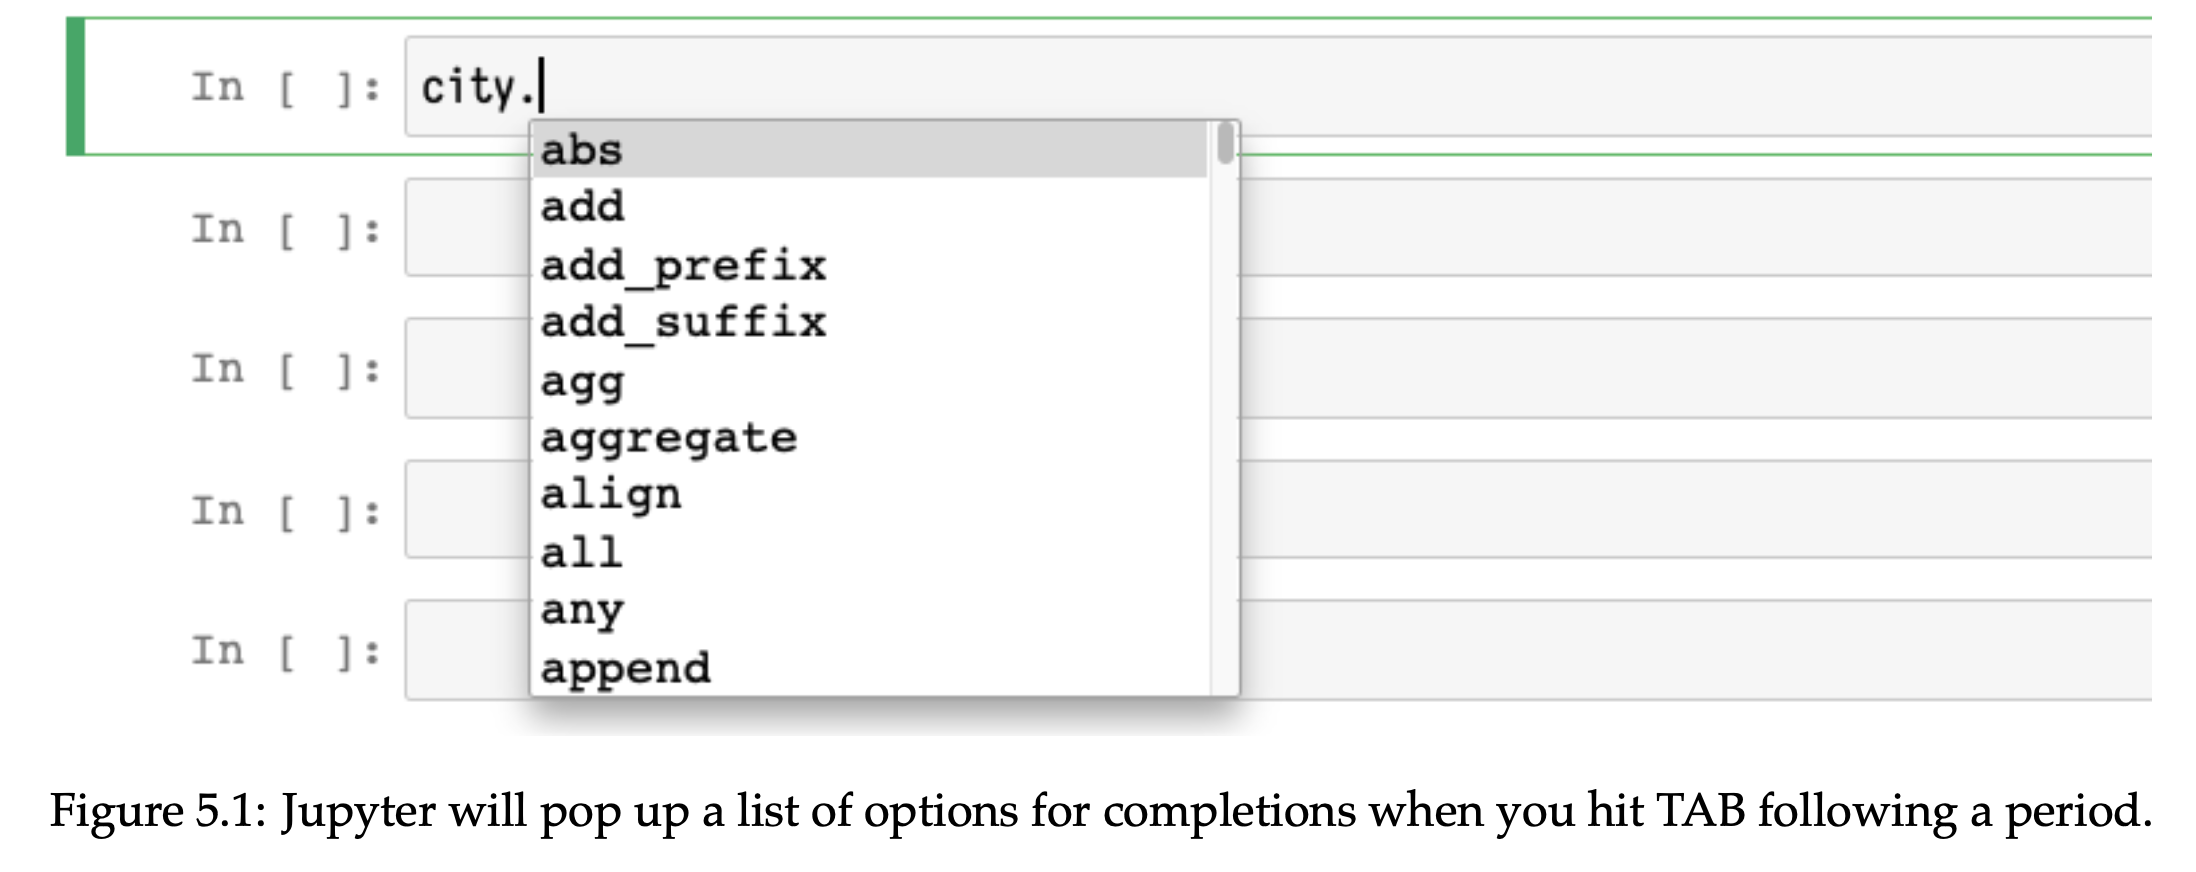</img>

## 5.2 Series Attributes

In [92]:
len(
    dir(city_mpg) # return list of attributes in city_mpg
)

411

- Có 411 attributes trong series
- Pythons list hoặc dict chỉ có khoảng 40

**Summary:**
- Dunder methods (`.__add__`, `.__iter__`, etc) provide many numeric operations, looping, attribute access, and index access.
- Corresponding operator methods for many of the numeric operations allow us to tweak the behavior (there is an .add method in addition to `.__add__`).
- Các hàm tổng hợp mà giảm hoặc tổng hợp giá trị trong series thành scalar value (`.mean`, `.max`, `.sum`, ...)
- Convert method, bắt đầu bằng `.to_...`
- Manipulation methods: `.sort_values`, `.drop_duplicates` trả về series với cùng index
- Indexing and accessor methods: `.loc` hoặc `.iloc`
- String manipulation `.str`
- Date manipulation `.dt`
- Categorical manipulation `.cat`
- Plotting `.plot`
- Transformation methods `.unstack`, `.add`, `reset_index`, `transform`
- Attribute như `.index` hoặc `.dtype`
- Một số private attribute không cần quan tâm

# Chapter 6: Operators (& Dunder Methods)

## 6.2 Dunder Methods

In [95]:
2 + 4

6

In [96]:
(2).__add__(4)

6

In [97]:
(city_mpg + highway_mpg)/2

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
41139    22.5
41140    24.0
41141    21.0
41142    21.0
41143    18.5
Length: 41144, dtype: float64

## 6.3 Index Alignment

In [98]:
s1 = pd.Series([10, 20, 30], index=[1,2,2])
s2 = pd.Series([35, 44, 53], index=[2,2,4])
s1 + s2

1     NaN
2    55.0
2    64.0
2    65.0
2    74.0
4     NaN
dtype: float64

## 6.4 Broadcasting

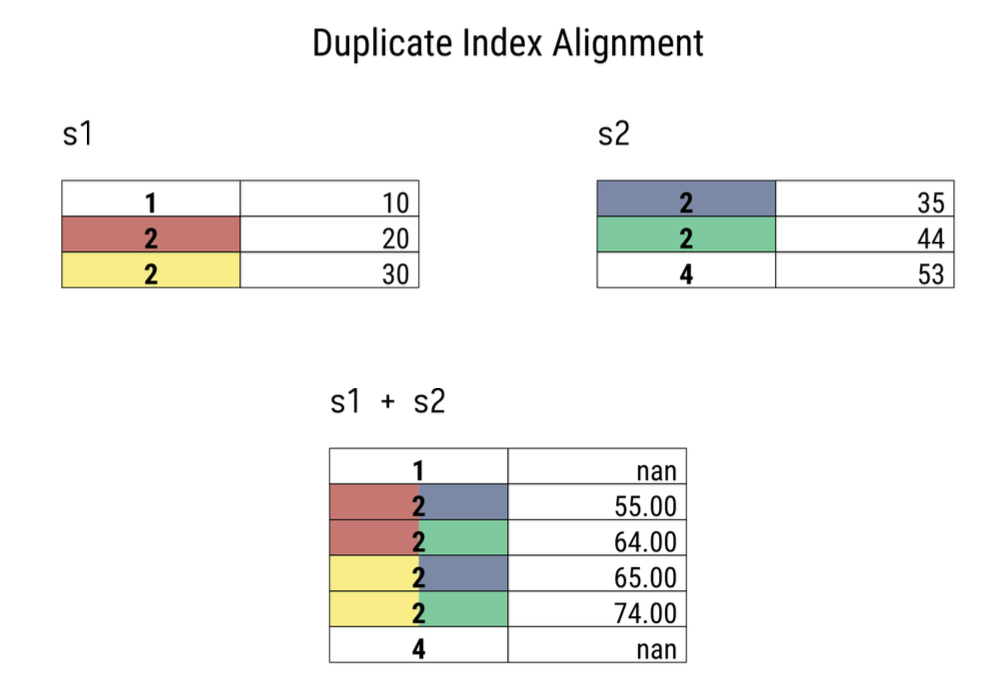</img>

In [103]:
s1.add(s2, fill_value=0)

1    10.0
2    55.0
2    64.0
2    65.0
2    74.0
4    53.0
dtype: float64

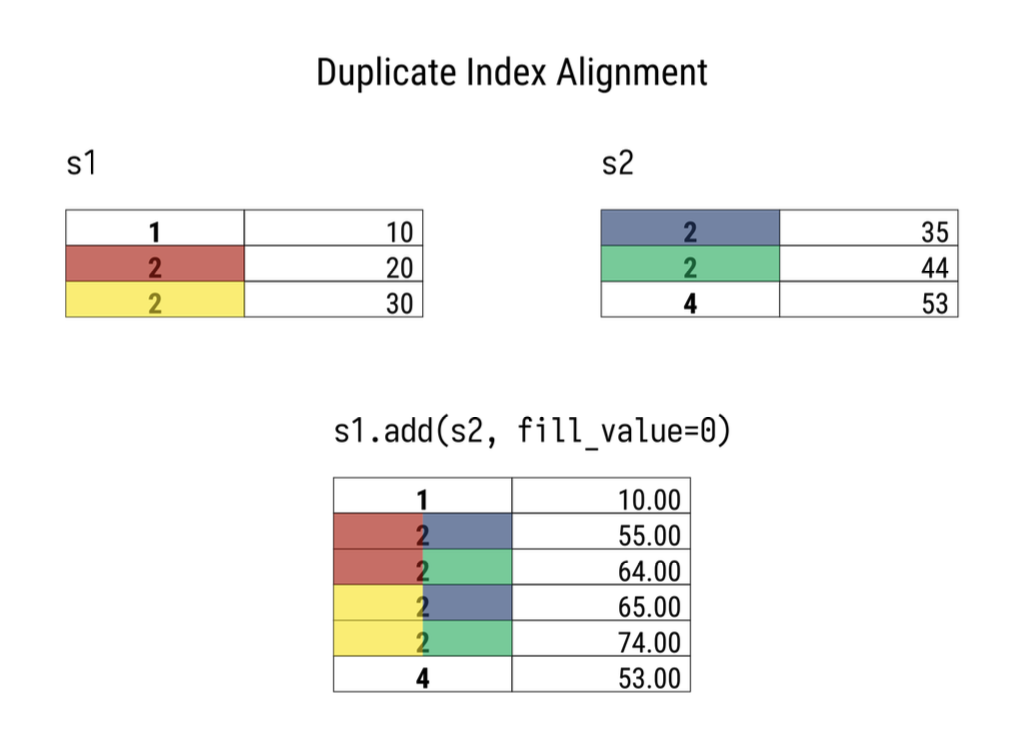</img>

**Operators:**
- `+` `-` `*` `/`
- `//` floor division
- `%` modulus
- `@` matrix multiplication
- `**` power
- `<` `<=` `==` `>` `>=` `!=`
- `&` binary and
- `^` binary xor
- `|` binary or
- `~` not

## 6.5 Iteration

`.__iter__` dùng để loop qua các phần tử trong series

In [104]:
s1

1    10
2    20
2    30
dtype: int64

In [106]:
for elem in s1:
    print('elem', elem)

elem 10
elem 20
elem 30


## 6.7 Chaining

- Vì hầu hết các methods của pandas không mutate data
- Chaining giúp dễ đọc code
- Có thể chain với operator nhưng phải đóng mở ngoặc

In [108]:
(city_mpg + 
     highway_mpg) / 2

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
41139    22.5
41140    24.0
41141    21.0
41142    21.0
41143    18.5
Length: 41144, dtype: float64

In [109]:
(city_mpg
    .add(highway_mpg)
    .div(2)
)

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
41139    22.5
41140    24.0
41141    21.0
41142    21.0
41143    18.5
Length: 41144, dtype: float64

In [110]:
city_mpg \
    .add(highway_mpg) \
    .div(2)

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
41139    22.5
41140    24.0
41141    21.0
41142    21.0
41143    18.5
Length: 41144, dtype: float64

|Method|Operator|Description|
|:--:|:--:|:--:|
|`s.add(s2)`|s + s2|Adds series|
|`s.radd(s2)`|s2 + s|Adds series|
|`s.sub(s2)`|s - s2|Subtracts series|
|`s.rsub(s2)`|s2 - s|Subtracts series|
|`s.mul(s2)` `s.multiply(s2)`|s * s2|Multiplies series|
|`s.rmul(s2)`|s2 * s|Multiplies series|
|`s.div(s2)` `s.truediv(s2)`|s / s2|Divides series|
|`s.rdiv(s2)` `s.rtruediv(s2)`|s2 / s|Divides series|
|`s.mod(s2)`|s % s2|Modulo of series division|
|`s.rmod(s2)`|s2 % s|Modulo of series division|
|`s.floordiv(s2)`|s // s2|Floor divides series|
|`s.rfloordiv(s2)`|s2 // s|Floor divides series|
|`s.pow(s2)`|s ** s2|Exponential power of series|
|`s.rpow(s2)`|s2 ** s|Exponential power of series|
|`s.eq(s2)`|s2 == s|Elementwise equals of series|
|`s.ne(s2)`|s2 != s|Elementwise not equals of series|
|`s.gt(s2)`|s > s2|Elementwise greater than of series|
|`s.ge(s2)`|s >= s2|Elementwise greater than or equals of series|
|`s.lt(s2)`|s < s2|Elementwise less than of series|
|`s.le(s2)`|s <= s2|Elementwise less than or equals of series|
|`np.invert(s)`|~s|Elementwise inversion of boolean series (no pandas method).|
|`np.logical_and(s, s2)`|s & s2|Elementwise logical and of boolean series (no pandas method).|
|`np.logical_or(s, s2)`|s \| s2|Elementwise logical or of boolean series (no pandas method).|

## 6.9 Exercises

**1. Add a numeric series to itself.**

In [114]:
s1.add(s1)

1    20
2    40
2    60
dtype: int64

<br>

**2. Add 10 to a numeric series.**

In [115]:
s1.add(10)

1    20
2    30
2    40
dtype: int64

# Chapter 7: Aggregate Methods

Your boss doesn’t care about that level of detail. They care about:
- How many people came in (count)
- How much food was ordered (count)
- What was the total revenue (sum)
- When did people come (skew)
- What was the average purchase amount (mean)

## 7.1 Aggregations

 Calculate the mean value of a series

In [116]:
city_mpg.mean()

18.369045304297103

There are also a few aggregate properties. These start with .is_. You do not call them; they will evaluate to True or False:

In [118]:
city_mpg.is_unique

False

In [120]:
city_mpg.is_monotonic_increasing

False

In [123]:
city_mpg.sort_values().is_monotonic_increasing

True

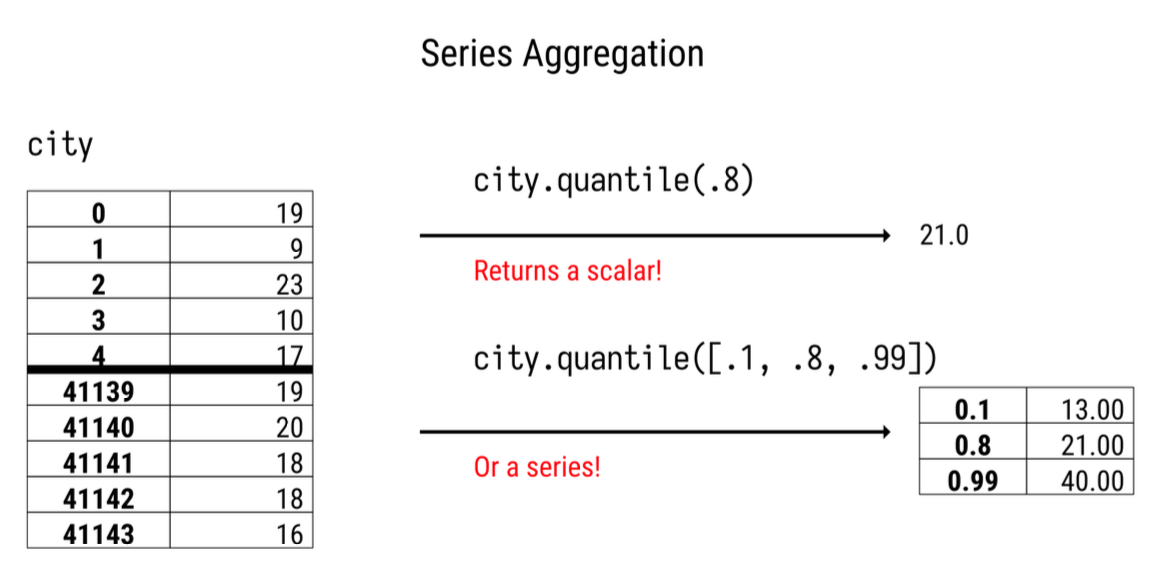</img>

In [124]:
city_mpg.quantile()

17.0

In [127]:
city_mpg.median()

17.0

In [125]:
city_mpg.quantile(0.9)

24.0

In [128]:
city_mpg.quantile([.25, .5, .75])

0.25    15.0
0.50    17.0
0.75    20.0
Name: city08, dtype: float64

## 7.2 Count and Mean of an Attribute

**Trick: khi muốn tính tổng trường hợp thoả điều kiện**

In [130]:
city_mpg \
    .gt(20) \
    .sum()

10272

**Trick: khi muốn % trường hợp thoả điều kiện**

In [139]:
city_mpg \
    .gt(20) \
    .mul(100) \
    .mean() \
    .round(3)

24.966

## 7.3 `.agg` and Aggregation Strings

In [157]:
city_mpg.agg('mean') # return a scalar value

18.369045304297103

In [159]:
import numpy as np
def last(s):
    return s.iloc[-1]
city_mpg.agg(['mean', 'median', np.var, last]) # return a series

mean      18.369045
median    17.000000
var       62.503036
last      16.000000
Name: city08, dtype: float64

<br><br>

**Below are strings that the .agg method accepts.**

|Method|Description|
|---|---|
|`all`|Returns True if every value is truthy.|
|`any`|Trả về True nếu any value là truthy|
|`autocorr`|Returns Pearson correlation of series with shifted self. Can override lag as keyword|
|`corr`|Returns Pearson correlation of series with other series. Need to specify other.|
|`count`|Returns count of non-missing values.|
|`cov`|Return covariance of series with other series. Need to specify other.|
|`dtype`|Type of the series|
|`dtypes`|Type of the series|
|`empty`|True if no values in series.|
|`hasnans`|True if missing values in series.|
|`idxmax`|Returns index value of maximum value.|
|`idxmin`|Returns index value of minimum value. 'is_monotonic' True if values always increase.|
|`is_monotonic`|True if values always increase.|
|`is_monotonic_decreasing`|True if values always decrease.|
|`is_monotonic_increasing`|True if values always increase.|
|`kurt`|Return ”excess” kurtosis (0 is normal distribution). Values greater than 0 have more outliers than normal.|
|`mad`|Return the mean absolute deviation.|
|`max`|Return the maximum value.|
|`mean`|Return the mean value.|
|`median`|Return the median value.|
|`min`|Return the minimum value.|
|`nbytes`|Return the number of bytes of the data.|
|`ndim`|Return the number of dimensions (1) of the data.|
|`nuique`|Return the count of unique values.|
|`quantile`|Return the median value. Can override q to specify other quantile.|
|`sem`|Return the unbiased standard error.|
|`size`|Return the size of the data.|
|`skew`|Return the unbiased skew of the data. Negative indicates tail is on the left side.|
|`std`|Return the standard deviation of the data.|
|`sum`|Return the sum of the series.|

## 7.5 Exercises

With a dataset of your choice:
1. Find the count of non-missing values of a series.
2. Find the number of entries of a series.
3. Find the number of unique entries of a series.
4. Find the mean value of a series.
5. Find the maximum value of a series.
6. Use the .agg method to find all of the above.

In [170]:
city_mpg.agg(
    {
        'Number of non-missing values':'count', 
        'Number of entries': len, 
        'Number of unique': 'nunique', 
        'Mean': 'mean', 
        'Max': 'max'
    }
)

Number of non-missing values    41144.000000
Number of entries               41144.000000
Number of unique                  105.000000
Mean                               18.369045
Max                               150.000000
Name: city08, dtype: float64

# Chapter 8: Conversion Methods

## 8.1 Automatic Conversion

Tại pandas 1.0, hàm convert_dtype() cố gắng chuyển Series sang dạng hỗ trợ `pd.NA`

Ví dụ: int64 $\to$ It64

In [173]:
city_mpg.convert_dtypes()

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: Int64

In [174]:
city_mpg.astype('Int64')

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: Int64

In [176]:
city_mpg.astype('Int8', errors='ignore')

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

<mark>**Không chuyển được từ Int64 về Int8**</mark>

`TypeError: cannot safely cast non-equivalent int64 to int8`

In [179]:
np.iinfo('int64')

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

In [180]:
np.iinfo('int8')

iinfo(min=-128, max=127, dtype=int8)

In [182]:
np.finfo('float64')

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [184]:
np.finfo('float16')

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

## 8.2 Memory Usage

In [188]:
city_mpg.nbytes

329152

In [189]:
city_mpg.astype('Int16').nbytes

123432

In [195]:
city_mpg.memory_usage()

329284

Using `.nbytes` with object types only shows how much memory the Pandas object is taking.

In [197]:
city_mpg.memory_usage(deep=True)

329284

**`deep=True` với string nó sẽ nhiều hơn vì nó là kiểu object**

**Nếu lưu từ string sang category thì bộ nhớ sẽ tốn ít hơn, check bằng `memory_usage`**

## 8.3 String and Category Types

In [198]:
city_mpg.astype(str)

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: object

In [199]:
city_mpg.astype('category')

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: category
Categories (105, int64): [6, 7, 8, 9, ..., 137, 138, 140, 150]

- A categorical series is useful for string data and can result in large memory savings.
- This is because pandas stores Python strings when you have string data
- When you convert it to categorical data, pandas no longer uses Python strings for each value but optimizes it, so repeating values are not duplicated.
- You still have all of the functionality found off of the `.str` attribute, but it comes with potentially large memory savings (if you have many duplicate values) and performance boosts as you do not need to perform as many string operations.

## 8.4 Ordered Categories

Để tạo ordered category type sử dụng class `CategoryDtype`

In [13]:
city_type = pd.CategoricalDtype(
    categories=sorted(set(city_mpg)),
    ordered=True
)
city_mpg.astype(city_type)

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: category
Categories (105, int64): [6 < 7 < 8 < 9 ... 137 < 138 < 140 < 150]

The following table lists the types that you can pass into .astype.

|String or Type|Description|
|--|--|
|`str` `'str'`|Convert type to Python string|
|`'string'`|Convert type to pandas string (supports `pd.NA`)|
|`int` `'int'` `'int64'`|Convert type to NumPy int64|
|`'int32'` `uint32`|Convert type to 32 signed or unsigned NumPy integer (can also use 16 and 8).|
|`Int64`|Convert type to pandas Int64 (supports `pd.NA`). Might complain when you|
|`float` `'float'` `'float64'`|Convert type to NumPy float64 (can also support 32 or 16).|
|`'category'`|Convert type to categorical (supports `pd.NA`). Can also use instance of `CategoricalDtype`.|
|`dates`|Don’t use this for date conversion, use `pd.to_datetime`.|

## 8.5 Converting to Other Types

- `.to_numpy()` hay `.values`: trả về một numpy array
- `.to_list()`: trả về python list
- `.to_frame()`: trả về dataframe

In [14]:
city_mpg.to_frame()

city08
0          19
1           9
2          23
3          10
4          17
...       ...
41139      19
41140      20
41141      18
41142      18
41143      16

[41144 rows x 1 columns]

In [15]:
city_mpg.to_numpy()

array([19,  9, 23, ..., 18, 18, 16])

Ngoài ra còn có method để chuyển thành:
- `.to_csv`
- `.to_excel`
- `.to_hdf`: hdf5
- `.to_sql`
- `.to_json`

# Chapter 9: Manipulation Methods

## 9.1 `.apply` and `.where`

### 9.1.1 `.apply`

- The `.apply` is a curious method
- Không nên dùng
- Tuy nhiên đôi khi có ích
- Nó giúp apply function element-wise to every value
- If you pass in a NumPy function that works on an array, it will broadcast the operation to the series.
- Hàm được call qua từng value trong series
- Nếu có 1.000.000 values thì hàm sẽ được gọi 1.000.000 lần
- It breaks out of the fast vectorized code paths we can leverage in pandas and puts us back to using slow Python code.
  

In [23]:
def gt20(val):
    return val > 20

In [24]:
%%timeit
city_mpg.apply(gt20)

3.02 ms ± 13.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%%timeit
city_mpg.gt(20)

24.5 µs ± 120 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Khi dùng `gt()` thì thời gian nhanh hơn rất nhiều vì nó có vectorized

### 9.1.2 `.where`

In [29]:
make = df.make

<br>

**I might want to limit my dataset to show the top five makes and label everything else as Other.**

In [30]:
make

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object

In [34]:
make.groupby(make).count().sort_values(ascending=False)

make
Chevrolet                           4003
Ford                                3371
Dodge                               2583
GMC                                 2494
Toyota                              2071
                                    ... 
Environmental Rsch and Devp Corp       1
Excalibur Autos                        1
ASC Incorporated                       1
Lambda Control Systems                 1
Fisker                                 1
Name: make, Length: 136, dtype: int64

<br>

Tất cả các bước trên chỉ cần dùng hàm `value_counts()`

In [36]:
make.value_counts()

make
Chevrolet                      4003
Ford                           3371
Dodge                          2583
GMC                            2494
Toyota                         2071
                               ... 
Volga Associated Automobile       1
Panos                             1
Mahindra                          1
Excalibur Autos                   1
London Coach Co Inc               1
Name: count, Length: 136, dtype: int64

In [43]:
top5 = make.value_counts().index[:5]
def generalize_top5(val):
    if val in top5:
        return val
    return 'Other'

In [44]:
make.apply(generalize_top5)

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
41139    Other
41140    Other
41141    Other
41142    Other
41143    Other
Name: make, Length: 41144, dtype: object

Việc sử dụng hàm apply bên trên `generalize_top5` được gọi 41144 lần tương ứng với số lượng phần tử trong Series

Sử dụng cách khác tối ưu hơn là `.where`

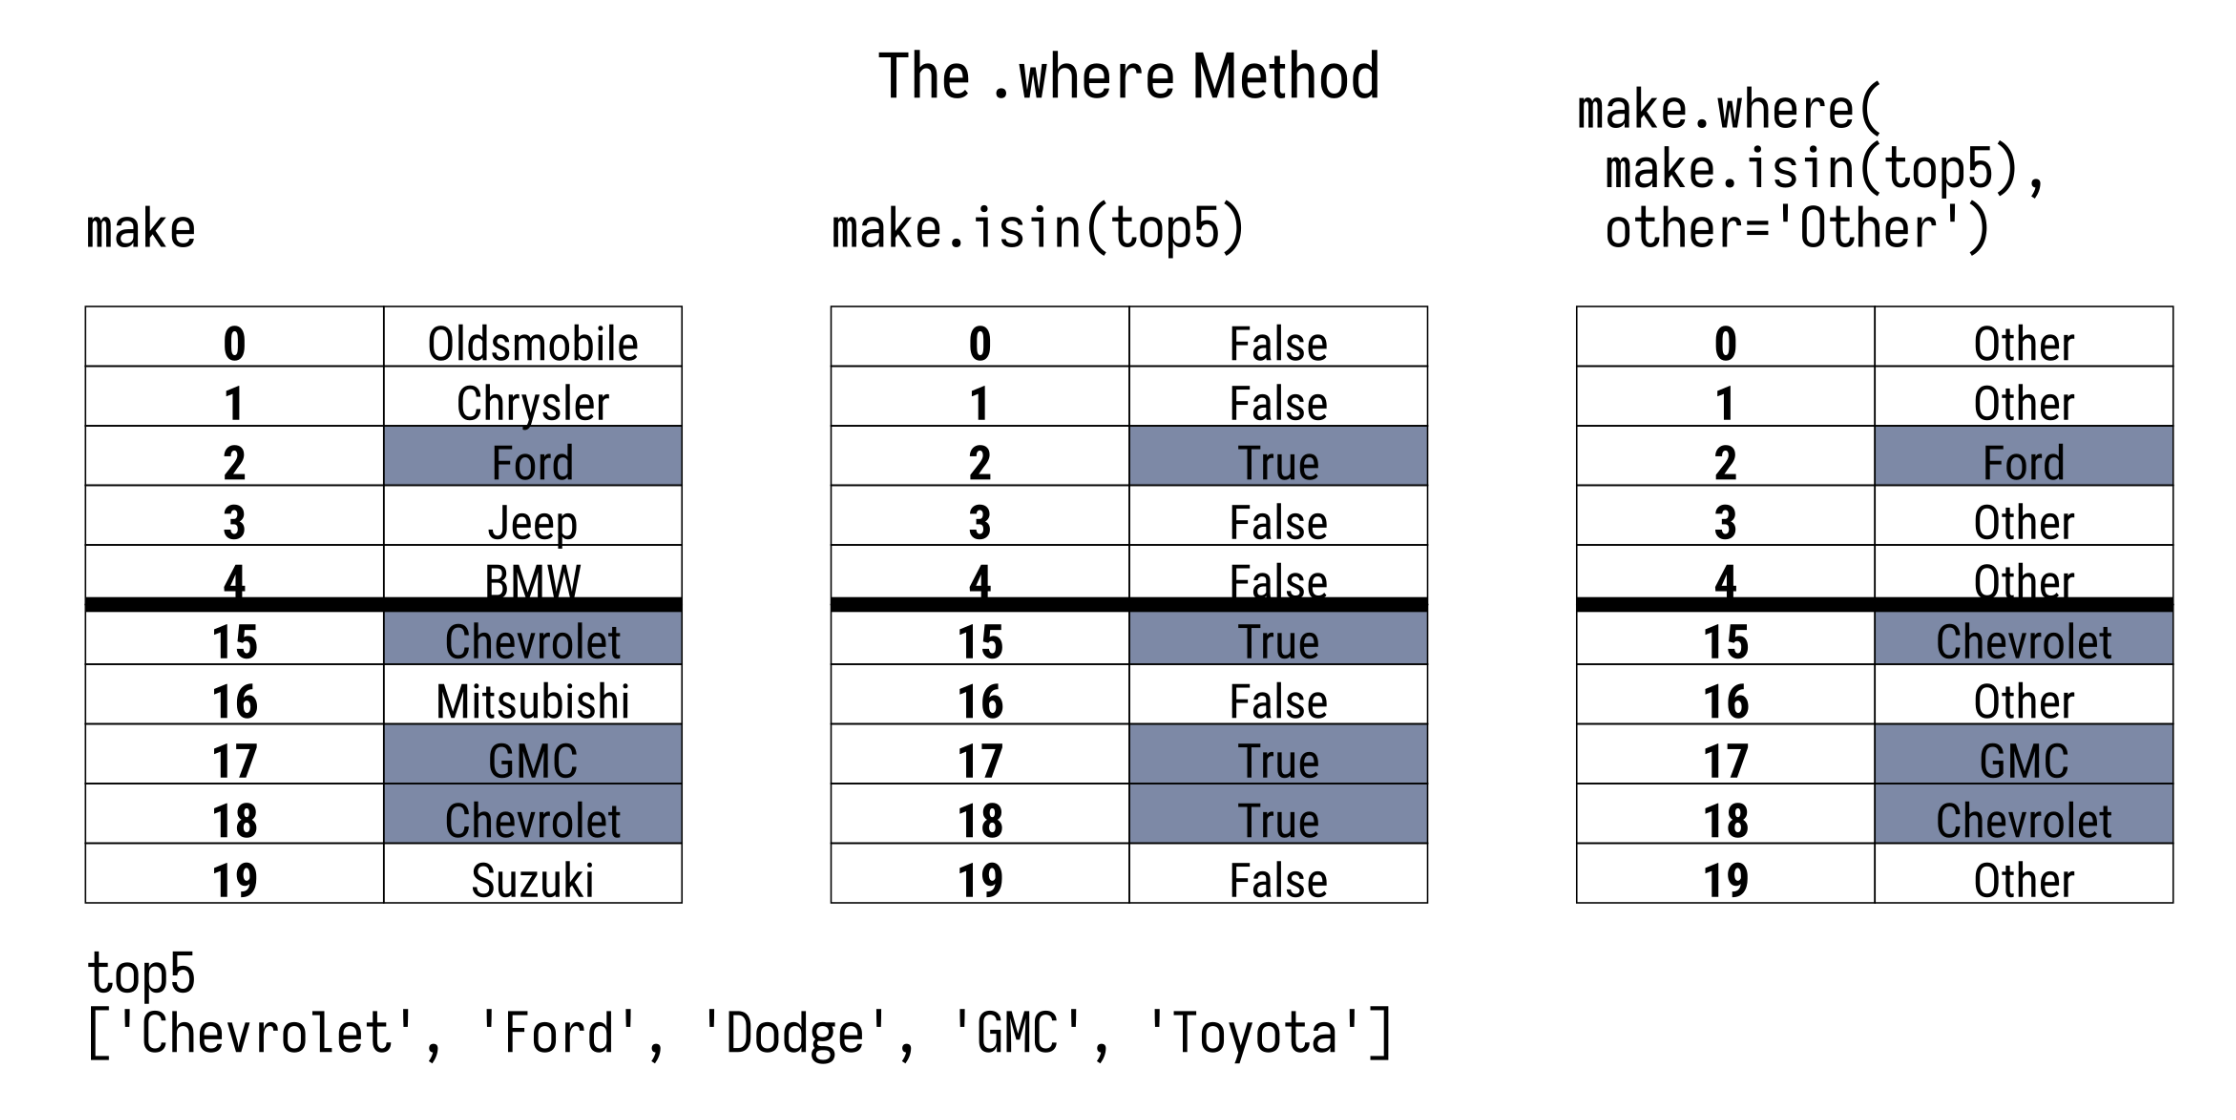</img>

**`.where` giữ giá trị khi index=True và parameter other để truyền values là khi index=False**

In [48]:
make.where(
    make.isin(top5),
    other="Other"
)

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
41139    Other
41140    Other
41141    Other
41142    Other
41143    Other
Name: make, Length: 41144, dtype: object

In [49]:
%%timeit
make.apply(generalize_top5)

21.1 ms ± 211 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [60]:
%%timeit
make.where(make.isin(top5), 'Other')

1.07 ms ± 4.22 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### 9.1.3 `.mask`

- Ngược lại với `.where`
- Khi `False` khi giữ giá trị
- Khi `True` thì gán other

In [64]:
make.mask(~make.isin(top5), 'Other')

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
41139    Other
41140    Other
41141    Other
41142    Other
41143    Other
Name: make, Length: 41144, dtype: object

## 9.2 If Else with Pandas

- If I wanted to keep the top five makes
- use `Top10` for the remainder of the top ten makes
- `Other` for the rest

<br>

**Cách 1: Dùng apply**

In [68]:
vc = make.value_counts()
top5 = vc.index[:5]
top10 = vc.index[:10]

In [69]:
def generalize(val):
    if val in top5: 
        return val
    elif val in top10: 
        return 'Top10'
    else: 
        return 'Other'

In [72]:
make.apply(generalize).value_counts()

make
Other        19400
Top10         7222
Chevrolet     4003
Ford          3371
Dodge         2583
GMC           2494
Toyota        2071
Name: count, dtype: int64

<br>

**Cách 2: Sử dụng method `.where`**

In [74]:
(make
 .where(make.isin(top5), 'Top10')
 .where(make.isin(top10), 'Other')
 .value_counts()
)

make
Other        19400
Top10         7222
Chevrolet     4003
Ford          3371
Dodge         2583
GMC           2494
Toyota        2071
Name: count, dtype: int64

<br>

**Cách 3: Dùng select trong numpy**

In [80]:
import numpy as np
pd.Series(
    np.select(
        [make.isin(top5), make.isin(top10)],
        [make, 'Top10'],
        'Other'
    ),
    index = make.index
).value_counts()

Other        19400
Top10         7222
Chevrolet     4003
Ford          3371
Dodge         2583
GMC           2494
Toyota        2071
Name: count, dtype: int64

## 9.3 Missing Data

Đếm số lượng missing trong Series

In [82]:
cyl = df.cylinders
(cyl
 .isna()
 .sum()
)

206

In [83]:
missing = cyl.isna()
make.loc[missing]

7138     Nissan
7139     Toyota
8143     Toyota
8144       Ford
8146       Ford
          ...  
34563     Tesla
34564     Tesla
34565     Tesla
34566     Tesla
34567     Tesla
Name: make, Length: 206, dtype: object

## 9.4 Filling In Missing Data

In [85]:
cyl[cyl.isna()]

7138     NaN
7139     NaN
8143     NaN
8144     NaN
8146     NaN
        ... 
34563    NaN
34564    NaN
34565    NaN
34566    NaN
34567    NaN
Name: cylinders, Length: 206, dtype: object

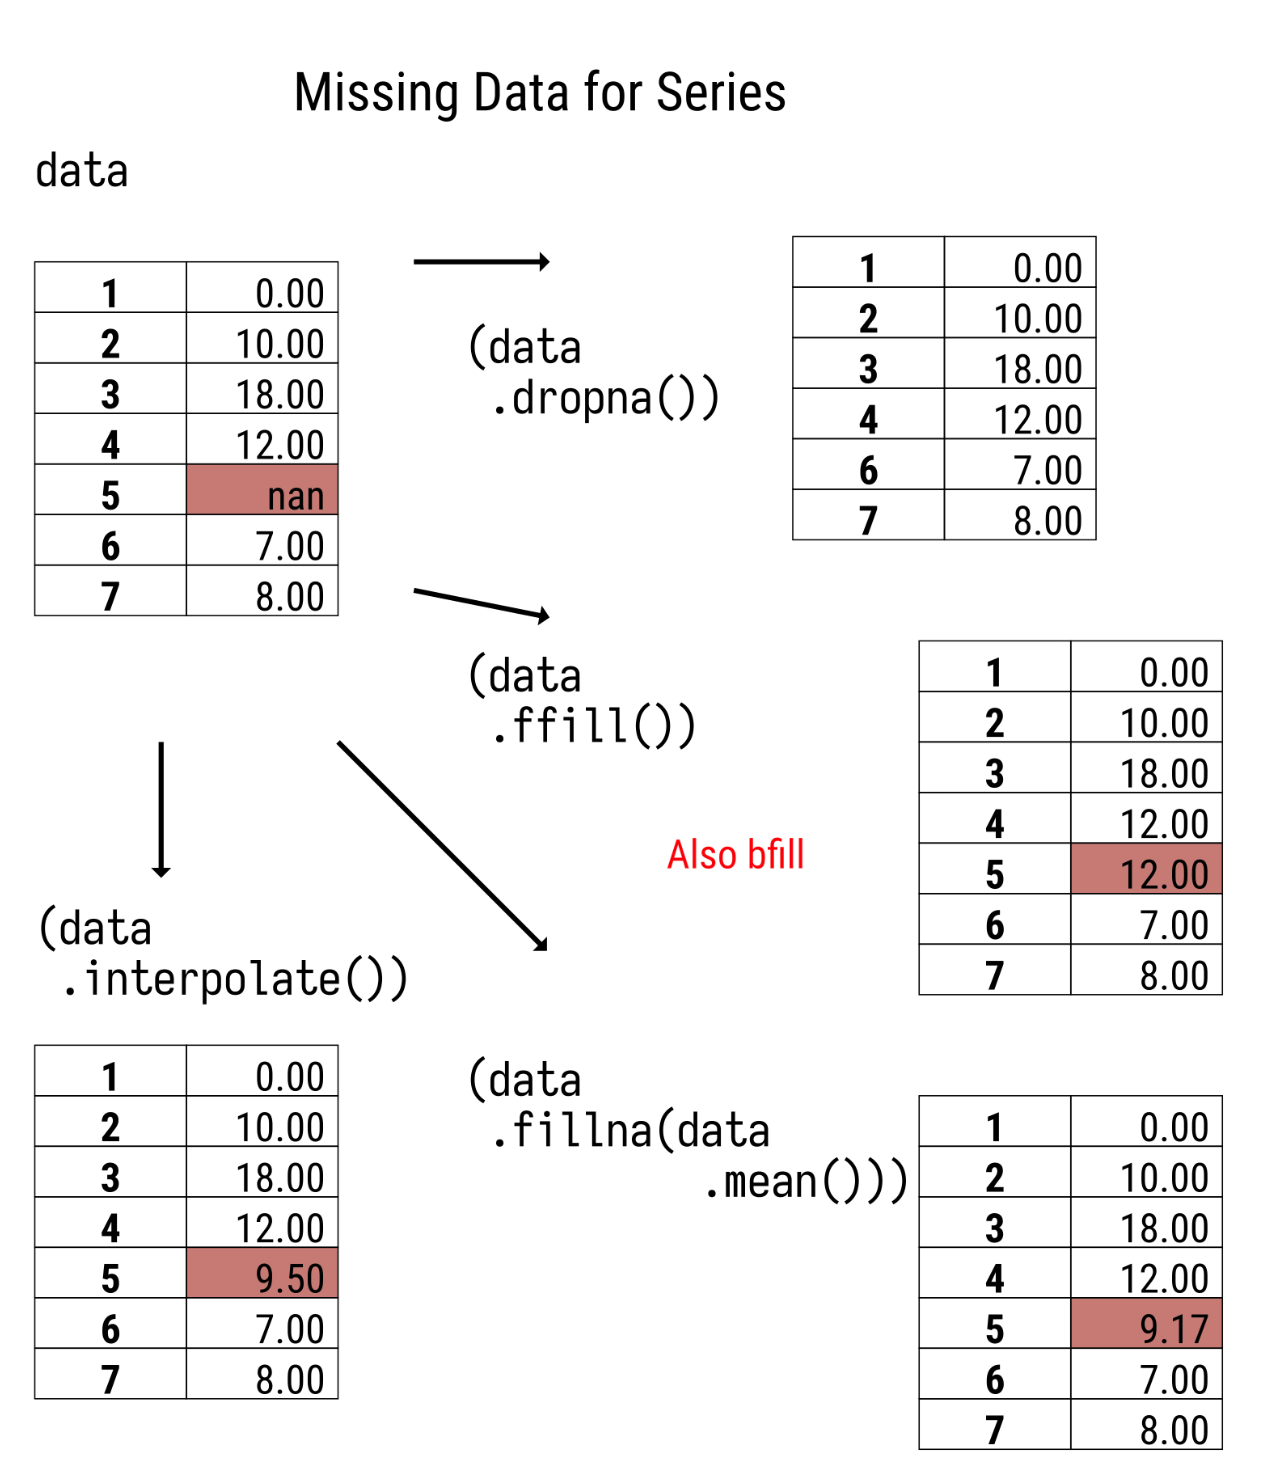</img>

In [87]:
cyl.fillna(0)[cyl.isna()]

7138     0
7139     0
8143     0
8144     0
8146     0
        ..
34563    0
34564    0
34565    0
34566    0
34567    0
Name: cylinders, Length: 206, dtype: object

In [92]:
cyl.fillna(cyl.mode()[0])[cyl.isna()]

7138     4
7139     4
8143     4
8144     4
8146     4
        ..
34563    4
34564    4
34565    4
34566    4
34567    4
Name: cylinders, Length: 206, dtype: object

## 9.5 Interpolating Data

In [95]:
temp = pd.Series([32, 40, None, 42, 39, 32])

In [96]:
temp

0    32.0
1    40.0
2     NaN
3    42.0
4    39.0
5    32.0
dtype: float64

In [97]:
temp.interpolate()

0    32.0
1    40.0
2    41.0
3    42.0
4    39.0
5    32.0
dtype: float64

## 9.6 Clipping Data

- If you have outliers in your data, you might want to use the .clip method.
- In the example below, the first 447 entries in city range from 9 to 31

In [101]:
city_mpg.loc[:446] # index từ đầu tới index 446, nếu dùng iloc thì sẽ khác

0      19
1       9
2      23
3      10
4      17
       ..
442    15
443    15
444    15
445    15
446    31
Name: city08, Length: 447, dtype: int64

- We can trim the values to be between the 5th (11.0) and 95th quantile (27.0)
- Nếu nhỏ hơn 5th thì gán 11, nếu lớn hơn 95th thì gán 27

In [108]:
(city_mpg
 .loc[:446]
 .clip(
     lower=city_mpg.quantile(.05),
     upper=city_mpg.quantile(.85),
 )
)

0      19
1      11
2      22
3      11
4      17
       ..
442    15
443    15
444    15
445    15
446    22
Name: city08, Length: 447, dtype: int64

## 9.7 Sorting Values

In [3]:
city_mpg.sort_values()

7901       6
34557      6
37161      6
21060      6
35887      6
        ... 
34563    138
34564    140
32599    150
31256    150
33423    150
Name: city08, Length: 41144, dtype: int64

In [4]:
city_mpg.sort_values(ascending=False)

32599    150
31256    150
33423    150
34564    140
34563    138
        ... 
21060      6
35887      6
37161      6
7901       6
34557      6
Name: city08, Length: 41144, dtype: int64

## 9.8 Sorting the Index

In [8]:
city_mpg.sort_values()

7901       6
34557      6
37161      6
21060      6
35887      6
        ... 
34563    138
34564    140
32599    150
31256    150
33423    150
Name: city08, Length: 41144, dtype: int64

In [6]:
city_mpg.sort_values().sort_index()

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

## 9.9 Dropping Duplicates

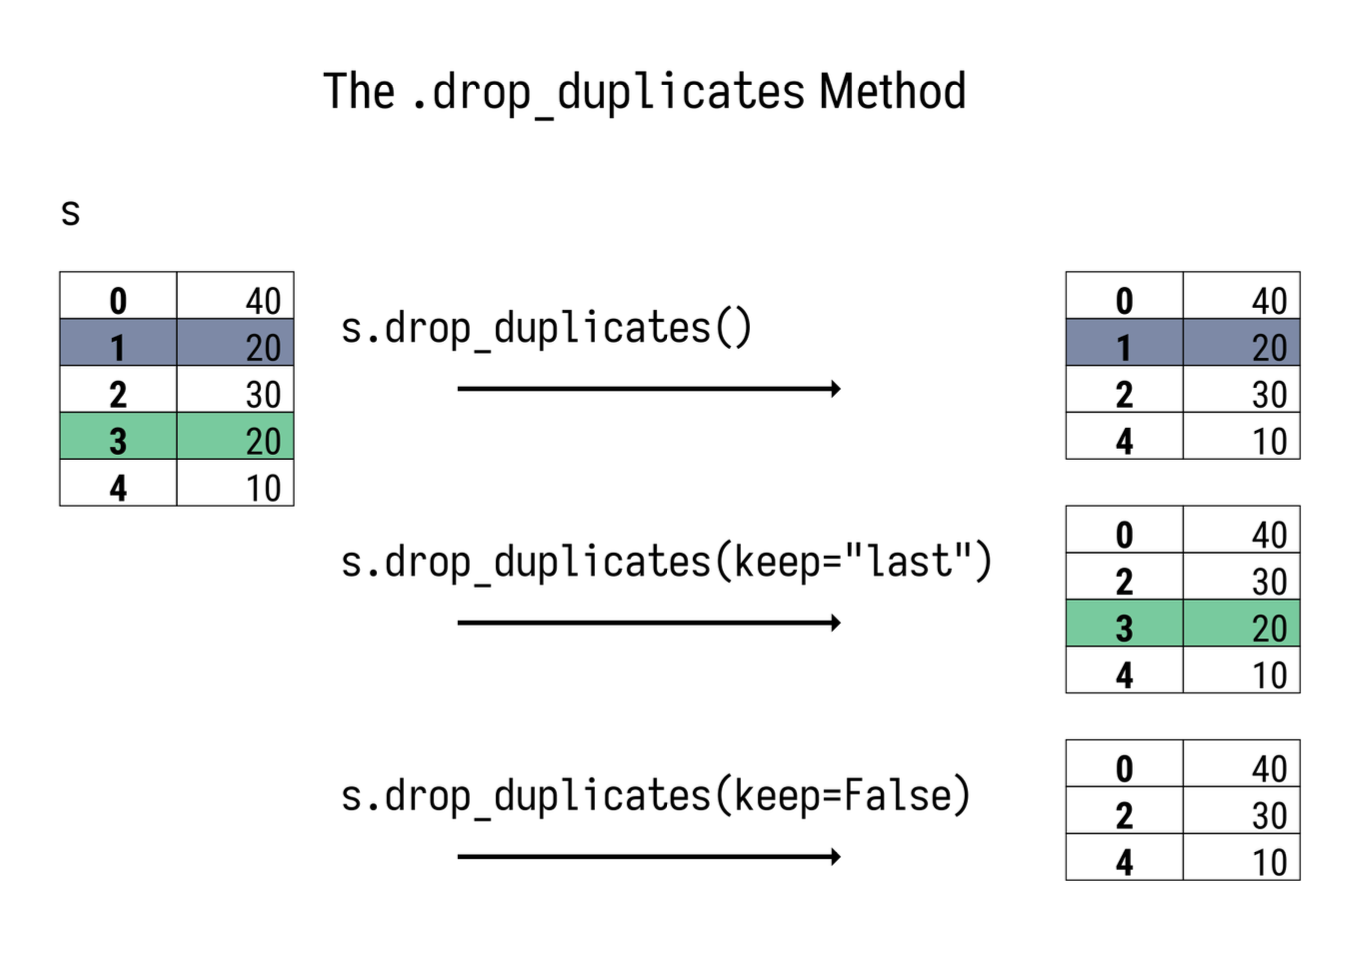</img>

In [10]:
s = pd.Series([40, 20, 30, 20, 10])
s

0    40
1    20
2    30
3    20
4    10
dtype: int64

In [11]:
s.drop_duplicates()

0    40
1    20
2    30
4    10
dtype: int64

In [12]:
s.drop_duplicates(keep='last')

0    40
2    30
3    20
4    10
dtype: int64

In [13]:
s.drop_duplicates(keep=False)

0    40
2    30
4    10
dtype: int64

## 9.10 Ranking Data

The `.rank` method will return a series that keeps the original index but uses the ranks of values from the original series.

If two values are the same, their rank will be the average of the positions they take.

You can specify `'min'` to put equal values in the same rank, and `'dense'` to not skip any positions

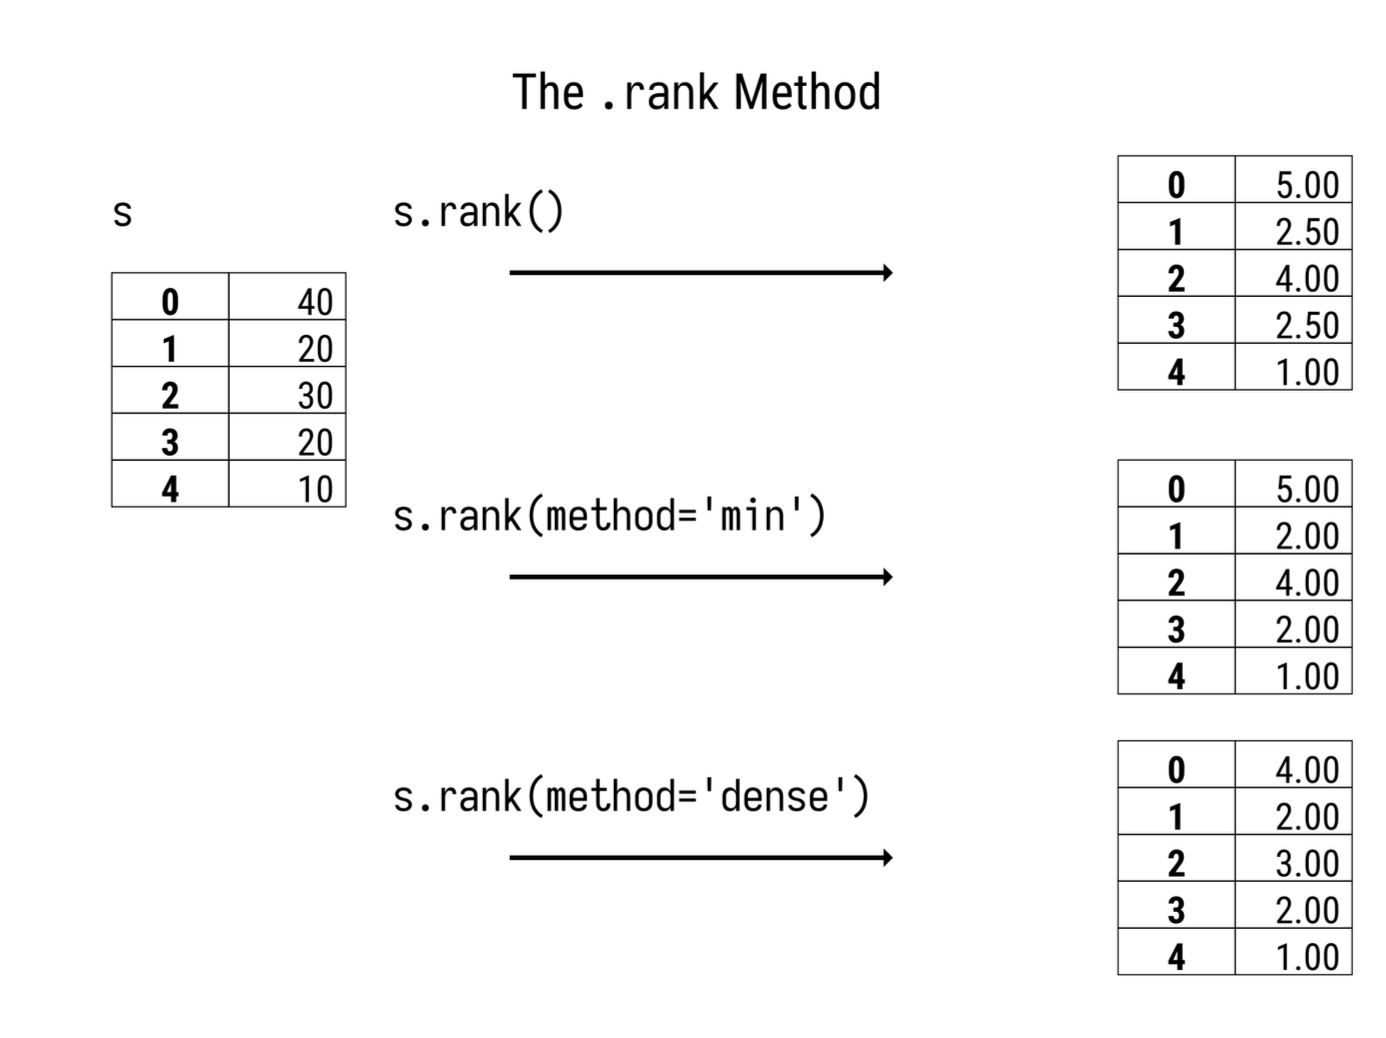</img>

In [14]:
city_mpg.rank()

0        27060.5
1          235.5
2        35830.0
3          607.5
4        19484.0
          ...   
41139    27060.5
41140    29719.5
41141    23528.0
41142    23528.0
41143    15479.0
Name: city08, Length: 41144, dtype: float64

In [17]:
city_mpg.rank(method='min') # equal values in the same rank

0        25555.0
1          136.0
2        35119.0
3          336.0
4        17467.0
          ...   
41139    25555.0
41140    28567.0
41141    21502.0
41142    21502.0
41143    13492.0
Name: city08, Length: 41144, dtype: float64

In [18]:
city_mpg.rank(method='dense')

0        14.0
1         4.0
2        18.0
3         5.0
4        12.0
         ... 
41139    14.0
41140    15.0
41141    13.0
41142    13.0
41143    11.0
Name: city08, Length: 41144, dtype: float64

## 9.11 Replacing Data

In [19]:
make = df.make

In [21]:
make.replace('Subaru', 'スバル')

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4               スバル
            ...    
41139           スバル
41140           スバル
41141           スバル
41142           スバル
41143           スバル
Name: make, Length: 41144, dtype: object

In [22]:
make.replace(r'(Fer)ra(r.*)', r'\2-other-\1', regex=True)

0          Alfa Romeo
1        ri-other-Fer
2               Dodge
3               Dodge
4              Subaru
             ...     
41139          Subaru
41140          Subaru
41141          Subaru
41142          Subaru
41143          Subaru
Name: make, Length: 41144, dtype: object

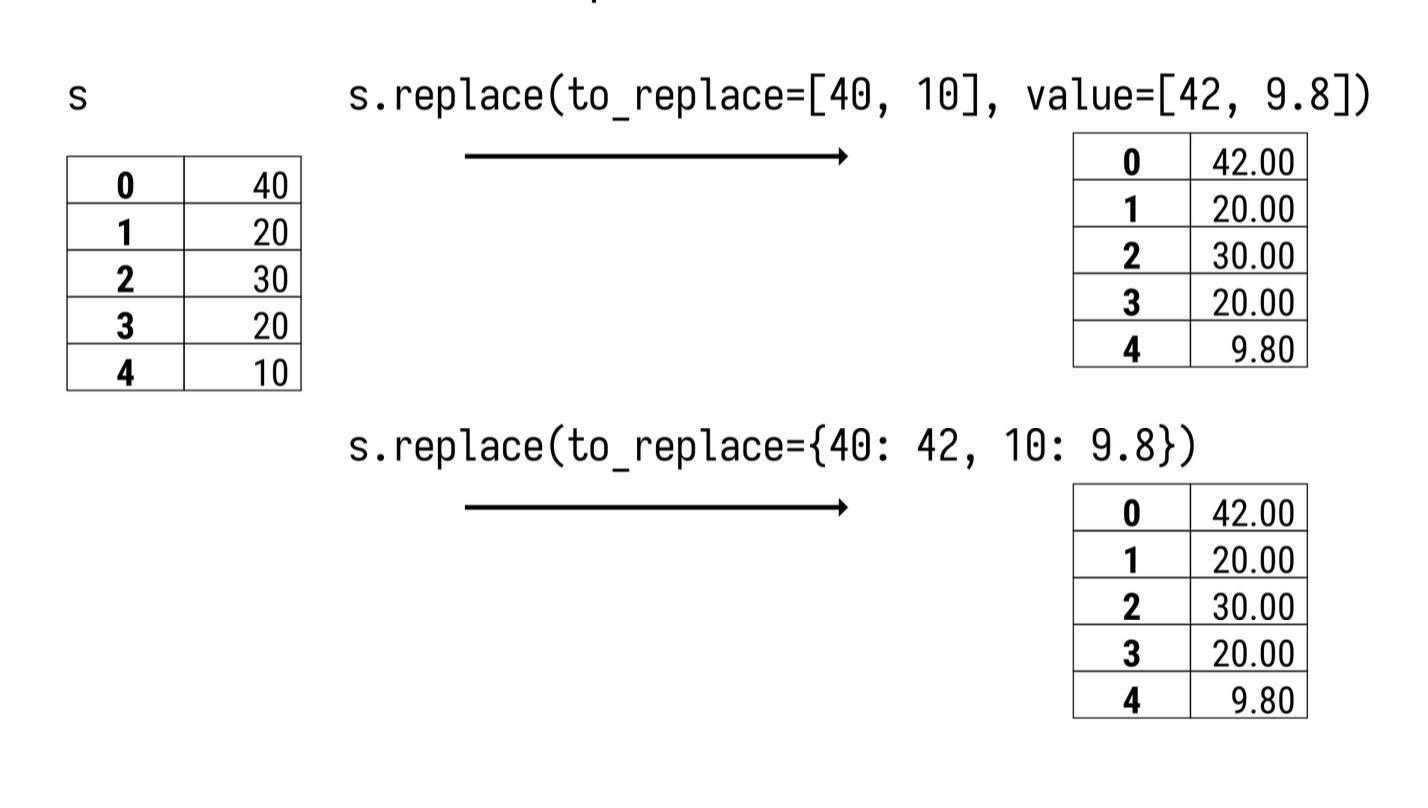</img>

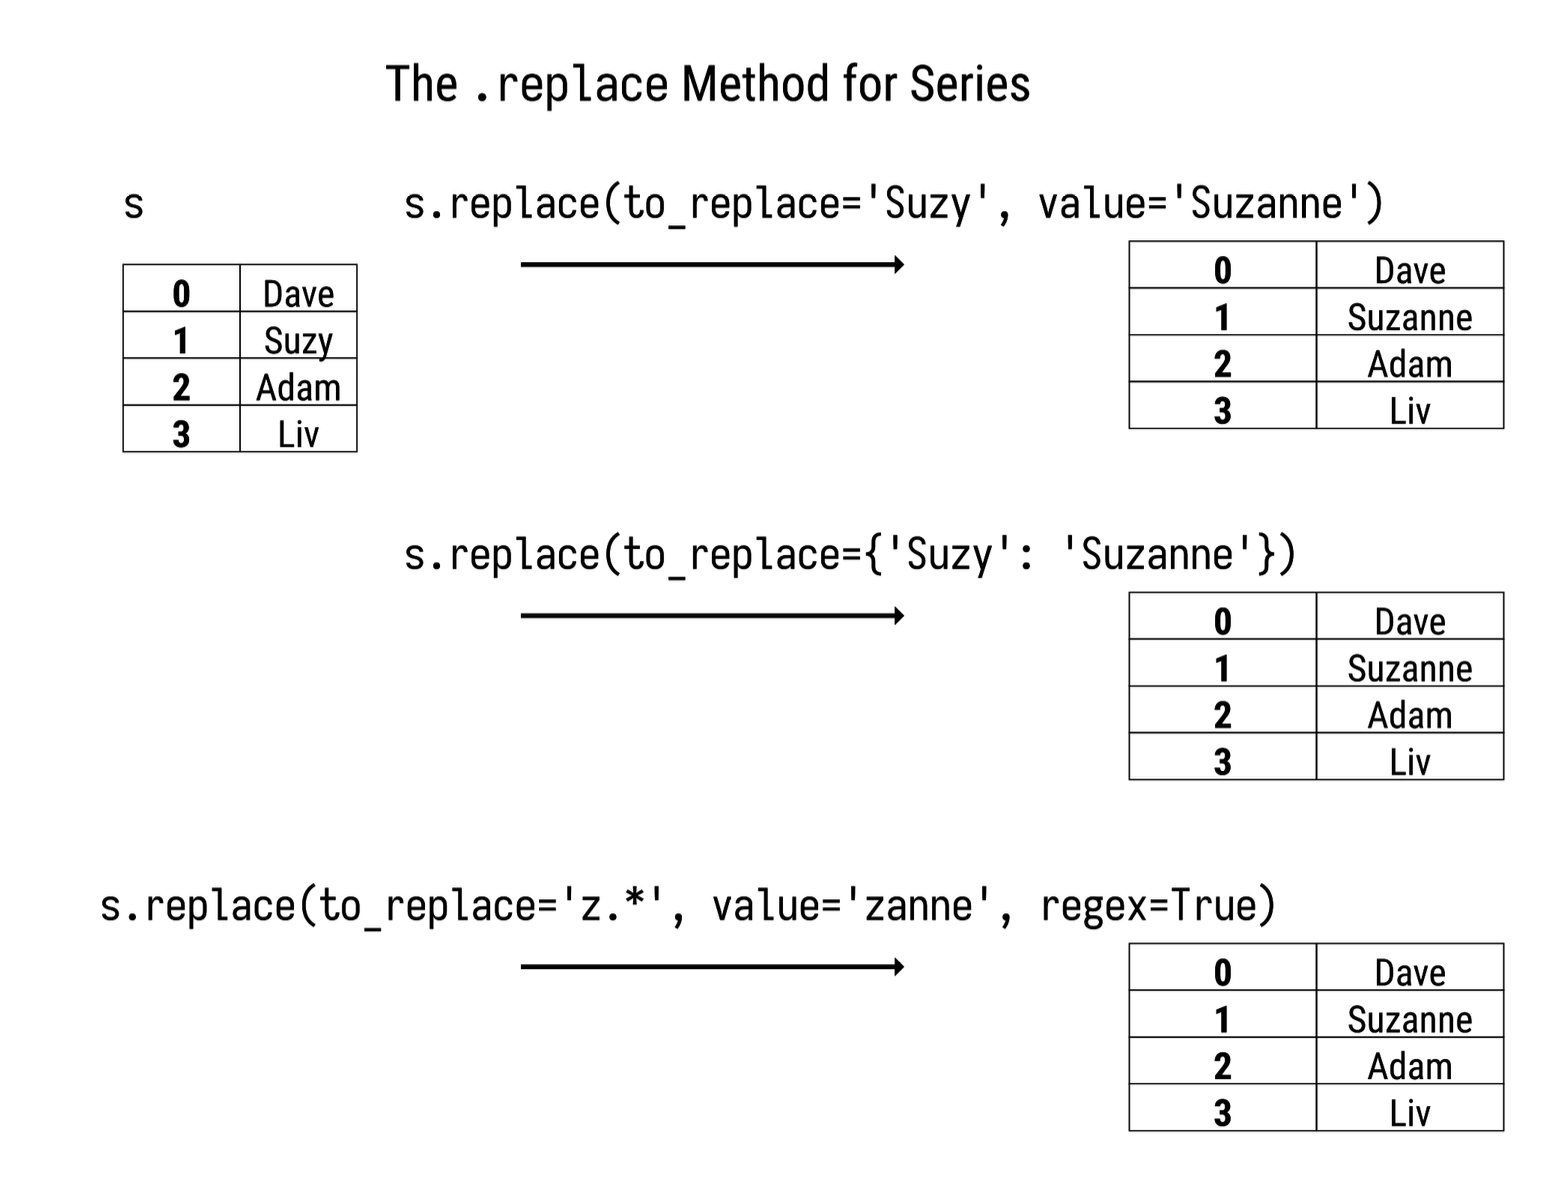</img>

## 9.12 Binning Data

Using the `cut` function, you can create bins of equal width

In [25]:
pd.cut(city_mpg, 10)

0        (5.856, 20.4]
1        (5.856, 20.4]
2         (20.4, 34.8]
3        (5.856, 20.4]
4        (5.856, 20.4]
             ...      
41139    (5.856, 20.4]
41140    (5.856, 20.4]
41141    (5.856, 20.4]
41142    (5.856, 20.4]
41143    (5.856, 20.4]
Name: city08, Length: 41144, dtype: category
Categories (10, interval[float64, right]): [(5.856, 20.4] < (20.4, 34.8] < (34.8, 49.2] < (49.2, 63.6] ... (92.4, 106.8] < (106.8, 121.2] < (121.2, 135.6] < (135.6, 150.0]]

In [28]:
city_mpg \
    .pipe(pd.cut, bins=[0, 10, 20, 40, 70, 150])

0        (10, 20]
1         (0, 10]
2        (20, 40]
3         (0, 10]
4        (10, 20]
           ...   
41139    (10, 20]
41140    (10, 20]
41141    (10, 20]
41142    (10, 20]
41143    (10, 20]
Name: city08, Length: 41144, dtype: category
Categories (5, interval[int64, right]): [(0, 10] < (10, 20] < (20, 40] < (40, 70] < (70, 150]]

<br>

`qcut` Bins that had approximately the same number of entries in each bin

In [33]:
city_mpg \
    .pipe(pd.qcut, 4) # quartile

0         (17.0, 20.0]
1        (5.999, 15.0]
2        (20.0, 150.0]
3        (5.999, 15.0]
4         (15.0, 17.0]
             ...      
41139     (17.0, 20.0]
41140     (17.0, 20.0]
41141     (17.0, 20.0]
41142     (17.0, 20.0]
41143     (15.0, 17.0]
Name: city08, Length: 41144, dtype: category
Categories (4, interval[float64, right]): [(5.999, 15.0] < (15.0, 17.0] < (17.0, 20.0] < (20.0, 150.0]]

In [34]:
city_mpg.median()

17.0


Set labels to categories

In [37]:
city_mpg \
    .pipe(pd.qcut, q=4, labels=['<=25%', '25%-50%', '50%-75%', '>75%'])

0        50%-75%
1          <=25%
2           >75%
3          <=25%
4        25%-50%
          ...   
41139    50%-75%
41140    50%-75%
41141    50%-75%
41142    50%-75%
41143    25%-50%
Name: city08, Length: 41144, dtype: category
Categories (4, object): ['<=25%' < '25%-50%' < '50%-75%' < '>75%']

## 9.13 Summary

- `s.apply`
    - Pass in a NumPy function that works on the series, or a Python function that works on a single value. args and kwds are arguments for func. Returns a series, or dataframe if func returns a series.
- `s.where`
    - Pass in a boolean series/dataframe, list, or callable as cond. If the value is True, keep it, otherwise use other value. If it is a function, it takes a series and should return a boolean sequence.
- `np.select`
    - Pass in a list of boolean arrays for condlist. If the value is true use the corresponding value from choicelist. If multiple conditions are True, only use the first. Returns a NumPy array.
- `s.fillna`
    - Pass in a scalar, dict, series, or dataframe for value. If it is a scalar, use that value, otherwise use the index from the old value to the new value.
- `s.interpolate`
    - Perform interpolation with missing values. method may be linear, time among others.
- `s.clip`
    - Return a new series with values clipped to lower and upper.
- `s.sort_values`
    - Return a series with values sorted. The kind option may be 'quicksort', 'mergesort' (stable), or 'heapsort'. na_position indicates location of NaNs and may be 'first' or 'last'.
- `s.sort_index`
    - Return a series with index sorted. The kind option may be 'quicksort', 'mergesort' (stable), or 'heapsort'. na_position indicates location of NaNs and may be 'first' or 'last'.
- `s.drop_duplicates`
    - Drop duplicates. keep may be 'first', 'last', or False. (If False, it removes all values that were duplicated).
- `s.rank`
    - Return a series with numerical ranks. method allows you to specify tie handling. 'average', 'min', 'max', 'first' (uses order they appear in series), 'dense' (like 'min', but rank only increases by one after tie). na_option allows you to specify NaN handling. 'keep' (stay at NaN), 'top' (move to smallest), 'bottom' (move to largest).
- `s.replace`
    - Return a series with new values. to_replace can be many things. If it is a string, number, or regular expression, you can replace it with a scalar value. It can also be a list of those things which requires values to be a list of the same size. Finally, it can be a dictionary mapping old values to new values.
- `pd.cut`
    - Bin values from x (a series). If bins is an integer, use equal-width bins. If bins is a list of numbers (defining minimum and maximum positions) use those for the edges. right defines whether the right edge is open or closed. labels allows you to specify the bin names. Out of bounds values will be missing.
- `pd.qcut`
    - Bin values from x (a series) into q equal sized bins (10 for quantiles, 4). Alternatively, can pass in a list of quantile edges. Out of bounds values will be missing.

## 9.14 Exercises

With a dataset of your choice:

1. Create a series from a numeric column that has the value of 'high' if it is equal to or above
the mean and 'low' if it is below the mean using `.apply`.

In [3]:
import pandas as pd
s = pd.Series([1, 2, 3, 4, 5, 6, 7])
s

0    1
1    2
2    3
3    4
4    5
5    6
6    7
dtype: int64

In [10]:
def check_high(val):
    if val >= s.mean():
        return 'High'
    else:
        return 'Low'
s.apply(check_high)

0     Low
1     Low
2     Low
3    High
4    High
5    High
6    High
dtype: object

2.  Create a series from a numeric column that has the value of 'high' if it is equal to or above
the mean and 'low' if it is below the mean using `np.select`.

In [9]:
import numpy as np
np.select( 
    [s >= s.mean()],
    ['High'],
    "Low"
)

array(['Low', 'Low', 'Low', 'High', 'High', 'High', 'High'], dtype='<U4')

3. Time the differences between the previous two solutions to see which is faster.

In [12]:
%%timeit
def check_high(val):
    if val >= s.mean():
        return 'High'
    else:
        return 'Low'
s.apply(check_high)

126 µs ± 593 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [13]:
%%timeit
import numpy as np
np.select( 
    [s >= s.mean()],
    ['High'],
    "Low"
)

45.6 µs ± 94.2 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


4. Replace the missing values of a numeric series with the median value.

In [15]:
s1 = pd.Series([1, 2, 3, None])
s1.fillna(s1.median(skipna=True))

0    1.0
1    2.0
2    3.0
3    2.0
dtype: float64

5. Clip the values of a numeric series to between to 10th and 90th percentiles.

In [17]:
s1 = pd.Series(range(20))

In [21]:
s1.quantile(.1)

1.9000000000000001

In [22]:
s1.quantile(.9)

17.1

In [20]:
s1.clip(lower=s1.quantile(.1), upper=s1.quantile(.9))

0      1.9
1      1.9
2      2.0
3      3.0
4      4.0
5      5.0
6      6.0
7      7.0
8      8.0
9      9.0
10    10.0
11    11.0
12    12.0
13    13.0
14    14.0
15    15.0
16    16.0
17    17.0
18    17.1
19    17.1
dtype: float64

6. Using a categorical column, replace any value that is not in the top 5 most frequent values with 'Other'.

In [24]:
make = df.make

In [28]:
top5 = make.value_counts().index[:5]

In [35]:
make.where(make.isin(top5), other="Other").value_counts()

make
Other        26622
Chevrolet     4003
Ford          3371
Dodge         2583
GMC           2494
Toyota        2071
Name: count, dtype: int64

7. Using a categorical column, replace any value that is not in the top 10 most frequent values with 'Other'.

In [32]:
top10 = make.value_counts().index[:10]

In [34]:
make.where(make.isin(top10), other="Other").value_counts()

make
Other            19400
Chevrolet         4003
Ford              3371
Dodge             2583
GMC               2494
Toyota            2071
BMW               1966
Mercedes-Benz     1538
Nissan            1471
Volkswagen        1180
Mitsubishi        1067
Name: count, dtype: int64

8. Make a function that takes a categorical series and a number (n) and returns a replace series that replaces any value that is not in the top n most frequent values with 'Other'.

In [38]:
def top_n_counts(n, s: pd.Series):
    top_index = s.value_counts().index[:n]
    return make.where(make.isin(top_index), other="Other").value_counts()
top_n_counts(7, make)

make
Other            23118
Chevrolet         4003
Ford              3371
Dodge             2583
GMC               2494
Toyota            2071
BMW               1966
Mercedes-Benz     1538
Name: count, dtype: int64

9. Using a numeric column, bin it into 10 groups that have the same width.

In [40]:
pd.cut(city_mpg, 10).value_counts()

city08
(5.856, 20.4]     30872
(20.4, 34.8]       9667
(34.8, 49.2]        367
(121.2, 135.6]       55
(49.2, 63.6]         54
(78.0, 92.4]         48
(92.4, 106.8]        32
(106.8, 121.2]       26
(135.6, 150.0]       12
(63.6, 78.0]         11
Name: count, dtype: int64

10. Using a numeric column, bin it into 10 groups that have equal sized bins.

In [41]:
pd.qcut(city_mpg, 10).value_counts()

city08
(5.999, 13.0]    6019
(18.0, 20.0]     5318
(14.0, 15.0]     4503
(17.0, 18.0]     4053
(21.0, 24.0]     4036
(16.0, 17.0]     4035
(15.0, 16.0]     3975
(24.0, 150.0]    3704
(13.0, 14.0]     2969
(20.0, 21.0]     2532
Name: count, dtype: int64

# Chapter 10: Indexing Operations

## 10.1 Prepping the Data and Renaming the Index

In [7]:
# thêm tên, sử dụng dict
city2 = city_mpg.rename(df.make)

In [8]:
city2.index

Index(['Alfa Romeo', 'Ferrari', 'Dodge', 'Dodge', 'Subaru', 'Subaru', 'Subaru',
       'Toyota', 'Toyota', 'Toyota',
       ...
       'Saab', 'Saturn', 'Saturn', 'Saturn', 'Saturn', 'Subaru', 'Subaru',
       'Subaru', 'Subaru', 'Subaru'],
      dtype='object', length=41144)

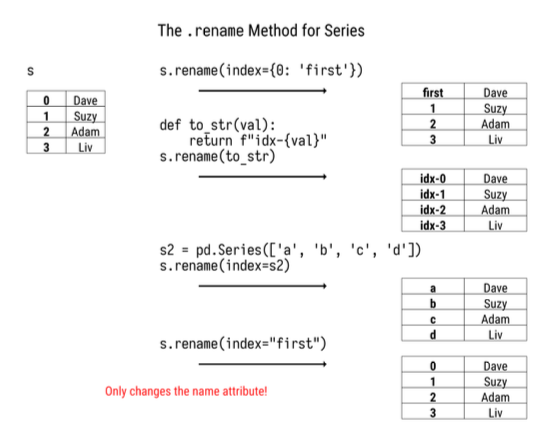

The `.rename` method will return a new series with the original values but new index labels.

If you pass in a scalar value it will change the `.name` attribute of the series on the new series it returns, leaving the index intact.

In [64]:
city2.rename('citympg')

Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
              ..
Subaru        19
Subaru        20
Subaru        18
Subaru        18
Subaru        16
Name: citympg, Length: 41144, dtype: int64

## 10.2 Resetting the Index

Muốn xoá đi index và chuyển về dạng monotonic increasing

In [68]:
city2.reset_index()

index  city08
0      Alfa Romeo      19
1         Ferrari       9
2           Dodge      23
3           Dodge      10
4          Subaru      17
...           ...     ...
41139      Subaru      19
41140      Subaru      20
41141      Subaru      18
41142      Subaru      18
41143      Subaru      16

[41144 rows x 2 columns]

In [69]:
city2.reset_index(drop=True)

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

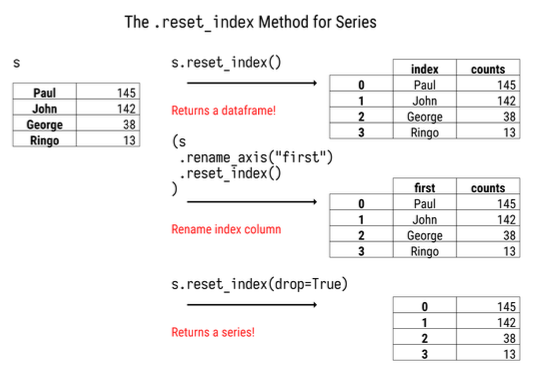

## 10.3 The `.loc` Attribute

The `.loc` attribute deals with index labels. It allows you to pull out pieces of the series. You can pass in the following into an index operation on .loc:

- A scalar value of one of the index labels
- A list of index labels.
- A slice of labels (closed interval so it includes the stop value).
- An index.
- A boolean array (same index labels as the series, but with True or False values.
- A function that accepts a series and returns one of the above.

**Lưu ý (If you pass in a scalar with the label of an index)**
- If there are duplicate labels in the index, it will return a series
- But if there is only one value for that label

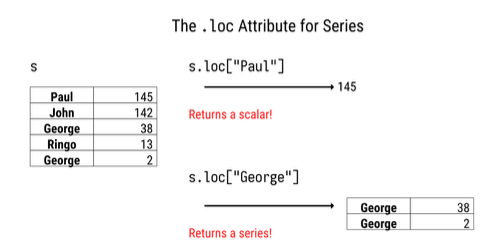

In [9]:
city2.loc['Subaru']

Subaru    17
Subaru    21
Subaru    22
Subaru    19
Subaru    20
          ..
Subaru    19
Subaru    20
Subaru    18
Subaru    18
Subaru    16
Name: city08, Length: 885, dtype: int64

In [75]:
city2.loc['Fisker']

20

Khi truyền vào 1 list, nó sẽ trả về cả Series thay vì chỉ 1 giá trị

In [76]:
city2.loc[['Fisker']]

Fisker    20
Name: city08, dtype: int64

In [78]:
city2.loc[['Ferrari', 'Lamborghini']]

Ferrari         9
Ferrari        12
Ferrari        11
Ferrari        10
Ferrari        11
               ..
Lamborghini     6
Lamborghini     8
Lamborghini     8
Lamborghini     8
Lamborghini     8
Name: city08, Length: 357, dtype: int64

In [81]:
city2.sort_index().loc['Ferrari':'Lamborghini']

Ferrari        10
Ferrari        13
Ferrari        13
Ferrari         9
Ferrari        10
               ..
Lamborghini    12
Lamborghini     9
Lamborghini     8
Lamborghini    13
Lamborghini     8
Name: city08, Length: 11210, dtype: int64

- Note that when slicing with `.loc`, it follows the closed interval
- The closed interval includes both the start index and the final index
- This behavior differs from the half-open interval found in Python’s slicing behavior for strings and lists (which includes the start index, going up to but not including the final index)
- We will see that the `.iloc` attribute supports slicing with the half-open interval as well.

- There is another trick up the label slicing sleeve
- If you have a sorted index, you can slice with strings that are not actual labels.
- For example, if I wanted all the labels in city2 that start with F and go up to those index labels that also start with G H I, and including precisely 'J'

In [82]:
city2.sort_index().loc['F':'J']

Federal Coach    15
Federal Coach    13
Federal Coach    13
Federal Coach    14
Federal Coach    13
                 ..
Isuzu            15
Isuzu            15
Isuzu            15
Isuzu            27
Isuzu            18
Name: city08, Length: 9040, dtype: int64

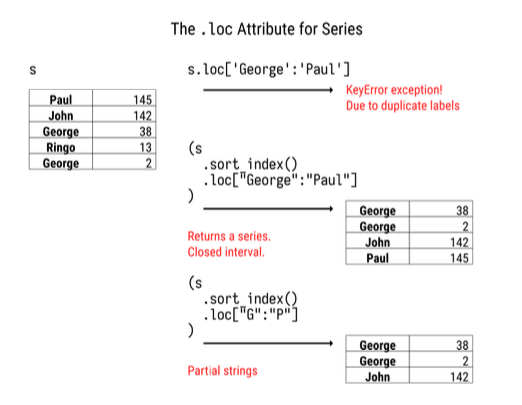

In [83]:
s = pd.Series([145, 142, 38, 13, 2], 
              index=['Paul', 'John', 'George', 'Ringo', 'George'])
s

Paul      145
John      142
George     38
Ringo      13
George      2
dtype: int64

In [91]:
s.sort_index().loc['George':'Paul']

George     38
George      2
John      142
Paul      145
dtype: int64

In [90]:
s.sort_index().loc['G':'P'] # lấy theo kí tự đầu tiên, bỏ đi 'P'

George     38
George      2
John      142
dtype: int64

You can also pass in a boolean array to .loc. Remember that a boolean array is a series with the same index labels as the series (or dataframe) that you are manipulating that has boolean values. If you do an indexing operation off of .loc with a boolean array it will return only the values where the boolean array was true.

In the example below, we will filter out values where the city mileage is above 50. First, I will create a boolean array and store it in a variable called mask:

In [94]:
city2.loc[city2 > 50]

Nissan     81
Toyota     81
Toyota     81
Ford       74
Nissan     84
         ... 
Tesla     140
Tesla     115
Tesla     104
Tesla      98
Toyota     55
Name: city08, Length: 236, dtype: int64

Finally, you can use a function with the .loc attribute. This will come in handy when chaining operations. After multiple operations, the intermediate object you are operating on might have a completely different index than the original object. By using a function, you will have access to the intermediate series and be able to create a row filter based on it. For series objects, this might seem like overkill, but it comes in very handy with dataframes.

Here is an example. I have a series with old pricing information from last year. I know that there was a 10% increase in cost during that time. If I want to find all of the new prices that are above $3 after inflation, we can chain these operations together:

In [96]:
cost = pd.Series([1.00, 2.25, 3.99, .99, 2.79], 
                 index=['Gum', 'Cookie', 'Melon', 'Roll', 'Carrots'])
cost \
    .mul(1.10) \
    .loc[lambda ser: ser > 3]

Melon      4.389
Carrots    3.069
dtype: float64

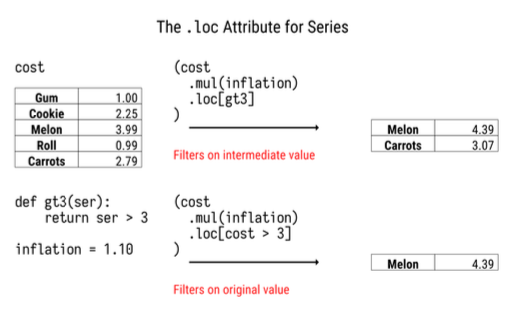

## 10.4 The `.iloc` Attribute

Khác `.loc` là dùng index để lấy không phải dùng label
Bao gồm:
- A scalar index position (an integer)
- A list of index positions
- A slice of positions (half-open interval so it does not include stop value)
- A NumPy array (or Python list) of boolean values.
- A function that accepts a series and returns one of the above.

In [17]:
print(city2.iloc[0]) # lấy ptu đầu tiên

19


In [18]:
print(city2.iloc[[0]]) # lấy ptu đầu tiên dạng series

Alfa Romeo    19
Name: city08, dtype: int64


In [20]:
print(city2.iloc[[1, -2]]) # lấy ptu thứ 2 và kế cuối

Ferrari     9
Subaru     18
Name: city08, dtype: int64


In [21]:
city2.iloc[0:5] # lấy ptu từ index 0 tới index 4 (không bao gồm 5)

Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
Name: city08, dtype: int64

In [23]:
city2.iloc[-8:] # lấy 8 phần tử cuối cùng

Saturn    21
Saturn    24
Saturn    21
Subaru    19
Subaru    20
Subaru    18
Subaru    18
Subaru    16
Name: city08, dtype: int64

In [28]:
# sử dụng boolean series thì gặp lỗi
try:
    city2.iloc[city2 > 50]
except ValueError as err:
    print(err)

iLocation based boolean indexing cannot use an indexable as a mask


In [30]:
# sử dụng boolean numpy array
city2.iloc[(city2 > 50).to_numpy()]

Nissan     81
Toyota     81
Toyota     81
Ford       74
Nissan     84
         ... 
Tesla     140
Tesla     115
Tesla     104
Tesla      98
Toyota     55
Name: city08, Length: 236, dtype: int64

In [31]:
# sử dụng python list
city2.iloc[list(city2 > 50)]

Nissan     81
Toyota     81
Toyota     81
Ford       74
Nissan     84
         ... 
Tesla     140
Tesla     115
Tesla     104
Tesla      98
Toyota     55
Name: city08, Length: 236, dtype: int64

## 10.5 Heads and Tails

In [32]:
city2.head(3)

Alfa Romeo    19
Ferrari        9
Dodge         23
Name: city08, dtype: int64

In [33]:
city2.tail(3)

Subaru    18
Subaru    18
Subaru    16
Name: city08, dtype: int64

## 10.6 Sampling

In [39]:
city2.sample(6, random_state=2)

Mitsubishi    19
Nissan        12
Ford          12
BMW           22
BMW           18
Isuzu         16
Name: city08, dtype: int64

## 10.7 Filtering Index Values

Dùng để lọc phần tử theo index
- items với exact match
- like và regex để tìm theo yếu tố

In [46]:
# items không tìm được khi gặp duplicated index
try:
    city2.filter(items=['Ferrari'])
except ValueError as err:
    print(err)

cannot reindex on an axis with duplicate labels


In [47]:
city2.filter(regex='(Ford)|(Subaru)')

Subaru    17
Subaru    21
Subaru    22
Ford      18
Ford      16
          ..
Subaru    19
Subaru    20
Subaru    18
Subaru    18
Subaru    16
Name: city08, Length: 4256, dtype: int64

## 10.8 Reindexing

`.reindex()`: Giúp lấy value từ index label

Không chạy được với dublicated index labels

In [50]:
try:
    city2.reindex(['Missing', 'Ford'])
except ValueError as err:
    print(err)

cannot reindex on an axis with duplicate labels


In [52]:
city_mpg.reindex([0, 0, 10, 20, 2_000_000])

0          19.0
0          19.0
10         23.0
20         14.0
2000000     NaN
Name: city08, dtype: float64

Lấy được giá trị ra, nếu index không có $\to$ thì trả về `NaN`

In [63]:
try:
    city_mpg.loc[[0, 0, 10, 20, 2_000_000]]
except KeyError as err:
    print(err)

'[2000000] not in index'


Nếu dùng `.loc()` hoặc `.iloc()` thì gặp lỗi

## 10.9 Summary

`s.rename(index=None, *, level=None, errors='ignore')`

Return a series with updated .name attribute if index is a scalar. If index is a function series, or dictionary, return a series with updated index mapped from input (functions work on index name, series and dictionaries map the index name to a new value).

`s.index`

Returns the index of the series.

`s.reset_index(level=None, drop=False, name=None, inplace=False)`

Return a dataframe (or series when drop=True) with a new integer index.

`
s.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, ignore_index=False, key=None)
`

Return a series with the index sorted. The kind option may be `'quicksort'`, `'mergesort'` (stable), or `'heapsort'`. na_position indicates the location of NaNs and may be `'first'` or `'last'`.

`s.loc[idx]`

Slice series by names. idx can be a scalar (pull out value at that name), list of names, slice with names (including end position), a boolean array, an index, or a function (that accepts the series and returns one of the previous items).

`s.iloc[idx]`

Slice series by index position. idx can be a scalar (pull out value at that index), list of indices, slice with index positions (half-open including start but not end index), a list of booleans, or a function (that accepts the series and returns one of the previous items).

`s.head(n=5)`

Return a series with the first n values.

`s.tail(n=5)`

Return a series with the last n values.

`s.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)`

Return a series with n random entries. Can also specify a fraction with frac (if frac > 1 specify `replace=True`).

`s.filter(items=None, like=None, regex=None, axis=None)`

Return a series with index values from items list, matching like substring, or when regex (regular expression) search matches.

`s.reindex(index=None, method=None, copy=True, level=None, limit=None, tolerance=None)`

Return a series with a conformed index.

## 10.10 Exercises

With a dataset of your choice:

1. Inspect the index.

In [65]:
city2.loc['Alfa Romeo']

Alfa Romeo    19
Alfa Romeo    19
Alfa Romeo    14
Alfa Romeo    15
Alfa Romeo    14
              ..
Alfa Romeo    19
Alfa Romeo    19
Alfa Romeo    16
Alfa Romeo    16
Alfa Romeo    15
Name: city08, Length: 62, dtype: int64

2. Sort the index.

In [66]:
city2.sort_index()

AM General    13
AM General    18
AM General    13
AM General    16
AM General    13
              ..
smart         33
smart         31
smart         31
smart         33
smart         34
Name: city08, Length: 41144, dtype: int64

3. Set the index to monotonically increasing integers starting from 0.

In [67]:
city2.reset_index(drop=True)

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

4. Set the index to monotonically increasing integers starting from 0, then convert these to the string version. Save this a s2.

In [69]:
s2 = city2.reset_index(drop=True).rename(lambda x: str(x))

In [72]:
s2.loc['1']

9

5. Using s2, pull out the first 5 entries.

In [73]:
s2.head()

0    19
1     9
2    23
3    10
4    17
Name: city08, dtype: int64

6. Using s2, pull out the last 5 entries.

In [74]:
s2.tail()

41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, dtype: int64

7. Using s2, pull out one hundred entries starting at index position 10.

In [75]:
s2.iloc[10:110]

10     23
11     18
12     21
13     18
14     12
       ..
105    16
106    16
107    18
108    18
109    15
Name: city08, Length: 100, dtype: int64

8. Using s2, create a series with values with index entries '20', '10', and '2'.

In [76]:
s2.reindex(['20', '10', '2'])

20    14
10    23
2     23
Name: city08, dtype: int64

# Chapter 11: String Manipulation

## 11.1 Strings and Objects

In [80]:
make = df.make

In [81]:
make

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object

Chuyển dạng object thành string

In [85]:
make.astype('string')

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: string

`string` type của Pandas 1.0

Hỗ trợ missing value không phải NaN

## 11.2 Categorical Strings

In [89]:
make.astype('category')

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: category
Categories (136, object): ['AM General', 'ASC Incorporated', 'Acura', 'Alfa Romeo', ..., 'Volvo', 'Wallace Environmental', 'Yugo', 'smart']

**Tiết kiệm bộ nhớ, tối ưu performance**

## 11.3 The `.str` Accessor

In [95]:
make.str.lower()

0        alfa romeo
1           ferrari
2             dodge
3             dodge
4            subaru
            ...    
41139        subaru
41140        subaru
41141        subaru
41142        subaru
41143        subaru
Name: make, Length: 41144, dtype: object

In [96]:
make.str.find('e')

0        8
1        1
2        4
3        4
4       -1
        ..
41139   -1
41140   -1
41141   -1
41142   -1
41143   -1
Name: make, Length: 41144, dtype: int64

In [97]:
make.str.startswith('f')

0        False
1        False
2        False
3        False
4        False
         ...  
41139    False
41140    False
41141    False
41142    False
41143    False
Name: make, Length: 41144, dtype: bool

## 11.4 Searching

**Lọc dữ liệu sử dụng regex**

Kết quả trả về là dataframe 1 cột

In [100]:
make.str.extract(r'([^a-z A-Z])')

0
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
...    ...
41139  NaN
41140  NaN
41141  NaN
41142  NaN
41143  NaN

[41144 rows x 1 columns]

Dùng `expand=False` để chuyển thành dạng Series

In [104]:
(make
 .str
 .extract(r'([^a-z A-Z])', expand=False)
 .value_counts()
)

make
-    1727
.      46
,       9
Name: count, dtype: int64

## 11.5 Splitting

In [105]:
age = pd.Series(['0-10', '11-15', '11-15', '61-65', '46-50'])
age

0     0-10
1    11-15
2    11-15
3    61-65
4    46-50
dtype: object

In [108]:
age.str.split('-', expand=True) # expand=True return dataframe

0   1
0   0  10
1  11  15
2  11  15
3  61  65
4  46  50

In [113]:
age.str.split('-') # expand=False list series

0     [0, 10]
1    [11, 15]
2    [11, 15]
3    [61, 65]
4    [46, 50]
dtype: object

Dùng `.iloc[]` và `expand=True` để lấy cột đầu tiên ra

In [117]:
(age
 .str.split('-', expand=True)
 .iloc[:, 0]
 .astype(int)
)

0     0
1    11
2    11
3    61
4    46
Name: 0, dtype: int64

In [127]:
# tương tự, lấy 2 kí tự cuối cùng
(age
 .str.slice(-2)
 .astype(int)
)

0    10
1    15
2    15
3    65
4    50
dtype: int64

In [128]:
# tương tự, lấy 2 kí tự cuối cùng
(age
 .str[-2:]
 .astype(int)
)

0    10
1    15
2    15
3    65
4    50
dtype: int64

In [135]:
(age
 .str.split('-', expand=True)
 .astype(int)
 .mean(axis=1) # axis='columns'
)

0     5.0
1    13.0
2    13.0
3    63.0
4    48.0
dtype: float64

In [136]:
(age
 .str.split('-', expand=True)
 .astype(int)
 .mean(axis='columns')
)

0     5.0
1    13.0
2    13.0
3    63.0
4    48.0
dtype: float64

<br>

**Get random number between range**

In [137]:
age

0     0-10
1    11-15
2    11-15
3    61-65
4    46-50
dtype: object

In [152]:
import random
def between(row: pd.Series):
    return random.randint(*row.to_list())

In [156]:
(age
 .str.split('-', expand=True)
 .astype(int)
 .apply(between, axis=1)
)

0     8
1    13
2    13
3    62
4    49
dtype: int64

## 11.7 Replacing Text

In [165]:
make.str.replace('A', 'Á')

0        Álfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object

Nếu chỉ dùng `.replace` thôi thì nó chỉ đổi string chỉ có chữ A nên kết quả ra không đúng như mong muốn

In [166]:
make.replace('A', 'Á')

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object

In [167]:
make.replace({'Audi': 'Åudi', 'Acura': 'Åcura',
              'Ashton Martin': 'Åshton Martin',
              'Alfa Romeo': 'Ålfa Romeo'})

0        Ålfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object

In [168]:
make.replace('A', 'Á', regex=True)

0        Álfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object

Như bên trên thì chạy được vì lúc này `regex=True` nên nó chỉ tìm 1 phần string

## 11.8 Summary

`.str.capitalize()`
- Capitalize strings

`.str.casefold()`
- Lowercase Unicode/caseless strings.

`.str.cat(others=None, sep='', na_rep=None, join='inner')`
- If others is None, return a string with values separated by sep. Otherwise, align the index (if others series) and concatenate values.

`.str.center(width, fillchar=' ')`
- Center align strings

`.str.contains(pat, case=True, flags=0, na=np.nan, regex=True)`
- Return a boolean array if pat matches values.

`.str.count(pat, flags=0)`
- Return series with the count of how many times pat occurs in each value.

`.str.decode(encoding)`
- Works with bytestrings to decode them to Unicode strings.

`.str.encode(encoding)`
- Encode Unicode string to bytestring.

`.str.endswith(pat, na=np.nan)`
- Return boolean array if value ends with pat.

`.str.extract(pat, flags=0, expand=True)`
- Return a dataframe with the first match from each regular expression capture group in its own column (use named groups for column names). Returns a series if expand=False.

`.str.extractall(pat, flags=0)`
- Return a dataframe with all matches from each regular expression capture group in its own column (use named groups for column names). The dataframe has a multiindex, where the inner index is named match and has match number.

`.str.find(sub, start=None, end=None)`
- Return the lowest index of sub. -1 if not found.

`.str.findall(pat, flags=0)`
- Return a series with a list of matches for each value.

`.str.get(i)`
- Return a series with the result of val[i] for each value (val) in the series.

`.str.get_dummies(sep='|')`
- Return a dataframe with each value in its own
column and a 0/1 indicating if the value is absent/appeared for that index label. If a string has multiple values they can be separated with sep.

In [228]:
s3 = pd.Series(['Apple|Banana|Cherry', 'Banana|Orange', 'Apple|Cherry|Orange'])
s3.str.get_dummies(sep='|')

Apple  Banana  Cherry  Orange
0      1       1       1       0
1      0       1       0       1
2      1       0       1       1

`.str.index(sub, start=None, end=None)`
- Return the lowest index of sub. ValueError if not found.

`.str.isalnum()`
- Return boolean array if characters are alphanumeric.

`.str.isalpha()`
- Return boolean array if characters are alphabetic.

`.str.isdecimal()`
- Return boolean array if characters are decimal.

`.str.isdigit()`
- Return boolean array if characters are digits.

`.str.islower()`
- Return boolean array if characters are lowercase.

`.str.isnumeric()`
- Return boolean array if characters are numeric.

`.str.isspace()`
- Return boolean array if characters are whitespace.

`.str.istitle()`
- Return boolean array if characters are titlecase.

`.str.isupper()`
- Return boolean array if characters are uppercase.

`.str.join(sep)`
- Given a series with a list of strings in it, join each element with sep.

In [230]:
s1.str.join('-')

0          J-o-h-n
1          J-a-n-e
2    M-i-c-h-a-e-l
dtype: object

`.str.len()`
- Return a series with length of each value (works with lists or collections).

In [231]:
s1.str.len()

0    4
1    4
2    7
dtype: int64

`.str.ljust(width, fillchar=' ')`
- Return a left justified series.

In [235]:
s1.str.ljust(20, fillchar='-')

0    John----------------
1    Jane----------------
2    Michael-------------
dtype: object

`.str.lower()`
- Return a lowercase series.

`.str.lstrip(to_strip=None)`
- Return a series with left stripped to_strip (whitespace default).

`.str.match(pat, case=True, flags=0, na=np.nan)`
- Return a boolean array if pat matches values (anchored at the beginning). Use .str.contains to match anywhere in the string. (Use .str.extract to pull out the string.)

`.str.normalize(form)`
- Return Unicode normal form for series. form can be 'NFC', 'NFKC', 'NFD', or 'NFKD'.

`.str.pad(width, side='left', fill=' ')`
- Return a padded series of length width. side can be 'left', 'right', or 'both'.

`.str.partition(sep, expand=True)`
- Return a dataframe with three columns: element before first sep, the sep, and the part after.

`.str.repeat(repeats)`
- Return a series with values repeated repeats times. repeats can be a scalar or list.

`.str.replace(pat, repl, n=-1, case=True, flags=0, regex=True)`
- Return a series where pat is replaced by repl. n is the number of times to replace a value. repl can be a string or a callable that takes a match object and returns a string.

`.str.rfind(sub, start=None, end=None)`
- Return highest index of sub. -1 if not found.

`.str.rindex(sub, start=None, end=None)`
- Return highest index of sub. ValueError if not found.

`.str.rjust(width, fill=' ')`
- Return a right justified series.

`.str.rpartition(sep, expand=True)`
- Return a dataframe with three columns: element before last sep, the sep, and the part after.

`.str.rsplit(pat, n=-1, expand=False)`
- Return a Series (if expand=False) with a list of values split from the right side limited to n splits.

`.str.rstrip(to_strip=None)`
- Return a series with rightstripped to_strip (whitespace default).

`.str.slice(start=None, stop=None, step=None)`
- Return a series. Equivalent to s[start:stop:step].

`.str.slice_replace(start=None, stop=None, repl=None)`
- Return a series with slice replaced by the value of repl.

`.str.split(pat, n=-1, expand=False)`
- Return a Series (if expand=False) with a list of values split by sep limited to n splits.

`.str.startswith(pat, na=np.nan)`
- Return boolean array if value starts with pat.

`.str.strip(to_strip=None)`
- Return a series with left and right stripped to_strip
(whitespace default).

`.str.swapcase()`
- Return swapcase series.

`.str.title()`
- Return titlecase series.

`.str.translate(table)`
- Return series using a dictionary table to replace
characters. table maps code points to new code points (numbers not strings). Keys mapped to None are deleted.

`.str.upper()`
- Return uppercase series.

`.str.wrap(width)`
- Return a line wrapped series limited to width.

`.str.zfill(width)`
- Return a series limited to width left padded with '0'.

## 11.9 Exercises

1. Using a string column, lowercase the values.

In [236]:
s1.str.lower()

0       john
1       jane
2    michael
dtype: object

2. Using a string column, slice out the first character.

In [238]:
s1.str.slice(0, 1)

0    J
1    J
2    M
dtype: object

3. Using a string column, slice out the last three characters.

In [239]:
s1.str.slice(-3)

0    ohn
1    ane
2    ael
dtype: object

4. Using a string column, create a series extracting the numeric values.
   

In [249]:
s3 = pd.Series(['test123', 'abc122', 'a123'])
s3.str.extract('(\d+)', expand=False)

0    123
1    122
2    123
dtype: object

5. Using a string column, create a series extracting the non-ASCII values.

In [257]:
s4 = pd.Series(['∆√åqwe', '123∫˜åß123'])
s4.str.extract('([^\x00-\x7F]+)')

0
0   ∆√å
1  ∫˜åß


6. Using a string column, create a dataframe with the dummy columns for every character in the column.

In [261]:
s1.str.get_dummies('')

J  M  a  c  e  h  i  l  n  o
0  1  0  0  0  0  1  0  0  1  1
1  1  0  1  0  1  0  0  0  1  0
2  0  1  1  1  1  1  1  1  0  0

# Chapter 12: Date and Time Manipulation

## 12.2 Loading UTC Time Data

**Đọc UTC Time và đổi múi giờ**

In [263]:
col = pd.Series(['2015-03-08 08:00:00+00:00',
                 '2015-03-08 08:30:00+00:00',
                 '2015-03-08 09:00:00+00:00',
                 '2015-11-01 06:30:00+00:00',
                 '2015-11-01 07:00:00+00:00',
                 '2015-11-01 07:30:00+00:00',
                 '2015-11-01 08:00:00+00:00',
                 '2015-11-01 08:30:00+00:00',
                 '2015-11-01 08:00:00+00:00',
                 '2015-11-01 08:30:00+00:00',
                 '2015-11-01 09:00:00+00:00',
                 '2015-11-01 09:30:00+00:00',
                 '2015-11-01 10:00:00+00:00'])

In [267]:
utc_s = pd.to_datetime(col, utc=True)

In [300]:
utc_s.dt.tz_convert('America/Denver')

0    2015-03-08 01:00:00-07:00
1    2015-03-08 01:30:00-07:00
2    2015-03-08 03:00:00-06:00
3    2015-11-01 00:30:00-06:00
4    2015-11-01 01:00:00-06:00
5    2015-11-01 01:30:00-06:00
6    2015-11-01 01:00:00-07:00
7    2015-11-01 01:30:00-07:00
8    2015-11-01 01:00:00-07:00
9    2015-11-01 01:30:00-07:00
10   2015-11-01 02:00:00-07:00
11   2015-11-01 02:30:00-07:00
12   2015-11-01 03:00:00-07:00
dtype: datetime64[ns, America/Denver]

In [269]:
pd.to_datetime(col, utc=True).dt.tz_convert('America/Denver')

0    2015-03-08 01:00:00-07:00
1    2015-03-08 01:30:00-07:00
2    2015-03-08 03:00:00-06:00
3    2015-11-01 00:30:00-06:00
4    2015-11-01 01:00:00-06:00
5    2015-11-01 01:30:00-06:00
6    2015-11-01 01:00:00-07:00
7    2015-11-01 01:30:00-07:00
8    2015-11-01 01:00:00-07:00
9    2015-11-01 01:30:00-07:00
10   2015-11-01 02:00:00-07:00
11   2015-11-01 02:30:00-07:00
12   2015-11-01 03:00:00-07:00
dtype: datetime64[ns, America/Denver]

## 12.3 Loading Local Time Data

In [270]:
time = pd.Series(['2015-03-08 01:00:00',
                  '2015-03-08 01:30:00',
                  '2015-03-08 02:00:00',
                  '2015-03-08 02:30:00',
                  '2015-03-08 03:00:00',
                  '2015-03-08 02:00:00',
                  '2015-03-08 02:30:00',
                  '2015-03-08 03:00:00',
                  '2015-03-08 03:30:00',
                  '2015-11-01 00:30:00',
                  '2015-11-01 01:00:00',
                  '2015-11-01 01:30:00',
                  '2015-11-01 02:00:00',
                  '2015-11-01 02:30:00',
                  '2015-11-01 01:00:00',
                  '2015-11-01 01:30:00',
                  '2015-11-01 02:00:00',
                  '2015-11-01 02:30:00',
                  '2015-11-01 03:00:00'])

In [282]:
offset = pd.Series([-7, -7, -7, -7, -7, -6, -6,
                    -6, -6, -6, -6, -6, -6, -6, -7, -7, -7, -7, -7])

In [285]:
offset = offset.replace({-7:'-07:00', -6:'-06:00'})
local = (pd
 .to_datetime(time)
 .groupby(offset)
 .transform(lambda s: s.dt.tz_localize(s.name)
                       .dt.tz_convert('America/Denver'))   
)

In [286]:
local

0    2015-03-08 01:00:00-07:00
1    2015-03-08 01:30:00-07:00
2    2015-03-08 03:00:00-06:00
3    2015-03-08 03:30:00-06:00
4    2015-03-08 04:00:00-06:00
5    2015-03-08 01:00:00-07:00
6    2015-03-08 01:30:00-07:00
7    2015-03-08 03:00:00-06:00
8    2015-03-08 03:30:00-06:00
9    2015-11-01 00:30:00-06:00
10   2015-11-01 01:00:00-06:00
11   2015-11-01 01:30:00-06:00
12   2015-11-01 01:00:00-07:00
13   2015-11-01 01:30:00-07:00
14   2015-11-01 01:00:00-07:00
15   2015-11-01 01:30:00-07:00
16   2015-11-01 02:00:00-07:00
17   2015-11-01 02:30:00-07:00
18   2015-11-01 03:00:00-07:00
dtype: datetime64[ns, America/Denver]

## 12.4 Converting Local time to UTC

In [287]:
local.dt.tz_convert('UTC')

0    2015-03-08 08:00:00+00:00
1    2015-03-08 08:30:00+00:00
2    2015-03-08 09:00:00+00:00
3    2015-03-08 09:30:00+00:00
4    2015-03-08 10:00:00+00:00
5    2015-03-08 08:00:00+00:00
6    2015-03-08 08:30:00+00:00
7    2015-03-08 09:00:00+00:00
8    2015-03-08 09:30:00+00:00
9    2015-11-01 06:30:00+00:00
10   2015-11-01 07:00:00+00:00
11   2015-11-01 07:30:00+00:00
12   2015-11-01 08:00:00+00:00
13   2015-11-01 08:30:00+00:00
14   2015-11-01 08:00:00+00:00
15   2015-11-01 08:30:00+00:00
16   2015-11-01 09:00:00+00:00
17   2015-11-01 09:30:00+00:00
18   2015-11-01 10:00:00+00:00
dtype: datetime64[ns, UTC]

## 12.5 Converting to Epochs

**Convert time to Epochs**

In [307]:
secs = local.view(int).floordiv(1e9).astype(int)

<br>

**Convert time to Epochs**

In [302]:
pd.to_datetime(secs, unit='s', utc=True)

0    2015-03-08 08:00:00+00:00
1    2015-03-08 08:30:00+00:00
2    2015-03-08 09:00:00+00:00
3    2015-03-08 09:30:00+00:00
4    2015-03-08 10:00:00+00:00
5    2015-03-08 08:00:00+00:00
6    2015-03-08 08:30:00+00:00
7    2015-03-08 09:00:00+00:00
8    2015-03-08 09:30:00+00:00
9    2015-11-01 06:30:00+00:00
10   2015-11-01 07:00:00+00:00
11   2015-11-01 07:30:00+00:00
12   2015-11-01 08:00:00+00:00
13   2015-11-01 08:30:00+00:00
14   2015-11-01 08:00:00+00:00
15   2015-11-01 08:30:00+00:00
16   2015-11-01 09:00:00+00:00
17   2015-11-01 09:30:00+00:00
18   2015-11-01 10:00:00+00:00
dtype: datetime64[ns, UTC]

## 12.6 Manipulating Dates

In [312]:
url = 'https://github.com/mattharrison/datasets' \
      '/raw/master/data/alta-noaa-1980-2019.csv'

In [313]:
alta_df = pd.read_csv(url)

In [317]:
dates = pd.to_datetime(alta_df.DATE)

In [319]:
dates.dt.day_name()

0          Tuesday
1        Wednesday
2         Thursday
3           Friday
4         Saturday
           ...    
14155      Tuesday
14156    Wednesday
14157     Thursday
14158       Friday
14159     Saturday
Name: DATE, Length: 14160, dtype: object

In [320]:
dates.dt.day_name('es_ES') # in Spanish

0           Martes
1        Miércoles
2           Jueves
3          Viernes
4           Sábado
           ...    
14155       Martes
14156    Miércoles
14157       Jueves
14158      Viernes
14159       Sábado
Name: DATE, Length: 14160, dtype: object

In [321]:
dates.dt.is_month_end

0        False
1        False
2        False
3        False
4        False
         ...  
14155    False
14156    False
14157    False
14158    False
14159    False
Name: DATE, Length: 14160, dtype: bool

In [323]:
dates.dt.strftime('%d/%m/%Y')

0        01/01/1980
1        02/01/1980
2        03/01/1980
3        04/01/1980
4        05/01/1980
            ...    
14155    03/09/2019
14156    04/09/2019
14157    05/09/2019
14158    06/09/2019
14159    07/09/2019
Name: DATE, Length: 14160, dtype: object

- `%y` Year (decimal)
- `%Y` Year (century)
- `%m` Month (padded)
- `%b` Month (Abbrev locale)
- `%B` Month
- `%d` Day (padded)
- `%a` Weekday (Abbrev locale)
- `%A` Weekday (locale)
- `%H` Hour (24 padded)
- `%I` Hour (12 padded)
- `%M` Minutes (padded)
- `%S` Seconds (padded)
- `%p` AM/PM
- `%-d` Day (unpadded unix*)
- `%e` Day (unpadded unix*)
- `%c` Locale representation
- `%x` Locale date
- `%X` Locale time
- `%W` Week num (Mon 1st)
- `%U` Week num (Sun 1st)
- `%j` Day of year (padded)
- `%z` UTC offset
- `%Z` Time Zone
- `%%` Percent sign

## 12.7 Summary

`.ceil(freq=None,
  ambiguous=None,
  nonexistent=None)`
- Return ceiling according to offset alias in freq. The nonexistent parameter controls DST time issues.

`.date`
- Property with a series of Python datetime.date objects.

In [334]:
time = pd.to_datetime(time)
time.dt.date

0     2015-03-08
1     2015-03-08
2     2015-03-08
3     2015-03-08
4     2015-03-08
5     2015-03-08
6     2015-03-08
7     2015-03-08
8     2015-03-08
9     2015-11-01
10    2015-11-01
11    2015-11-01
12    2015-11-01
13    2015-11-01
14    2015-11-01
15    2015-11-01
16    2015-11-01
17    2015-11-01
18    2015-11-01
dtype: object

`.day`
- Property with a series of day of month.

In [335]:
time.dt.day

0     8
1     8
2     8
3     8
4     8
5     8
6     8
7     8
8     8
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
dtype: int32

`.day_name(locale='en_us')`
- Return the string day of week.

In [338]:
time.dt.day_name(locale='en_us')

0     Sunday
1     Sunday
2     Sunday
3     Sunday
4     Sunday
5     Sunday
6     Sunday
7     Sunday
8     Sunday
9     Sunday
10    Sunday
11    Sunday
12    Sunday
13    Sunday
14    Sunday
15    Sunday
16    Sunday
17    Sunday
18    Sunday
dtype: object

`.dayofweek`
- Property with a series of date of week as number (0 is Monday).

In [339]:
time.dt.dayofweek

0     6
1     6
2     6
3     6
4     6
5     6
6     6
7     6
8     6
9     6
10    6
11    6
12    6
13    6
14    6
15    6
16    6
17    6
18    6
dtype: int32

`.dayofyear`
- Property with a series of day of the year.

In [340]:
time.dt.dayofyear

0      67
1      67
2      67
3      67
4      67
5      67
6      67
7      67
8      67
9     305
10    305
11    305
12    305
13    305
14    305
15    305
16    305
17    305
18    305
dtype: int32

`.days_in_month`
- Property with a series of number of days in month.

In [341]:
time.dt.days_in_month

0     31
1     31
2     31
3     31
4     31
5     31
6     31
7     31
8     31
9     30
10    30
11    30
12    30
13    30
14    30
15    30
16    30
17    30
18    30
dtype: int32

`.daysinmonth`
- Property with a series of number of days in month.

In [342]:
time.dt.daysinmonth

0     31
1     31
2     31
3     31
4     31
5     31
6     31
7     31
8     31
9     30
10    30
11    30
12    30
13    30
14    30
15    30
16    30
17    30
18    30
dtype: int32

`.floor(freq=None, ambiguous=None, nonexistent=None)`
- Return floor according to offset alias in freq. The nonexistent parameter controls DST time issues.

`.hour`
- Property with a series of hour of date.

In [345]:
time.dt.hour

0     1
1     1
2     2
3     2
4     3
5     2
6     2
7     3
8     3
9     0
10    1
11    1
12    2
13    2
14    1
15    1
16    2
17    2
18    3
dtype: int32

`.is_leap_year`
- Property with a series of booleans if date is leap year.

In [347]:
time.dt.is_leap_year

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
dtype: bool

`.is_month_end`
- Property with a series of booleans if date is end of month.

In [348]:
time.dt.is_month_end

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
dtype: bool

`.is_month_start`
- Property with a series of booleans if date is start of month.

`.is_quarter_end`
- Property with a series of booleans if date is end of quarter.

`.is_quarter_start()`
- Property with a series of booleans if date is start of quarter.

`.is_year_end`
- Property with a series of booleans if date is end of year.

`.is_year_start`
- Property with a series of booleans if date is start of year.

`.microsecond`
- Property with a series of microseconds of date.

`.minute`
- Property with a series of minutes of date.

`.month`
- Property with a series of month of date (numeric).

`.month_name(locale='en_us')`
- Return a series of month of date (string).

`.nanosecond`
- Property with a series of nanoseconds of date.

`.normalize()`
- Return a series of dates converted to midnight.

In [352]:
time.dt.normalize()

0    2015-03-08
1    2015-03-08
2    2015-03-08
3    2015-03-08
4    2015-03-08
5    2015-03-08
6    2015-03-08
7    2015-03-08
8    2015-03-08
9    2015-11-01
10   2015-11-01
11   2015-11-01
12   2015-11-01
13   2015-11-01
14   2015-11-01
15   2015-11-01
16   2015-11-01
17   2015-11-01
18   2015-11-01
dtype: datetime64[ns]

`.quarter`
- Property with series of quarter of date (numeric 1-4).

In [353]:
time.dt.quarter

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     4
10    4
11    4
12    4
13    4
14    4
15    4
16    4
17    4
18    4
dtype: int32

`.round(freq=None, ambiguous=None, nonexistent=None)`
- Return round according to fixed frequency (cannot be end like
'ME') in freq. The nonexistent parameter controls DST time
issues.

`.second`
- Property with a series of seconds of date (numeric).

`.strftime(date_format)`
- Return a series with string dates. Formatted using strftime
format codes.

`.time`
- Property with a series of Python datetime.time objects.

`.timetz`
- Property with a series of Python datetime.time objects with
timezone information.

`.to_period(freq)`
- Return a series with pandas Period objects.

`.to_pydatetime()`
- Return a numpy array with datetime.datetime objects.

`.tz`
- Property with timezone.

`.tz_convert(tz)`
- Convert from one timezone aware series to another.

`.tz_localize(tz, ambiguous=None, nonexistent=None)`
- Convert from naive to timezone aware.

`.week`
- Property with a series of week of date (numeric 1-53).

`.weekday`
- Property with a series of date of week as number 0 is Monday.

`.weekofyear`
- Property with a series of week of date (numeric 1-53).

`.year`
- Property with a series of year of date.

## 12.8 Exercises

1. Convert a column with date information to a date.

2. Convert a date column into UTC dates.

3. Convert a date column into local dates with a timezone.

4. Convert a date column into epoch values.

In [361]:
secs = time.view(int).floordiv(1e9).astype(int)
secs

0     1425776400
1     1425778200
2     1425780000
3     1425781800
4     1425783600
5     1425780000
6     1425781800
7     1425783600
8     1425785400
9     1446337800
10    1446339600
11    1446341400
12    1446343200
13    1446345000
14    1446339600
15    1446341400
16    1446343200
17    1446345000
18    1446346800
dtype: int64

5. Convert an epoch number into UTC.

In [362]:
pd.to_datetime(secs, unit='s')

0    2015-03-08 01:00:00
1    2015-03-08 01:30:00
2    2015-03-08 02:00:00
3    2015-03-08 02:30:00
4    2015-03-08 03:00:00
5    2015-03-08 02:00:00
6    2015-03-08 02:30:00
7    2015-03-08 03:00:00
8    2015-03-08 03:30:00
9    2015-11-01 00:30:00
10   2015-11-01 01:00:00
11   2015-11-01 01:30:00
12   2015-11-01 02:00:00
13   2015-11-01 02:30:00
14   2015-11-01 01:00:00
15   2015-11-01 01:30:00
16   2015-11-01 02:00:00
17   2015-11-01 02:30:00
18   2015-11-01 03:00:00
dtype: datetime64[ns]

# Chapter 13: Dates in the Index

## 13.1 Finding Missing Data

In [368]:
snow = (alta_df
        .SNOW
        .rename(dates)
       )

In [371]:
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

In [372]:
snow[snow.isna()]

1985-07-30   NaN
1985-09-12   NaN
1985-09-19   NaN
1986-02-07   NaN
1986-06-26   NaN
              ..
2017-04-26   NaN
2017-09-20   NaN
2017-10-02   NaN
2017-12-23   NaN
2018-12-03   NaN
Name: SNOW, Length: 365, dtype: float64

In [376]:
snow.loc['1985-09':'1985-09-20'] # '1985-09' là 1985-09-01

1985-09-01    0.0
1985-09-02    0.0
1985-09-03    0.0
1985-09-04    0.0
1985-09-05    0.0
1985-09-06    0.0
1985-09-07    0.0
1985-09-08    0.0
1985-09-09    0.0
1985-09-10    0.0
1985-09-11    0.0
1985-09-12    NaN
1985-09-13    0.0
1985-09-14    0.0
1985-09-15    0.0
1985-09-16    0.0
1985-09-17    0.0
1985-09-18    0.0
1985-09-19    NaN
1985-09-20    0.0
Name: SNOW, dtype: float64

## 13.2 Filling In Missing Data

**Fill with scalar value**

In [381]:
(snow
    .loc['1985-09':'1985-09-20']
    .fillna(0)
)

1985-09-01    0.0
1985-09-02    0.0
1985-09-03    0.0
1985-09-04    0.0
1985-09-05    0.0
1985-09-06    0.0
1985-09-07    0.0
1985-09-08    0.0
1985-09-09    0.0
1985-09-10    0.0
1985-09-11    0.0
1985-09-12    0.0
1985-09-13    0.0
1985-09-14    0.0
1985-09-15    0.0
1985-09-16    0.0
1985-09-17    0.0
1985-09-18    0.0
1985-09-19    0.0
1985-09-20    0.0
Name: SNOW, dtype: float64

<br>

**Forward fill**

In [382]:
snow.loc['1987-12-30':'1988-01-10']

1987-12-30    6.0
1987-12-31    5.0
1988-01-01    NaN
1988-01-02    0.0
1988-01-03    0.0
1988-01-04    NaN
1988-01-05    2.0
1988-01-06    6.0
1988-01-07    4.0
1988-01-08    9.0
1988-01-09    5.0
1988-01-10    2.0
Name: SNOW, dtype: float64

In [383]:
(snow
    .loc['1987-12-30':'1988-01-10']
    .ffill()
)

1987-12-30    6.0
1987-12-31    5.0
1988-01-01    5.0
1988-01-02    0.0
1988-01-03    0.0
1988-01-04    0.0
1988-01-05    2.0
1988-01-06    6.0
1988-01-07    4.0
1988-01-08    9.0
1988-01-09    5.0
1988-01-10    2.0
Name: SNOW, dtype: float64

<br>

**Backward Fill**

In [384]:
(snow
    .loc['1987-12-30':'1988-01-10']
    .bfill()
)

1987-12-30    6.0
1987-12-31    5.0
1988-01-01    0.0
1988-01-02    0.0
1988-01-03    0.0
1988-01-04    2.0
1988-01-05    2.0
1988-01-06    6.0
1988-01-07    4.0
1988-01-08    9.0
1988-01-09    5.0
1988-01-10    2.0
Name: SNOW, dtype: float64

## 13.3 Interpolation

In [386]:
(snow
    .loc['1987-12-30':'1988-01-10']
    .interpolate()
)

1987-12-30    6.0
1987-12-31    5.0
1988-01-01    2.5
1988-01-02    0.0
1988-01-03    0.0
1988-01-04    1.0
1988-01-05    2.0
1988-01-06    6.0
1988-01-07    4.0
1988-01-08    9.0
1988-01-09    5.0
1988-01-10    2.0
Name: SNOW, dtype: float64

<br>

Dùng interpolate với quí 1 và 4, còn các quí còn lại thì gán giá trị 0

In [388]:
winter = (snow.index.quarter == 1) | (snow.index.quarter == 4)

In [390]:
(snow
    .where(~(winter & snow.isna()), snow.interpolate())
    .where(~(~winter & snow.isna()), 0)
    .loc[['1985-09-19','1988-01-01']]
)

1985-09-19    0.0
1988-01-01    2.5
Name: SNOW, dtype: float64

## 13.4 Dropping Missing Values

In [391]:
(snow
    .loc['1987-12-30':'1988-01-10']
    .dropna()
)

1987-12-30    6.0
1987-12-31    5.0
1988-01-02    0.0
1988-01-03    0.0
1988-01-05    2.0
1988-01-06    6.0
1988-01-07    4.0
1988-01-08    9.0
1988-01-09    5.0
1988-01-10    2.0
Name: SNOW, dtype: float64

## 13.5 Shifting Data

Di chuyển chuỗi thời gian lên trên hoặc xuống dưới

In [392]:
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

In [397]:
snow.shift(1) # forward shift

1980-01-01    NaN
1980-01-02    2.0
1980-01-03    3.0
1980-01-04    1.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

In [396]:
snow.shift(-1) # backward shift

1980-01-01    3.0
1980-01-02    1.0
1980-01-03    0.0
1980-01-04    0.0
1980-01-05    1.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    NaN
Name: SNOW, Length: 14160, dtype: float64

## 13.6 Rolling Average

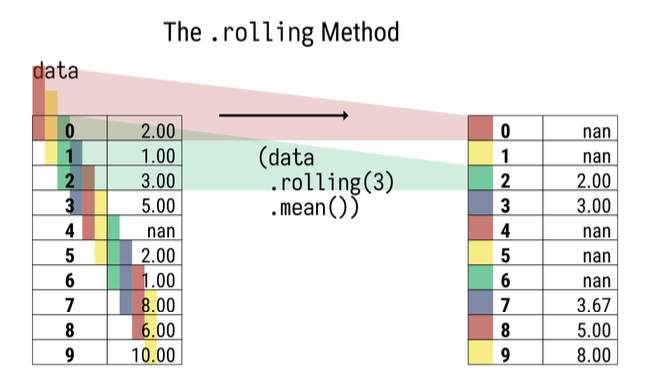

Dùng để tính trung bình trượt

In [409]:
snow.rolling(2).mean()

1980-01-01    NaN
1980-01-02    2.5
1980-01-03    2.0
1980-01-04    0.5
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

Dùng được các method với Rolling như:
- `r.agg`: tương tự summarize
- `r.apply`
- `r.count`: đếm slg non NaN
- `r.cov`: tính covariance
- `r.max`: tính max
- `r.min`
- `r.mean`: tính tb
- `r.median`
- `r.quantile`: mặc định trung vị, trả về Series nếu q là list
- `r.sem`: Returns unbiased standard error of mean.
- `r.std`: sample standard deviation
- `r.var`: Returns unbiased variance
- `r.skew`: Returns unbiased skew.

## 13.7 Resampling

Vì có cột index là Date, làm được rất nhiều

Ví dụ có thể group theo level cao hơn như Tuần, Tháng (M), Quý (Q), Năm (Y)

Resampling giúp làm việc đó

In [414]:
(snow
    .resample('M')
    .sum()
) # tổng cộng của tháng

1980-01-31    144.0
1980-02-29    112.5
1980-03-31    123.0
1980-04-30     30.0
1980-05-31     47.0
              ...  
2019-05-31     26.0
2019-06-30      0.0
2019-07-31      0.0
2019-08-31      0.0
2019-09-30      0.0
Freq: M, Name: SNOW, Length: 477, dtype: float64

In [416]:
(snow
    .resample('M')
    .max()
) # giá trị lớn nhất của tháng

1980-01-31    20.0
1980-02-29    25.0
1980-03-31    16.0
1980-04-30    10.0
1980-05-31     9.0
              ... 
2019-05-31     5.1
2019-06-30     0.0
2019-07-31     0.0
2019-08-31     0.0
2019-09-30     0.0
Freq: M, Name: SNOW, Length: 477, dtype: float64

In [487]:
# Hoặc có thể tổng hợp con số tháng 6 của từng năm
(snow
    .resample('A-JUN') # A = ANNUAL GROUPING, từ tháng 6 đến tháng 7 năm sau
    .max()
)

1980-06-30    25.0
1981-06-30    26.0
1982-06-30    34.0
1983-06-30    38.0
1984-06-30    25.0
1985-06-30    22.0
1986-06-30    34.0
1987-06-30    16.0
1988-06-30    23.0
1989-06-30    30.0
1990-06-30    32.0
1991-06-30    28.0
1992-06-30    22.0
1993-06-30    30.0
1994-06-30    36.0
1995-06-30    25.0
1996-06-30    34.0
1997-06-30    22.0
1998-06-30    29.0
1999-06-30    26.0
2000-06-30    23.0
2001-06-30    19.0
2002-06-30    28.0
2003-06-30    14.0
2004-06-30    24.0
2005-06-30    31.0
2006-06-30    27.0
2007-06-30    15.0
2008-06-30    21.0
2009-06-30    23.0
2010-06-30    32.0
2011-06-30    22.0
2012-06-30    18.0
2013-06-30    19.0
2014-06-30    11.0
2015-06-30    25.0
2016-06-30    15.0
2017-06-30    26.0
2018-06-30    21.8
2019-06-30    20.7
2020-06-30     0.0
Freq: A-JUN, Name: SNOW, dtype: float64

|Offset Alias|Date Offset|Description|
|---|---|---|
|None|DateOffset|Mặc định 1 ngày|
|`'B'`|BDay|Business day (weekday)|
|`'C'`|CDay|Custom Business day|
|`'W'`|Week|Tuần|
|`WOM`|WeekOfMonth|Tuần thứ n trong tháng|
|`'LWOM'`|LastWeekOfMonth|Tuần cuối cùng trong tháng|
|`'M'`|MonthEnd|Cuối cùng của tháng|
|`MS`|MonthBegin|Đầu tiên của tháng|
|`BM`|BMonthEnd|Business month end|
|`BMS`|BMonthBegin|Business month start|
|`CBM`|CBMonthEnd|Custom business month end|
|`CBMS`|CBMonthBegin|Custom business month start|
|`SM`|SemiMonthEnd|Semi-month end (15th and month end)|
|`SMS`|SemiMonthBegin|Semi-month start (15th and month start)|
|`Q`|QuarterEnd|Quarter end (Can specify -JAN to end quarter in January)|
|`QS`|QuarterBegin|Quarter start|
|`BQ`|BQuarterEnd|Business quarter end|
|`BQS`|BQuarterBegin|Business quarter start|
|`REQ`|FY5253Quarter|Retail quarter end (52-53 week)|
|`A`|YearEnd|Calendar year end (Can specify -MAY to end year in May)|
|`'AS' / 'BYS'`|YearBegin|Calendar year start|
|`'BA'`|BYearEnd|Business year end|
|`BAS`|BYearBegin|Business year start|
|`'RE'`|FY5253|Retail year end (52-53 week)|
|`'BH'`|BusinessHour|Business Hour|
|`'CBH'`|CustomBusinessHour|Custom business hour|
|`'D'`|Day|Ngày|
|`'H'`|Hour|Giờ|
|`'T'/'min'`|Minute|Phút|
|`'L' / 'ms'`|Milli|Millisecond|
|`'U' / 'us'`|Micro|Microsecond|
|`'N'`|Nano|Nanosecond|

## 13.8 Gathering Aggregate Values (But Keeping Index)

In [443]:
# Chia trung bình giá trị của 1 quí
(snow
    .div(snow
            .resample('Q')
            .transform('sum'))
    .mul(100)
    .fillna(0)
)

1980-01-01    0.527009
1980-01-02    0.790514
1980-01-03    0.263505
1980-01-04    0.000000
1980-01-05    0.000000
                ...   
2019-09-03    0.000000
2019-09-04    0.000000
2019-09-05    0.000000
2019-09-06    0.000000
2019-09-07    0.000000
Name: SNOW, Length: 14160, dtype: float64

In [444]:
season2017 = snow.loc['2016-10':'2017-05']

In [448]:
# tỷ lệ của từng tháng trong năm
(season2017
    .resample('M')
    .sum()
    .div(season2017.sum())
    .mul(100)
)

2016-10-31     2.153969
2016-11-30     9.772637
2016-12-31    15.715995
2017-01-31    25.468688
2017-02-28    21.041085
2017-03-31     9.274033
2017-04-30    14.738732
2017-05-31     1.834862
Freq: M, Name: SNOW, dtype: float64

Một số method có thể dùng với resample:

- `.agg(func, *args, **kwargs)`
- `.aggregate(func, *args, **kwargs)`
- `.apply(func, *args, **kwargs)`
- `.asfreq(fill_value=None)`: Return values at frequency (like .reindex)
- `.bfill(limit=None)`: Backfill the missing values.
- `.count()`: Đếm non missing value
- `.ffill(limit=None)`: Forward fill the missing values.
- `.fillna(method, limit=None)`: Method ('ffill', 'bfill', or 'nearest')
- `.first()`: Return a series with the first value of each group.
- `.last()`: ngược lại
- `.get_group(name, obj=None)`: Return the series for grouping frequency of name.
- `.interpolate`: Return a series with interpolated values.
- `.max()`
- `.mean()`
- `.median()`
- `.min()`
- `.nearest(limit=None)`
- `.ngroups`: Property with number of groups in aggregation.
- `.nunique()`: Return a series with the number of unique values from each group.
- `.ohlc()`: Return a dataframe with columns for open, high, low, close.
- `.pipe(func, *args, **kwargs)`
- `.plot()`: Plot the groups.
- `.prod()`: Return a series with the product of each group.
- `.quantile(q=0.5)`: Return a series with the quantile. If q is a list, return a
multi-index series.
- `.sem()`
- `.size()`: the size of each group
- `.std()`: Return a series with the standard deviation of each group.
- `.sum()`
- `.transform(function, *args, **kwargs)`: Return a series with the same index as the original (not grouped series). Function takes a group and returns a group with the same index
- `.var()`: phương sai

## 13.9 Groupby Operations

Tương tự với resample

Làm tương tự với `A-SEP`

In [449]:
def season(idx):
    year = idx.year
    month = idx.month
    return year.where((month < 10), year + 1)

In [450]:
(snow
    .groupby(season)
    .sum()
)

1980    457.5
1981    503.0
1982    842.5
1983    807.5
1984    816.0
1985    536.0
1986    740.8
1987    243.1
1988    314.5
1989    429.5
1990    331.5
1991    504.7
1992    340.8
1993    683.5
1994    321.0
1995    645.0
1996    525.5
1997    563.6
1998    579.6
1999    435.7
2000    453.0
2001    468.0
2002    457.8
2003    365.4
2004    514.0
2005    472.0
2006    594.6
2007    319.7
2008    606.0
2009    476.8
2010    391.0
2011    533.8
2012    293.5
2013    362.8
2014    358.7
2015    284.3
2016    354.6
2017    524.0
2018    308.8
2019    504.5
Name: SNOW, dtype: float64

In [451]:
(snow
    .resample('A-SEP')
    .sum()
)

1980-09-30    457.5
1981-09-30    503.0
1982-09-30    842.5
1983-09-30    807.5
1984-09-30    816.0
1985-09-30    536.0
1986-09-30    740.8
1987-09-30    243.1
1988-09-30    314.5
1989-09-30    429.5
1990-09-30    331.5
1991-09-30    504.7
1992-09-30    340.8
1993-09-30    683.5
1994-09-30    321.0
1995-09-30    645.0
1996-09-30    525.5
1997-09-30    563.6
1998-09-30    579.6
1999-09-30    435.7
2000-09-30    453.0
2001-09-30    468.0
2002-09-30    457.8
2003-09-30    365.4
2004-09-30    514.0
2005-09-30    472.0
2006-09-30    594.6
2007-09-30    319.7
2008-09-30    606.0
2009-09-30    476.8
2010-09-30    391.0
2011-09-30    533.8
2012-09-30    293.5
2013-09-30    362.8
2014-09-30    358.7
2015-09-30    284.3
2016-09-30    354.6
2017-09-30    524.0
2018-09-30    308.8
2019-09-30    504.5
Freq: A-SEP, Name: SNOW, dtype: float64

## 13.10 Cumulative Operations

In [454]:
(snow
    .loc['2016-10':'2017-09']
    .cumsum()
)

2016-10-01      0.0
2016-10-02      0.0
2016-10-03      4.9
2016-10-04      4.9
2016-10-05      5.5
              ...  
2017-09-26    524.0
2017-09-27    524.0
2017-09-28    524.0
2017-09-29    524.0
2017-09-30    524.0
Name: SNOW, Length: 364, dtype: float64

In [484]:
(snow
    .resample('A-SEP') # từ tháng 9 đến tháng 8 năm sau
    .transform('cumsum')
    .loc['1980-09':'1981-08']
)

1980-09-01    457.5
1980-09-02    457.5
1980-09-03    457.5
1980-09-04    457.5
1980-09-05    457.5
              ...  
1981-08-27    503.0
1981-08-28    503.0
1981-08-29    503.0
1981-08-30    503.0
1981-08-31    503.0
Name: SNOW, Length: 365, dtype: float64

## 13.11 Summary

- `.isna()`
- `.fillna(value=None, method=None)`
- `.loc`
- `.ffill(limit=None)`
- `.bfill(limit=None)`
- `.interpolate(method='linear')`
- `.where(cond, other=nan)`
- `.dropna()`
- `.shift(periods=1)`
- `.rolling(window)`
- `.resample(rule)`
- `.transform(func)`
- `.groupby(by=None)`
- `.cummax(skipna=True)`: cumulative maximum
- `.cummin(skipna=True)`: cumulative minimum
- `.cumprod(skipna=True)`: cumulative product
- `.cumsum(skipna=True)`: cumulative sum

## 13.12 Exercises

1. Convert a column with date information to a date.

In [488]:
dates = pd.Series(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', 
                   '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08'])
dates = pd.to_datetime(dates)

In [489]:
dates

0   2022-01-01
1   2022-01-02
2   2022-01-03
3   2022-01-04
4   2022-01-05
5   2022-01-06
6   2022-01-07
7   2022-01-08
dtype: datetime64[ns]

2. Put the date information into the index for a numeric column.

In [490]:
s = pd.Series(range(1, 9))
s

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
dtype: int64

In [494]:
s = s.rename(dates)
s

2022-01-01    1
2022-01-02    2
2022-01-03    3
2022-01-04    4
2022-01-05    5
2022-01-06    6
2022-01-07    7
2022-01-08    8
dtype: int64

3. Calculate the average value of the column for each month.

In [497]:
snow \
    .resample('M') \
    .mean()

1980-01-31    4.645161
1980-02-29    3.879310
1980-03-31    3.967742
1980-04-30    1.000000
1980-05-31    1.516129
                ...   
2019-05-31    0.838710
2019-06-30    0.000000
2019-07-31    0.000000
2019-08-31    0.000000
2019-09-30    0.000000
Freq: M, Name: SNOW, Length: 477, dtype: float64

In [509]:
snow \
    .groupby(lambda idx: f'{idx.year}-{idx.month}') \
    .sum()

1980-1     144.0
1980-10     37.0
1980-11     40.0
1980-12     34.0
1980-2     112.5
           ...  
2019-5      26.0
2019-6       0.0
2019-7       0.0
2019-8       0.0
2019-9       0.0
Name: SNOW, Length: 470, dtype: float64

4. Calculate the average value of the column for every 2 months.

In [513]:
snow \
    .resample('2M') \
    .mean()

1980-01-31    4.645161
1980-03-31    3.925000
1980-05-31    1.262295
1980-07-31    0.016393
1980-09-30    0.000000
                ...   
2019-01-31    2.459016
2019-03-31    3.459322
2019-05-31    1.342623
2019-07-31    0.000000
2019-09-30    0.000000
Freq: 2M, Name: SNOW, Length: 239, dtype: float64

5. Calculate the percentage of the column out of the total for each month.

In [532]:
(snow
    .resample('M')
    .sum()
    .div(
        snow
            .resample('Y')
            .transform('sum')
            .resample('M')
            .first()
    )
    .mul(100)
    .loc['1980']
)

1980-01-31    25.329815
1980-02-29    19.788918
1980-03-31    21.635884
1980-04-30     5.277045
1980-05-31     8.267370
1980-06-30     0.175901
1980-07-31     0.000000
1980-08-31     0.000000
1980-09-30     0.000000
1980-10-31     6.508355
1980-11-30     7.036060
1980-12-31     5.980651
Freq: M, Name: SNOW, dtype: float64

6. Calculate the average value of the column for a rolling window of size 7.

In [516]:
snow \
    .rolling(7) \
    .mean()

1980-01-01    NaN
1980-01-02    NaN
1980-01-03    NaN
1980-01-04    NaN
1980-01-05    NaN
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

7. Using `.loc` pull out the first 3 months of a year.

In [538]:
snow.loc[snow.index.month.isin([1, 2, 3])]

1980-01-01     2.0
1980-01-02     3.0
1980-01-03     1.0
1980-01-04     0.0
1980-01-05     0.0
              ... 
2019-03-27     0.0
2019-03-28     0.0
2019-03-29    20.7
2019-03-30     0.7
2019-03-31     0.0
Name: SNOW, Length: 3544, dtype: float64

8. Using `.loc` pull out the last 4 months of a year.

In [541]:
snow.loc[snow.index.month.isin(range(9, 13))]

1980-09-01    0.0
1980-09-02    0.0
1980-09-03    0.0
1980-09-04    0.0
1980-09-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 4637, dtype: float64

# Chapter 14: Plotting with a Series

Pandas được tích hợp matplotlib, để dùng trong jupyter, đảm bảo đã chèn cell magic để bảo jupyter display plot ở browser

```
%matplotlib inline
```

## 14.2 The `.plot` Attribute

Dùng thuộc tính `.plot` để vẽ hình

## 14.3 Histograms

In [558]:
import matplotlib.pyplot as plt

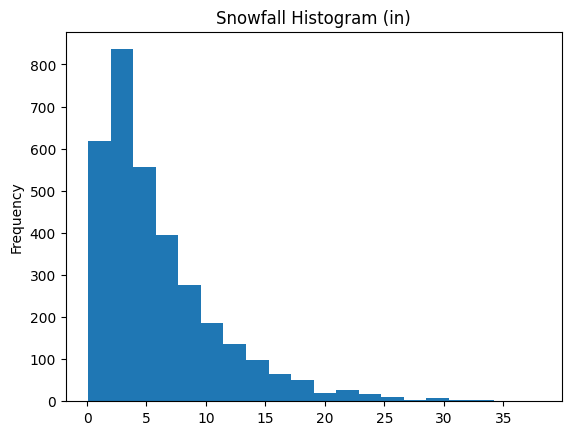

In [559]:
snow.loc[snow>0].plot.hist(bins=20, title="Snowfall Histogram (in)")
plt.show()

## 14.4 Box Plot

<Axes: >

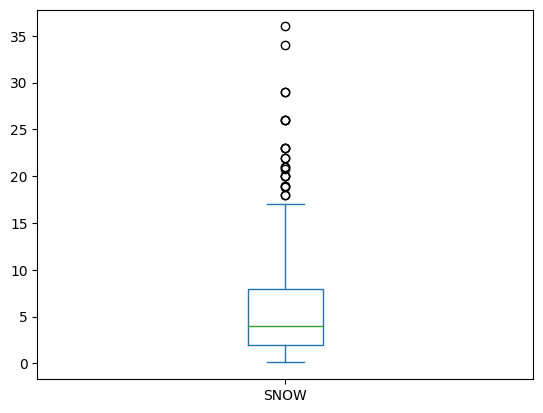

In [563]:
(snow
    [lambda s: (s.index.month == 1) & (s > 0)]
    .plot.box()
)

## 14.5 Kernel Density Estimation Plot

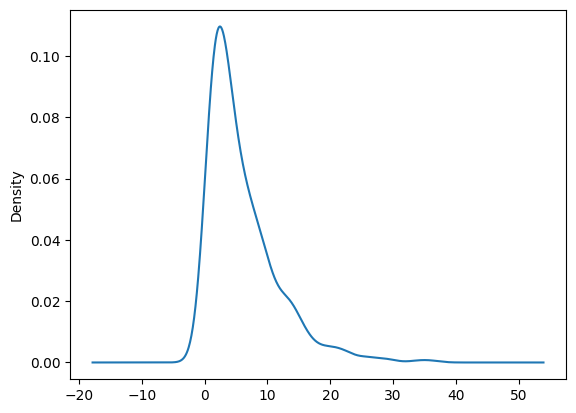

In [573]:
(snow
    [lambda s: (s.index.month == 1) & (s > 0)]
    .plot.kde()
)
plt.show()

## 14.6 Line Plots

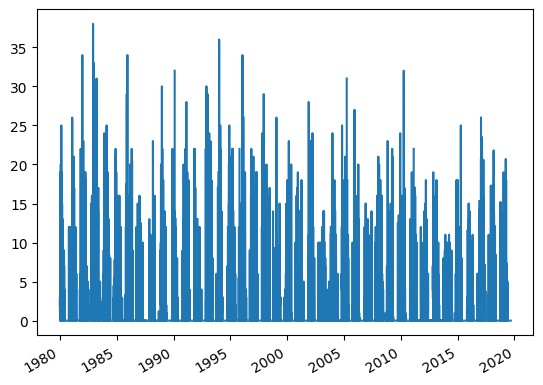

In [575]:
snow.plot.line()
plt.show()

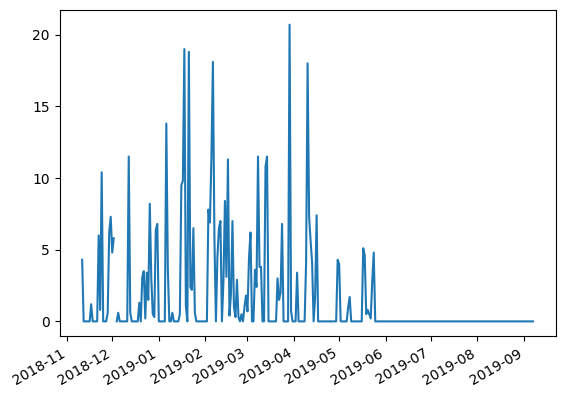

In [581]:
(snow
    .iloc[-300:]
    .plot.line()
)
plt.show()

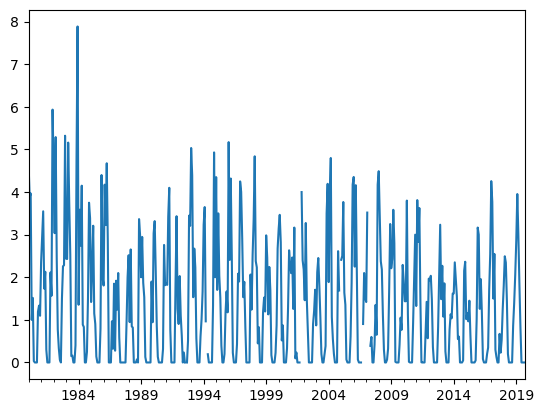

In [585]:
(snow
    .resample('M')
    .mean()
    .plot.line()
)
plt.show()

## 14.7 Line Plots with Multiple Aggregations

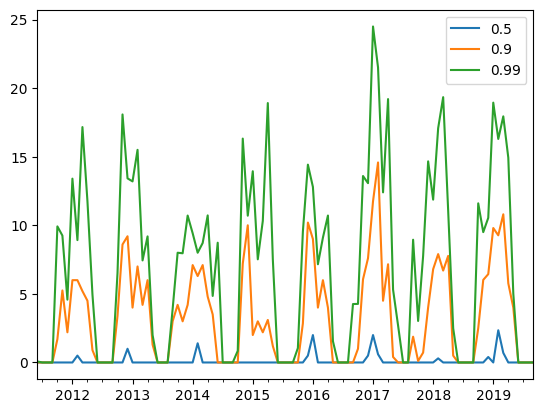

In [602]:
(snow
    .resample('M')
    .quantile([.5, .9, .99])
    .unstack() # trả về data frame
    .iloc[-100:]
    .plot.line()
)
plt.show()

## 14.8 Bar Plots

In [603]:
season2017 = (snow.loc['2016-10':'2017-05'])

In [604]:
season2017

2016-10-01    0.0
2016-10-02    0.0
2016-10-03    4.9
2016-10-04    0.0
2016-10-05    0.6
             ... 
2017-05-27    0.0
2017-05-28    0.0
2017-05-29    0.0
2017-05-30    0.0
2017-05-31    0.0
Name: SNOW, Length: 243, dtype: float64

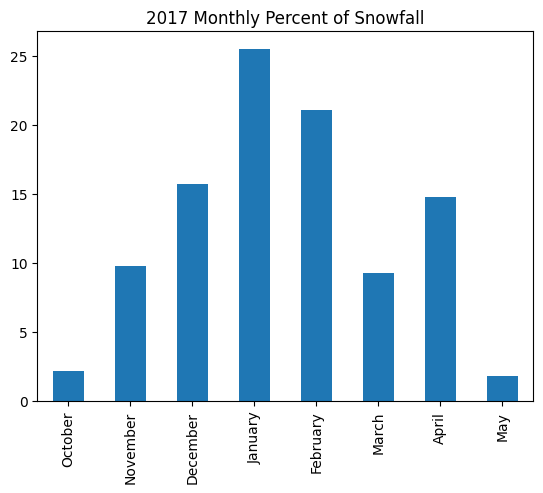

In [612]:
(season2017
    .resample('M')
    .sum()
    .div(season2017.sum())
    .mul(100)
    .rename(lambda idx: idx.month_name())
    .plot.bar(title='2017 Monthly Percent of Snowfall')
)
plt.show()

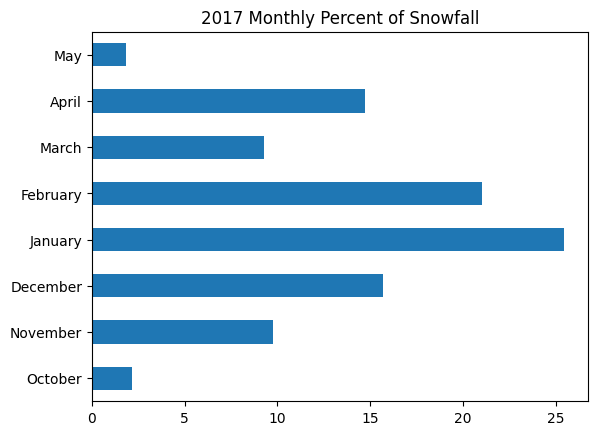

In [613]:
(season2017
    .resample('M')
    .sum()
    .div(season2017.sum())
    .mul(100)
    .rename(lambda idx: idx.month_name())
    .plot.barh(title='2017 Monthly Percent of Snowfall')
)
plt.show()

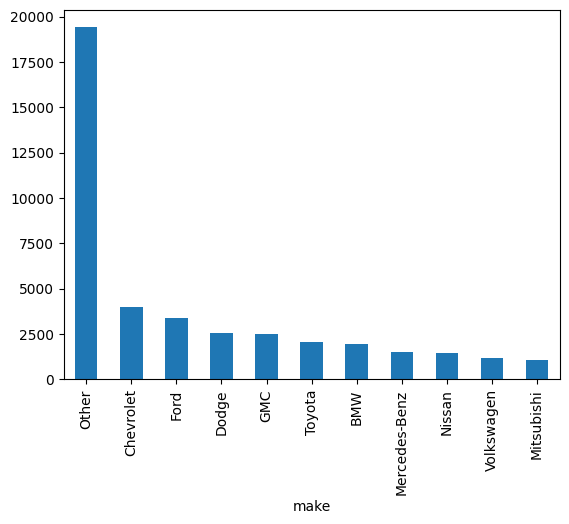

In [619]:
(make
    .where(make.isin(make.value_counts().index[:10]), 'Other') # top 10 and others
    .value_counts()
    .plot.bar()
)
plt.show()

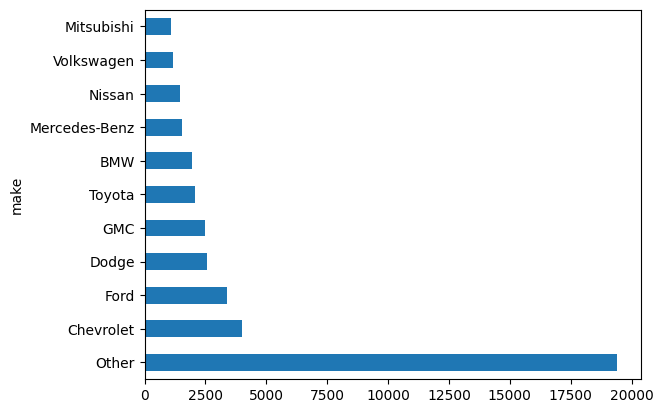

In [620]:
(make
    .where(make.isin(make.value_counts().index[:10]), 'Other') # top 10 and others
    .value_counts()
    .plot.barh()
)
plt.show()

## 14.9 Pie Plots

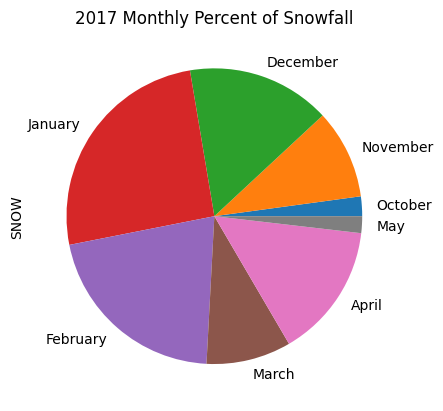

In [625]:
(season2017
    .resample('M')
    .sum()
    .div(season2017.sum())
    .mul(100)
    .rename(lambda idx: idx.month_name())
    .plot.pie(title='2017 Monthly Percent of Snowfall')
)
plt.show()

## 14.10 Styling

Dùng thư viện `seaborn` để style các hình

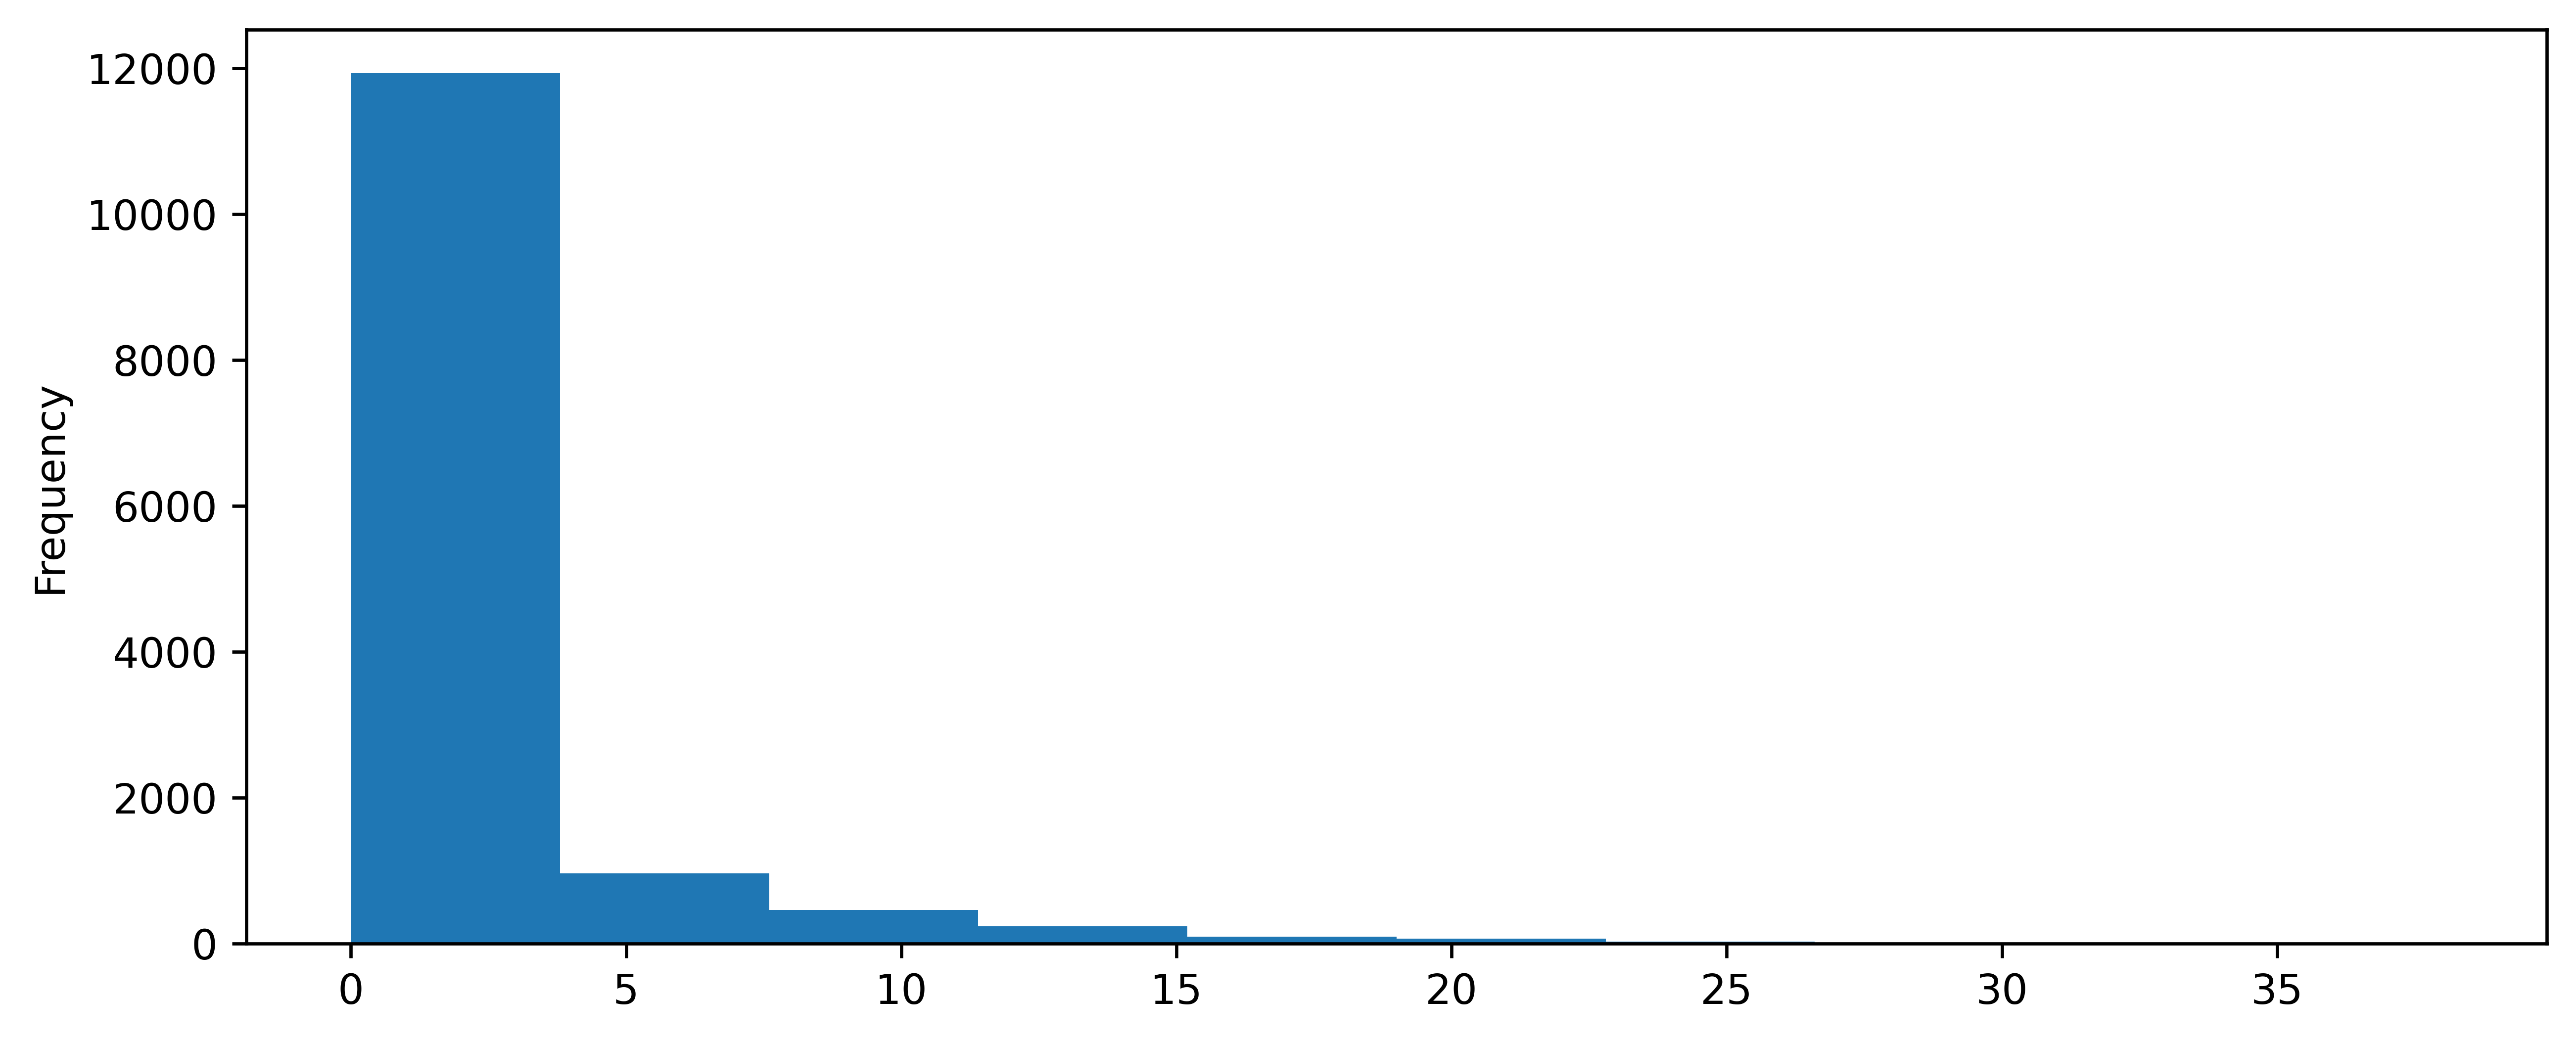

In [634]:
import matplotlib
import seaborn as sns

color_palette = ["#440154", "#482677", "#404788", "#33638d", "#287d8e",
                 "#1f968b", '#29af7f', '#55c667', '#73d055', '#b8de29', '#fde725']

# font
fp = matplotlib.font_manager.FontProperties(
    fname='/Fonts/roboto/Roboto-Condensed.ttf'
)

with sns.plotting_context(rc=dict(font='Roboto', palette=color_palette)):
    fig, ax = plt.subplots(dpi=600, figsize=(10, 4))
    snow.plot.hist()
    fig.savefig('snowhist.png', dpi=600, bbox_inches='tight')

## 14.11 Summary

`s.plot(ax=None, style=None, logx=False,
  logy=False, xticks=None, yticks=None,
  xlim=None, ylim=None, xlabel=None,
  ylabel=None, rot=None, fontsize=None,
  colormap=None, table=False, **kwargs)`

Common plot parameters. Use ax to use existing Matplotlib axes, style for color and marker style (see matplotlib.marker), _ticks to specify tick locations, _lim to specify tick limits, _label to specify x/y label (default to index/column name), rot to rotate labels, fontsize for tick label size, colormap for coloring, position, table to create table with data. Additional arguments are passed to plt.plot

`s.plot.bar(position=.5, color=None)`
Create a bar plot. Use position to specify label alignment (0-left, 1-right). Use color (string, list) to specify line color.

`s.plot.barh(x=None, y=None, color=None)`
Create a horizontal bar plot. Use position to specify label alignment (0-left, 1-right). Use color (string, list) to specify line color.

`s.plot.hist(bins=10)`
Create a histogram. Use bins to change the number of bins.

`s.plot.box()`
Create a boxplot.

`s.plot.kde(bw_method='scott', ind=None)`
Create a Kernel Density Estimate plot. Use bw_method
to calculate estimator bandwidth (see scipy.stats.gaussian_kde). Use ind to specify evaluation points for PDF estimation (NumPy array of points, or integer with equally spaced points).

`s.plot.line(color=None)`
Create a line plot. Use color to specify line color.

`s.plot.pie()`
Create a pie plot.

## 14.12 Exercises

**1. Create a histogram from a numeric column. Change the bin size.**

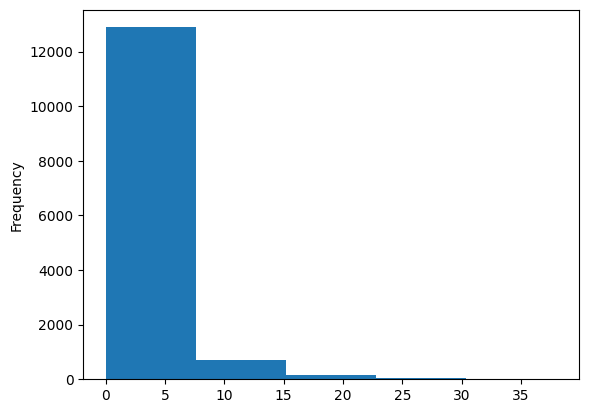

In [639]:
snow.plot.hist(bins=5)
plt.show()

**2. Create a boxplot from a numeric column.**

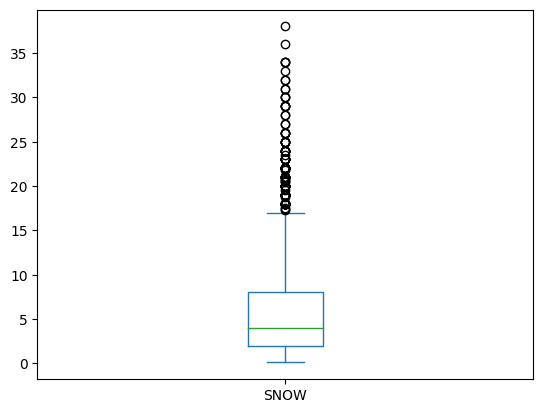

In [644]:
snow[snow != 0].plot.box()
plt.show()

**3. Create a Kernel Density Estimate plot from a numeric column.**

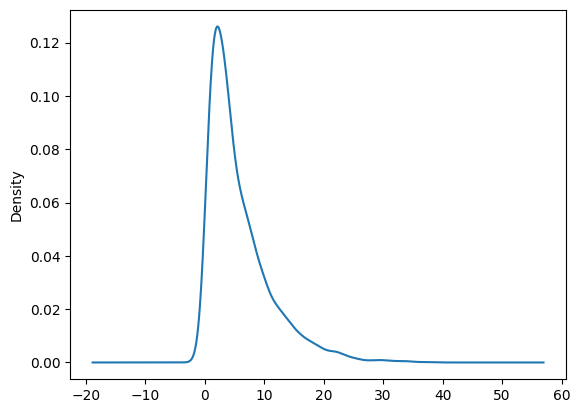

In [647]:
snow[snow != 0].plot.kde()
plt.show()

**4. Create a line from a numeric column.**

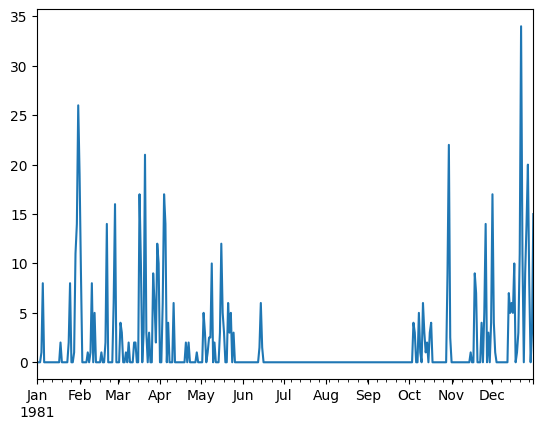

In [664]:
snow.loc['1981'].plot.line()
plt.show()

**5. Create a bar plot from a frequency count of a categorical column.**

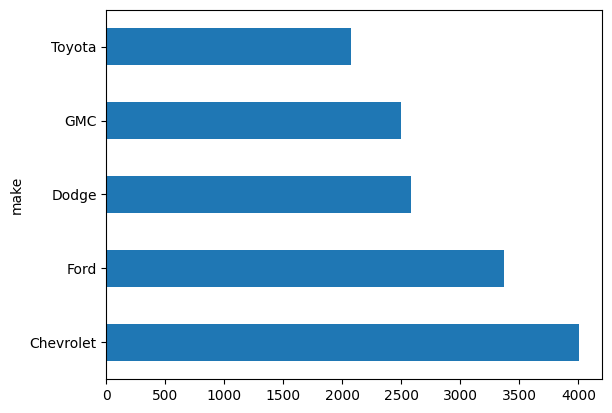

In [663]:
make.value_counts().head().plot.barh()
plt.show()

**6. Create a pie plot from a frequency count of a categorical column.**

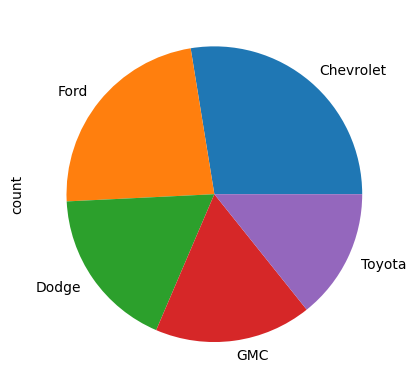

In [662]:
make.value_counts().head().plot.pie()
plt.show()

# Chapter 15: Categorical Manipulation

## 15.2 Frequency Counts

In [666]:
make.value_counts()

make
Chevrolet                      4003
Ford                           3371
Dodge                          2583
GMC                            2494
Toyota                         2071
                               ... 
Volga Associated Automobile       1
Panos                             1
Mahindra                          1
Excalibur Autos                   1
London Coach Co Inc               1
Name: count, Length: 136, dtype: int64

<br>

Đếm số lượng phần tử unique

In [668]:
make.shape, make.nunique()

((41144,), 136)

41144 phần tử với 136 categories

## 15.3 Benefits of Categories

dùng categories tốt ít dữ liệu hơn, và tăng performance

In [669]:
cat_make = make.astype('category')

In [671]:
make.memory_usage(deep=True)

2606399

In [672]:
cat_make.memory_usage(deep=True)

95892

In [673]:
%%timeit
cat_make.str.upper()

572 µs ± 1.86 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [674]:
%%timeit
make.str.upper()

6.06 ms ± 574 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 15.4 Conversion to Ordinal Categories

In [684]:
ordered_make = make.astype(
    pd.CategoricalDtype(
        categories=sorted(make.unique()),
        ordered=True
    )
)

ordered_make

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: category
Categories (136, object): ['AM General' < 'ASC Incorporated' < 'Acura' < 'Alfa Romeo' ... 'Volvo' < 'Wallace Environmental' < 'Yugo' < 'smart']

In [686]:
ordered_make.max() # max categories

'smart'

In [690]:
try:
    cat_make.max()
except TypeError as err:
    print(err)

Categorical is not ordered for operation max
you can use .as_ordered() to change the Categorical to an ordered one



Đối với ordered cate, nếu sort values thì nó sẽ sắp xếp theo cate

In [691]:
ordered_make.sort_values()

20288    AM General
20289    AM General
369      AM General
358      AM General
19314    AM General
            ...    
31289         smart
31290         smart
29605         smart
22974         smart
26882         smart
Name: make, Length: 41144, dtype: category
Categories (136, object): ['AM General' < 'ASC Incorporated' < 'Acura' < 'Alfa Romeo' ... 'Volvo' < 'Wallace Environmental' < 'Yugo' < 'smart']

## 15.5 The `.cat` Accessor

In [698]:
cat_make.cat.rename_categories(
    [c.lower() for c in cat_make.cat.categories]
)

0        alfa romeo
1           ferrari
2             dodge
3             dodge
4            subaru
            ...    
41139        subaru
41140        subaru
41141        subaru
41142        subaru
41143        subaru
Name: make, Length: 41144, dtype: category
Categories (136, object): ['am general', 'asc incorporated', 'acura', 'alfa romeo', ..., 'volvo', 'wallace environmental', 'yugo', 'smart']

In [700]:
cat_make.cat.rename_categories(
    {c:c.lower() for c in cat_make.cat.categories}
)

0        alfa romeo
1           ferrari
2             dodge
3             dodge
4            subaru
            ...    
41139        subaru
41140        subaru
41141        subaru
41142        subaru
41143        subaru
Name: make, Length: 41144, dtype: category
Categories (136, object): ['am general', 'asc incorporated', 'acura', 'alfa romeo', ..., 'volvo', 'wallace environmental', 'yugo', 'smart']

## 15.6 Category Gotchas

Khi dùng value counts hay groupby thì nó cũng group với nhóm không tồn tại

Ví dụ đếm ra giá trị 0

In [716]:
ordered_make.iloc[:100].value_counts()

make
Dodge                        17
Oldsmobile                    8
Ford                          8
Buick                         7
Chevrolet                     5
                             ..
Grumman Allied Industries     0
Goldacre                      0
Geo                           0
Genesis                       0
smart                         0
Name: count, Length: 136, dtype: int64

In [718]:
(cat_make
    .iloc[:100]
    .groupby(cat_make.iloc[:100])
    .first()
)

make
AM General                            NaN
ASC Incorporated                      NaN
Acura                                 NaN
Alfa Romeo                     Alfa Romeo
American Motors Corporation           NaN
                                  ...    
Volkswagen                     Volkswagen
Volvo                               Volvo
Wallace Environmental                 NaN
Yugo                                  NaN
smart                                 NaN
Name: make, Length: 136, dtype: category
Categories (136, object): ['AM General', 'ASC Incorporated', 'Acura', 'Alfa Romeo', ..., 'Volvo', 'Wallace Environmental', 'Yugo', 'smart']

<br>
Bỏ qua group không thấy trong groupby

In [720]:
(cat_make
    .iloc[:100]
    .groupby(cat_make.iloc[:100], observed=True)
    .first()
)

make
Alfa Romeo          Alfa Romeo
Audi                      Audi
BMW                        BMW
Buick                    Buick
CX Automotive    CX Automotive
Cadillac              Cadillac
Chevrolet            Chevrolet
Chrysler              Chrysler
Dodge                    Dodge
Ferrari                Ferrari
Ford                      Ford
Hyundai                Hyundai
Infiniti              Infiniti
Lexus                    Lexus
Mazda                    Mazda
Mercury                Mercury
Nissan                  Nissan
Oldsmobile          Oldsmobile
Plymouth              Plymouth
Pontiac                Pontiac
Rolls-Royce        Rolls-Royce
Subaru                  Subaru
Toyota                  Toyota
Volkswagen          Volkswagen
Volvo                    Volvo
Name: make, dtype: category
Categories (136, object): ['AM General', 'ASC Incorporated', 'Acura', 'Alfa Romeo', ..., 'Volvo', 'Wallace Environmental', 'Yugo', 'smart']

## 15.7 Generalization

In [721]:
cat_make

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: category
Categories (136, object): ['AM General', 'ASC Incorporated', 'Acura', 'Alfa Romeo', ..., 'Volvo', 'Wallace Environmental', 'Yugo', 'smart']

In [722]:
def generalize_topn(ser: pd.Series, n=5, other='Other'):
    topn = ser.value_counts().index[:n]
    if isinstance(ser.dtype, pd.CategoricalDtype):
        ser = ser.cat.set_categories(
            topn.set_categories(list(topn)+[other])
        )
    return ser.where(ser.isin(topn), other)

In [723]:
cat_make.pipe(generalize_topn, n=20, other='NA')

0            NA
1            NA
2         Dodge
3         Dodge
4        Subaru
          ...  
41139    Subaru
41140    Subaru
41141    Subaru
41142    Subaru
41143    Subaru
Name: make, Length: 41144, dtype: category
Categories (21, object): ['Chevrolet', 'Ford', 'Dodge', 'GMC', ..., 'Volvo', 'Hyundai', 'Chrysler', 'NA']

In [724]:
def generalize_mapping(ser, mapping, default): 
    seen = None
    res = ser.astype(str)
    for old, new in mapping.items():
        mask = ser.str.contains(old) 
        if seen is None:
            seen = mask 
        else:
            seen |= mask
        res = res.where(~mask, new)
    res = res.where(seen, default)
    return res.astype('category')

In [725]:
generalize_mapping(cat_make, 
                   {'Ford': 'US', 
                    'Tesla': 'US', 
                    'Chevrolet': 'US', 
                    'Dodge': 'US',
                    'Oldsmobile': 'US', 
                    'Plymouth': 'US',
                    'BMW': 'German'}, 'Other')

0        Other
1        Other
2           US
3           US
4        Other
         ...  
41139    Other
41140    Other
41141    Other
41142    Other
41143    Other
Name: make, Length: 41144, dtype: category
Categories (3, object): ['German', 'Other', 'US']

## 15.8 Summary

`.astype(dtype)`
Return a series converted to categories. Set dtype to 'category' for unordered category, CategoricalDType for ordered category.

`pd.CategoricalDtype(categories, ordered=False)`
Create categorical type. Set categories to a list of categories.

`pd.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)`

Bin values from x (a series). If bins is an integer, use equal-width bins. If bins is a list of numbers (defining minimum and maximum positions) use those for the edges. right defines whether the right edge is open or closed. labels allows us to specify bin names. Out of bounds values will be missing.

`pd.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')`

Bin values from x (a series) into q equal-sized bins (10 for decile quantiles, 4 for quartile quantiles). Alternatively, we can pass in a list of quantile edges. Out of bounds values will be missing.

`.cat.add_categories(new_categories)`

Return a series with the new categories added. If it is ordinal, the new values are added at the end (highest).

`.cat.as_ordered()`

Convert categorical series to an ordered series. Use `.reorder_categories` or `CategoricalDtype` to specify the order.

`.cat.categories`
Property with the index of categories.

`.cat.codes` Property with a series with category codes (index
into a category).

`.cat.ordered` Boolean property if series is ordered.

`.cat.remove_categories(removals)` 

Return a series with the categories removed (replace
with NaN).

`.cat.remove_unused_categories()` 

Return a series with the categories removed that are
being used.

`.cat.rename_categories(new_categories)`

Return a series with the categories replaced by a list (with new values) or a dictionary (mapping old to new values).

`.cat.reorder_categories(new_categories)`

Return a series with the categories replaced by a list.

`.cat.set_categories(new_categories, ordered=False, rename=False)`

Return a series with the categories replaced by a list.

## 15.9 Exercises

**1. Convert a text column into a categorical column. How much memory did you save?**

In [733]:
make.astype('category').memory_usage(deep=True)

95892

**2. Convert a numeric column into a categorical column by binning it (pd.cut). How much memory did you save?**

In [754]:
import numpy as np
s = pd.Series(np.random.normal(size=10000))
s.pipe(pd.qcut, q = [0, .25, .5, .75, 1])

0       (-0.684, -0.00958]
1         (-3.737, -0.684]
2       (-0.684, -0.00958]
3       (-0.684, -0.00958]
4         (-3.737, -0.684]
               ...        
9995      (-3.737, -0.684]
9996     (-0.00958, 0.672]
9997        (0.672, 3.672]
9998      (-3.737, -0.684]
9999        (0.672, 3.672]
Length: 10000, dtype: category
Categories (4, interval[float64, right]): [(-3.737, -0.684] < (-0.684, -0.00958] < (-0.00958, 0.672] < (0.672, 3.672]]

**3. Use the generalize_topn function to limit the amounts of categories in your column. How much memory did you save?**

In [793]:
def generalize_topn(ser: pd.Series, topn=5, other='Other') -> pd.Series:
    if (isinstance(ser.dtype, pd.CategoricalDtype)):
        topn = ser.value_counts().head(topn).index
        ser = ser.cat.set_categories(list(topn)+[other]).where(ser.isin(topn), other)
    return(ser)

In [796]:
cat_make.pipe(generalize_topn, topn=3).value_counts()

make
Other        31187
Chevrolet     4003
Ford          3371
Dodge         2583
Name: count, dtype: int64

In [797]:
cat_make.pipe(generalize_topn, topn=3).memory_usage(deep=True)

41699

# 16 Dataframes

## 16.3 Dataframes

In [798]:
import pandas as pd
df = pd.DataFrame({
    'growth': [.5, .7, 1.2],
    'name': ['Paul', 'George', 'Ringo']
})

In [799]:
df

growth    name
0     0.5    Paul
1     0.7  George
2     1.2   Ringo

In [802]:
df.iloc[2]

growth      1.2
name      Ringo
Name: 2, dtype: object

In [808]:
df['name']

0      Paul
1    George
2     Ringo
Name: name, dtype: object

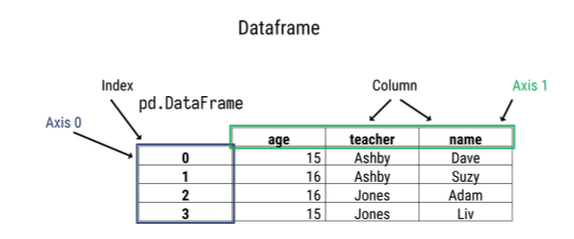

In [810]:
type(df['name'])

pandas.core.series.Series

In [812]:
df['name'].str.lower()

0      paul
1    george
2     ringo
Name: name, dtype: object

## 16.4 Construction

dataframes can be created from many types of input:
- columns (dicts of lists)
- rows (list of dicts)
- CSV files (pd.read_csv)
- NumPy ndarrays
- other: SQL, HDF5, arrow, etc

`pd.read_csv()` có option dtype là str hoặc dict về các type của các cột

Ví dụ {'a': np.float64, 'b': np.int32, 'c': 'Int64'}

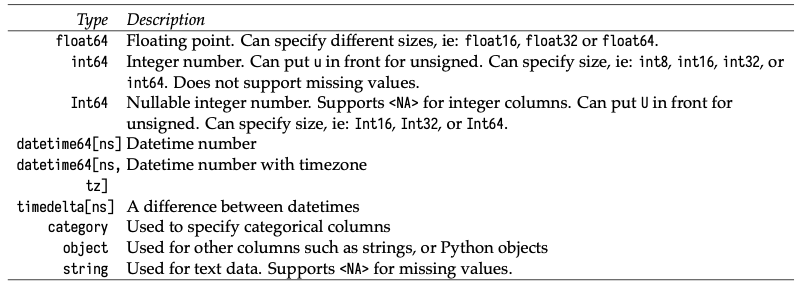

In [818]:
import numpy as np
np.random.seed(123)
pd.DataFrame(np.random.rand(10, 3), columns=('a', 'b', 'c'))

a         b         c
0  0.696469  0.286139  0.226851
1  0.551315  0.719469  0.423106
2  0.980764  0.684830  0.480932
3  0.392118  0.343178  0.729050
4  0.438572  0.059678  0.398044
5  0.737995  0.182492  0.175452
6  0.531551  0.531828  0.634401
7  0.849432  0.724455  0.611024
8  0.722443  0.322959  0.361789
9  0.228263  0.293714  0.630976

## 16.5 Dataframe Axis

- `1` là các cột
- `0` là các dòng

In [819]:
df.axes

[RangeIndex(start=0, stop=3, step=1),
 Index(['growth', 'name'], dtype='object')]

In [820]:
df.sum(axis=0)

growth                2.4
name      PaulGeorgeRingo
dtype: object

In [823]:
df.sum(axis='index')

growth                2.4
name      PaulGeorgeRingo
dtype: object

In [825]:
# df.sum(axis=1)
# df.sum(axis='columns')

## 16.7 Exercises

**1. Create a dataframe with the names of your colleagues, their age (or an estimate), and their title.**

In [827]:
df1 = pd.DataFrame(
    {
        'name': ['A', 'B', 'C'],
        'age': [15, 13, 23],
        'title': ['abc', 'edf', 'xyz']
    }
)

df1

name  age title
0    A   15   abc
1    B   13   edf
2    C   23   xyz

**2. Capitalize the values in the name column.**

In [828]:
df1['name'] = df['name'].str.upper()

In [829]:
df1

name  age title
0    PAUL   15   abc
1  GEORGE   13   edf
2   RINGO   23   xyz

**3. Sum up the values of the age column.**

In [833]:
df1['age'].sum()

51

# 17 Similarities with `Series` and DataFrame

## 17.1 Getting the Data

In [839]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/' \
      'siena2018-pres.csv'

In [840]:
df = pd.read_csv(url, index_col=0)

In [842]:
df.head()

Seq.          President                  Party  Bg  Im  Int  IQ   L  WR  AC  \
1    1  George Washington            Independent   7   7    1  10   1   6   2   
2    2         John Adams             Federalist   3  13    4   4  24  14  31   
3    3   Thomas Jefferson  Democratic-Republican   2   2   14   1   8   5  14   
4    4      James Madison  Democratic-Republican   4   6    7   3  16  15   6   
5    5       James Monroe  Democratic-Republican   9  14   11  18   6  16   7   

   ...  PL  RC  CAp  HE  EAp  DA  FPA  AM  EV   O  
1  ...  18   1    1   1    1   2    2   1   2   1  
2  ...  28  17    4  13   15  19   13  16  10  14  
3  ...   5   5    7  20    4   6    9   7   5   5  
4  ...   9  10    6  14    7  11   19  11   8   7  
5  ...  12   8   11   9    9  10    5   6   9   8  

[5 rows x 24 columns]

In [843]:
df.dtypes

Seq.         object
President    object
Party        object
Bg            int64
Im            int64
Int           int64
IQ            int64
L             int64
WR            int64
AC            int64
EAb           int64
LA            int64
CAb           int64
OA            int64
PL            int64
RC            int64
CAp           int64
HE            int64
EAp           int64
DA            int64
FPA           int64
AM            int64
EV            int64
O             int64
dtype: object

In [854]:
def tweak_siena_pres(df):
    def int64_to_uint8(df_):
        cols = df_.select_dtypes('int64')
        return (df_.astype({col:'uint8' for col in cols}))
    return (df
            .rename(columns={'Seq.':'Seq'}) # 1
            .rename(columns={k:v.replace(' ', '_') for k,v in
                {'Bg': 'Background',
                'PL': 'Party leadership', 
                'CAb': 'Communication ability',
                'RC': 'Relations with Congress',
                'CAp': 'Court appointments',
                'HE': 'Handling of economy',
                'L': 'Luck',
                'AC': 'Ability to compromise',
                'WR': 'Willing to take risks',
                'EAp': 'Executive appointments',
                'OA': 'Overall ability',
                'Im': 'Imagination',
                'DA': 'Domestic accomplishments',
                'Int': 'Integrity',
                'EAb': 'Executive ability',
                'FPA': 'Foreign policy accomplishments',
                'LA': 'Leadership ability',
                'IQ': 'Intelligence', 
                'AM': 'Avoid crucial mistakes',
                'EV': "Experts' view",
                 'O': 'Overall'}.items()})
            .astype({'Party':'category'}) # 2
            .pipe(int64_to_uint8) # 3
            .assign(
                Average_rank=lambda df_:(df_.select_dtypes('uint8') # 4
                    .sum(axis=1).rank(method='dense').astype('uint8')),
                Quartile=lambda df_:pd.qcut(df_.Average_rank, 4,
                    labels=['1st', '2nd', '3rd', '4th'])
            )
           )

In [856]:
pres = df.pipe(tweak_siena_pres)
pres.head()

Seq          President                  Party  Background  Imagination  \
1   1  George Washington            Independent           7            7   
2   2         John Adams             Federalist           3           13   
3   3   Thomas Jefferson  Democratic-Republican           2            2   
4   4      James Madison  Democratic-Republican           4            6   
5   5       James Monroe  Democratic-Republican           9           14   

   Integrity  Intelligence  Luck  Willing_to_take_risks  \
1          1            10     1                      6   
2          4             4    24                     14   
3         14             1     8                      5   
4          7             3    16                     15   
5         11            18     6                     16   

   Ability_to_compromise  ...  Court_appointments  Handling_of_economy  \
1                      2  ...                   1                    1   
2                     31  ...                   4                   13   
3                     14  ...                   7                   20   
4                      6  ...                   6                   14   
5                      7  ...                  11                    9   

   Executive_appointments  Domestic_accomplishments  \
1                       1                         2   
2                      15                        19   
3                       4                         6   
4                       7                        11   
5                       9                        10   

   Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
1                               2                       1              2   
2                              13                      16             10   
3                               9                       7              5   
4                              19                      11              8   
5                               5                       6              9   

   Overall  Average_rank  Quartile  
1        1             1       1st  
2       14            13       2nd  
3        5             5       1st  
4        7             7       1st  
5        8             8       1st  

[5 rows x 26 columns]

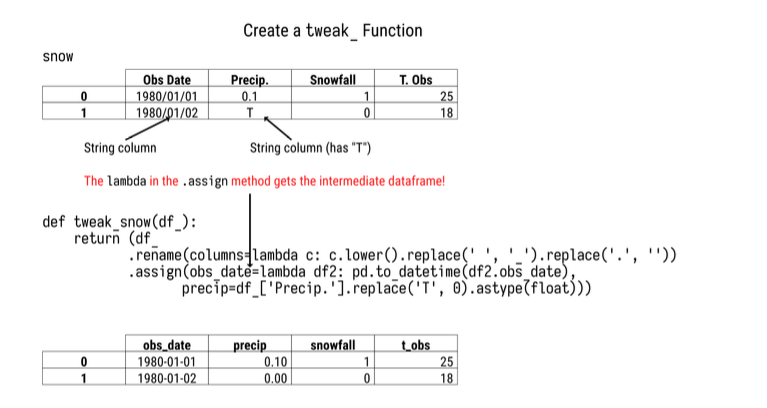

The first call to `.rename` (#1) removes the period from the column named $Seq..$ The next .rename call uses a dictionary comprehension to replace the shorted column names with the longer names but also replaces spaces with underscores. The call to `.astype` (#2) sets the type of the Party column to category. The resulting dataframe is passed to the `int64_to_uint8` function with the `.pipe` call (#3). This converts all the int64 columns to unsigned 8-bit columns (since all of the numeric data is below 44 we can store this information in a smaller type). The final call to .assign creates an `Average_rank` column by summing all of the numeric values of a row and then taking the dense rank of the resulting values. It also creates a `Quartile` column by binning the `Average_rank` column into four bins.

## 17.2 Viewing Data

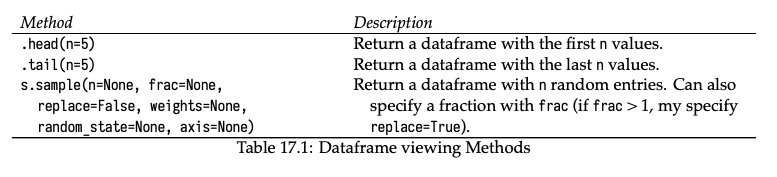

In [857]:
pres.head(3)

Seq          President                  Party  Background  Imagination  \
1   1  George Washington            Independent           7            7   
2   2         John Adams             Federalist           3           13   
3   3   Thomas Jefferson  Democratic-Republican           2            2   

   Integrity  Intelligence  Luck  Willing_to_take_risks  \
1          1            10     1                      6   
2          4             4    24                     14   
3         14             1     8                      5   

   Ability_to_compromise  ...  Court_appointments  Handling_of_economy  \
1                      2  ...                   1                    1   
2                     31  ...                   4                   13   
3                     14  ...                   7                   20   

   Executive_appointments  Domestic_accomplishments  \
1                       1                         2   
2                      15                        19   
3                       4                         6   

   Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
1                               2                       1              2   
2                              13                      16             10   
3                               9                       7              5   

   Overall  Average_rank  Quartile  
1        1             1       1st  
2       14            13       2nd  
3        5             5       1st  

[3 rows x 26 columns]

In [859]:
pres.sample(3) # chọn random 1 vài quan sát

Seq         President                  Party  Background  Imagination  \
5   5      James Monroe  Democratic-Republican           9           14   
3   3  Thomas Jefferson  Democratic-Republican           2            2   
8   8  Martin Van Buren             Democratic          23           22   

   Integrity  Intelligence  Luck  Willing_to_take_risks  \
5         11            18     6                     16   
3         14             1     8                      5   
8         27            25    34                     28   

   Ability_to_compromise  ...  Court_appointments  Handling_of_economy  \
5                      7  ...                  11                    9   
3                     14  ...                   7                   20   
8                     20  ...                  25                   31   

   Executive_appointments  Domestic_accomplishments  \
5                       9                        10   
3                       4                         6   
8                      26                        29   

   Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
5                               5                       6              9   
3                               9                       7              5   
8                              27                      24             28   

   Overall  Average_rank  Quartile  
5        8             8       1st  
3        5             5       1st  
8       25            25       3rd  

[3 rows x 26 columns]

In [860]:
pres.tail(3)

Seq       President       Party  Background  Imagination  Integrity  \
42  43  George W. Bush  Republican          17           29         33   
43  44    Barack Obama  Democratic          24           11         13   
44  45    Donald Trump  Republican          43           40         44   

    Intelligence  Luck  Willing_to_take_risks  Ability_to_compromise  ...  \
42            41    21                     20                     28  ...   
43             9    15                     23                     16  ...   
44            44    10                     25                     42  ...   

    Court_appointments  Handling_of_economy  Executive_appointments  \
42                  28                   36                      29   
43                  14                   10                      13   
44                  40                   39                      44   

    Domestic_accomplishments  Foreign_policy_accomplishments  \
42                        30                              38   
43                        13                              20   
44                        40                              42   

    Avoid_crucial_mistakes  Experts'_view  Overall  Average_rank  Quartile  
42                      36             34       33            33       3rd  
43                      10             11       17            17       2nd  
44                      41             42       42            42       4th  

[3 rows x 26 columns]

# 18 Math Methods in DataFrames

## 18.1 Index Alignment

In [862]:
scores = (pres
    .loc[:,'Background':'Average_rank']
)

scores.head()

Background  Imagination  Integrity  Intelligence  Luck  \
1           7            7          1            10     1   
2           3           13          4             4    24   
3           2            2         14             1     8   
4           4            6          7             3    16   
5           9           14         11            18     6   

   Willing_to_take_risks  Ability_to_compromise  Executive_ability  \
1                      6                      2                  2   
2                     14                     31                 21   
3                      5                     14                  6   
4                     15                      6                 13   
5                     16                      7                 10   

   Leadership_ability  Communication_ability  ...  Relations_with_Congress  \
1                   1                     11  ...                        1   
2                  21                     13  ...                       17   
3                   6                      4  ...                        5   
4                  17                     10  ...                       10   
5                  12                     15  ...                        8   

   Court_appointments  Handling_of_economy  Executive_appointments  \
1                   1                    1                       1   
2                   4                   13                      15   
3                   7                   20                       4   
4                   6                   14                       7   
5                  11                    9                       9   

   Domestic_accomplishments  Foreign_policy_accomplishments  \
1                         2                               2   
2                        19                              13   
3                         6                               9   
4                        11                              19   
5                        10                               5   

   Avoid_crucial_mistakes  Experts'_view  Overall  Average_rank  
1                       1              2        1             1  
2                      16             10       14            13  
3                       7              5        5             5  
4                      11              8        7             7  
5                       6              9        8             8  

[5 rows x 22 columns]

In [863]:
s1 = scores.iloc[:3, :4]
s1

Background  Imagination  Integrity  Intelligence
1           7            7          1            10
2           3           13          4             4
3           2            2         14             1

In [864]:
s2 = scores.iloc[1:6, :5]
s2

Background  Imagination  Integrity  Intelligence  Luck
2           3           13          4             4    24
3           2            2         14             1     8
4           4            6          7             3    16
5           9           14         11            18     6
6           1            9          6             5    29

In [865]:
s1 + s2

Background  Imagination  Integrity  Intelligence  Luck
1         NaN          NaN        NaN           NaN   NaN
2         6.0         26.0        8.0           8.0   NaN
3         4.0          4.0       28.0           2.0   NaN
4         NaN          NaN        NaN           NaN   NaN
5         NaN          NaN        NaN           NaN   NaN
6         NaN          NaN        NaN           NaN   NaN

## 18.2 Duplicate Index Entries

In [875]:
pd.concat([scores.iloc[1:6, :5]]*2)

Background  Imagination  Integrity  Intelligence  Luck
2           3           13          4             4    24
3           2            2         14             1     8
4           4            6          7             3    16
5           9           14         11            18     6
6           1            9          6             5    29
2           3           13          4             4    24
3           2            2         14             1     8
4           4            6          7             3    16
5           9           14         11            18     6
6           1            9          6             5    29

In [876]:
pd.concat([scores.iloc[1:6, :5]]*2) + scores.iloc[:3, :4]

Background  Imagination  Integrity  Intelligence  Luck
1         NaN          NaN        NaN           NaN   NaN
2         6.0         26.0        8.0           8.0   NaN
2         6.0         26.0        8.0           8.0   NaN
3         4.0          4.0       28.0           2.0   NaN
3         4.0          4.0       28.0           2.0   NaN
4         NaN          NaN        NaN           NaN   NaN
4         NaN          NaN        NaN           NaN   NaN
5         NaN          NaN        NaN           NaN   NaN
5         NaN          NaN        NaN           NaN   NaN
6         NaN          NaN        NaN           NaN   NaN
6         NaN          NaN        NaN           NaN   NaN

In [877]:
pd.concat([scores.iloc[1:6, :5]]*2).index.duplicated().any()

True

## 18.3 Summary

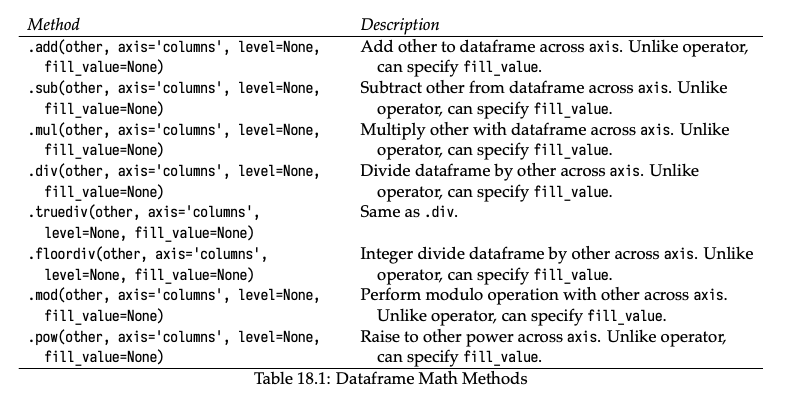

## 18.4 Exercises

**1. Create a dataframe from the data and add it to itself.**

In [887]:
import numpy as np
np.random.seed(123)
df = pd.DataFrame(np.random.randint(5, size=(3, 3)), columns=('a', 'b', 'c'))
df

a  b  c
0  2  4  2
1  1  3  2
2  3  1  1

In [888]:
df.add(df)

a  b  c
0  4  8  4
1  2  6  4
2  6  2  2

**2. Create a dataframe from the data and multiply it by two.**

In [889]:
df.mul(2)

a  b  c
0  4  8  4
1  2  6  4
2  6  2  2

# 19 Looping and Aggregation

## 19.1 For Loops

**Lặp qua các cột**

In [895]:
for colname in pres:
    print(colname)

Seq
President
Party
Background
Imagination
Integrity
Intelligence
Luck
Willing_to_take_risks
Ability_to_compromise
Executive_ability
Leadership_ability
Communication_ability
Overall_ability
Party_leadership
Relations_with_Congress
Court_appointments
Handling_of_economy
Executive_appointments
Domestic_accomplishments
Foreign_policy_accomplishments
Avoid_crucial_mistakes
Experts'_view
Overall
Average_rank
Quartile


**Loop qua các quan sát**

In [905]:
for idx, row in pres.head().iterrows():
    print(idx, type(row))

1 <class 'pandas.core.series.Series'>
2 <class 'pandas.core.series.Series'>
3 <class 'pandas.core.series.Series'>
4 <class 'pandas.core.series.Series'>
5 <class 'pandas.core.series.Series'>


**Lặp qua 1 dòng với các tuples, index, cols, ...**

In [904]:
for tup in pres.head().itertuples():
    print(tup[0])

1
2
3
4
5


## 19.2 Aggregations

In [906]:
scores = (pres
    .loc[:,'Background':'Average_rank']
)

In [908]:
scores.head().sum(axis='columns') / len(scores.head().columns)

1     3.681818
2    14.454545
3     6.545455
4     9.636364
5    10.454545
dtype: float64

In [928]:
(scores
    .agg(['count', 'size','sum',lambda col: col.loc[1]])
    .rename(index={'sum': 'total', '<lambda>': 'value'})
)

Background Imagination Integrity Intelligence Luck  \
count         44          44        44           44   44   
size          44          44        44           44   44   
total        968         957       990          990  990   
value          7           7         1           10    1   

      Willing_to_take_risks Ability_to_compromise Executive_ability  \
count                    44                    44                44   
size                     44                    44                44   
total                   953                   968               978   
value                     6                     2                 2   

      Leadership_ability Communication_ability  ... Relations_with_Congress  \
count                 44                    44  ...                      44   
size                  44                    44  ...                      44   
total                990                   990  ...                     979   
value                  1                    11  ...                       1   

      Court_appointments Handling_of_economy Executive_appointments  \
count                 44                  44                     44   
size                  44                  44                     44   
total                990                 990                    990   
value                  1                   1                      1   

      Domestic_accomplishments Foreign_policy_accomplishments  \
count                       44                             44   
size                        44                             44   
total                      990                            990   
value                        2                              2   

      Avoid_crucial_mistakes Experts'_view Overall Average_rank  
count                     44            44      44           44  
size                      44            44      44           44  
total                    990           990     990          990  
value                      1             2       1            1  

[4 rows x 22 columns]

In [932]:
pres.agg({
    'Luck': ['count', 'size'],
    'Overall': ['count', 'max']
})

Luck Overall
count  44.0      44
size   44.0     NaN
max     NaN      44

In [938]:
pres.agg(Intelligence_count=('Intelligence', 'count'), 
         Intelligence_size=('Intelligence', 'size'))

Intelligence
Intelligence_count            44
Intelligence_size             44

In [943]:
pres.describe()

Background  Imagination  Integrity  Intelligence       Luck  \
count   44.000000    44.000000  44.000000     44.000000  44.000000   
mean    22.000000    21.750000  22.500000     22.500000  22.500000   
std     12.409674    12.519984  12.845233     12.845233  12.845233   
min      1.000000     1.000000   1.000000      1.000000   1.000000   
25%     11.750000    11.000000  11.750000     11.750000  11.750000   
50%     22.000000    21.500000  22.500000     22.500000  22.500000   
75%     32.250000    32.250000  33.250000     33.250000  33.250000   
max     43.000000    43.000000  44.000000     44.000000  44.000000   

       Willing_to_take_risks  Ability_to_compromise  Executive_ability  \
count              44.000000              44.000000          44.000000   
mean               21.659091              22.000000          22.227273   
std                11.892822              12.409674          12.500909   
min                 1.000000               1.000000           1.000000   
25%                11.750000              11.750000          11.750000   
50%                22.500000              22.000000          22.500000   
75%                31.250000              32.250000          32.250000   
max                41.000000              43.000000          43.000000   

       Leadership_ability  Communication_ability  ...  \
count           44.000000              44.000000  ...   
mean            22.500000              22.500000  ...   
std             12.845233              12.845233  ...   
min              1.000000               1.000000  ...   
25%             11.750000              11.750000  ...   
50%             22.500000              22.500000  ...   
75%             33.250000              33.250000  ...   
max             44.000000              44.000000  ...   

       Relations_with_Congress  Court_appointments  Handling_of_economy  \
count                44.000000           44.000000            44.000000   
mean                 22.250000           22.500000            22.500000   
std                  12.519984           12.845233            12.845233   
min                   1.000000            1.000000             1.000000   
25%                  11.750000           11.750000            11.750000   
50%                  22.500000           22.500000            22.500000   
75%                  33.000000           33.250000            33.250000   
max                  43.000000           44.000000            44.000000   

       Executive_appointments  Domestic_accomplishments  \
count               44.000000                 44.000000   
mean                22.500000                 22.500000   
std                 12.845233                 12.845233   
min                  1.000000                  1.000000   
25%                 11.750000                 11.750000   
50%                 22.500000                 22.500000   
75%                 33.250000                 33.250000   
max                 44.000000                 44.000000   

       Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
count                       44.000000               44.000000      44.000000   
mean                        22.500000               22.500000      22.500000   
std                         12.845233               12.845233      12.845233   
min                          1.000000                1.000000       1.000000   
25%                         11.750000               11.750000      11.750000   
50%                         22.500000               22.500000      22.500000   
75%                         33.250000               33.250000      33.250000   
max                         44.000000               44.000000      44.000000   

         Overall  Average_rank  
count  44.000000     44.000000  
mean   22.500000     22.500000  
std    12.845233     12.845233  
min     1.000000      1.000000  
25%    11.750000     11.750000  
50%    22.500000     22.500000  
75%    33.250000     33.250000  
ma

## 19.3 The `.apply` Method

Apply thực hiệp lặp qua từng dòng hoặc cột,
ví dụ, tính cột max - cột min của từng dòng

In [947]:
(pres
    .select_dtypes('number')
    .apply(lambda row: row.max() - row.min(), axis=1)
)

1     17
2     28
3     19
4     16
5     13
6     28
7     34
8     18
9     22
10    19
11    16
12    15
13     8
14     3
15     8
16    27
17    10
18    21
19    13
20    21
21    24
22    12
23     8
24    21
25    13
26    19
27    28
28    10
29    26
30    31
31    15
32    27
33    18
34    28
35    38
36    31
37    23
38    35
39    28
40    19
41    36
42    24
43    22
44    34
dtype: uint8

In [949]:
# lặp qua và tính tổng các cột
pres.select_dtypes('number').apply('sum')

Background                        968
Imagination                       957
Integrity                         990
Intelligence                      990
Luck                              990
Willing_to_take_risks             953
Ability_to_compromise             968
Executive_ability                 978
Leadership_ability                990
Communication_ability             990
Overall_ability                   990
Party_leadership                  990
Relations_with_Congress           979
Court_appointments                990
Handling_of_economy               990
Executive_appointments            990
Domestic_accomplishments          990
Foreign_policy_accomplishments    990
Avoid_crucial_mistakes            990
Experts'_view                     990
Overall                           990
Average_rank                      990
dtype: int64

In [954]:
# Tương tự nhưng phần nào nhanh hơn
pres.select_dtypes('number').sum(axis=0) # 0 = rows

Background                        968
Imagination                       957
Integrity                         990
Intelligence                      990
Luck                              990
Willing_to_take_risks             953
Ability_to_compromise             968
Executive_ability                 978
Leadership_ability                990
Communication_ability             990
Overall_ability                   990
Party_leadership                  990
Relations_with_Congress           979
Court_appointments                990
Handling_of_economy               990
Executive_appointments            990
Domestic_accomplishments          990
Foreign_policy_accomplishments    990
Avoid_crucial_mistakes            990
Experts'_view                     990
Overall                           990
Average_rank                      990
dtype: int64

## 19.4 Summary 

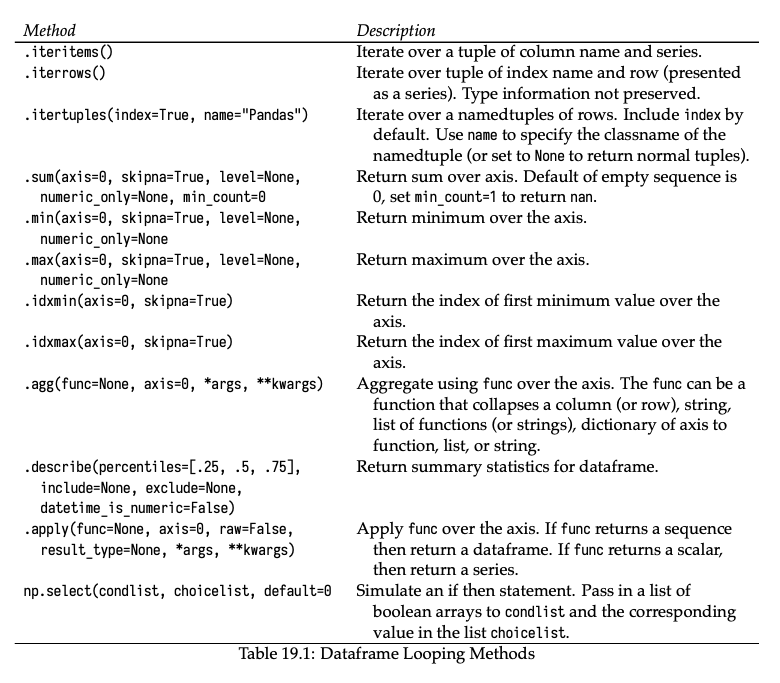

`iteritems()` đã bị bỏ pandas version mới

## 19.5 Exercises

In [956]:
df

a  b  c
0  2  4  2
1  1  3  2
2  3  1  1

**1. Loop over each of the rows and calculate the maximum and minimum value.**

In [963]:
for index, row in df.iterrows():
    print(max(row))

4
3
3


In [964]:
for index, row in df.iterrows():
    print(min(row))

2
1
1


**2. Calculate the maximum and minimum value of each row and column using the `.agg` method.**

In [966]:
df.agg(['min', 'max'])

a  b  c
min  1  1  1
max  3  4  2

In [970]:
df.agg(['min', 'max'], axis=1)

min  max
0    2    4
1    1    3
2    1    3

**3. Calculate the maximum and minimum value of each row and column using the .apply
method.**

In [971]:
df.apply(min)

a    1
b    1
c    1
dtype: int64

In [972]:
df.apply(max)

a    3
b    4
c    2
dtype: int64

In [973]:
df.apply(min, axis=1)

0    2
1    1
2    1
dtype: int64

In [974]:
df.apply(max, axis=1)

0    4
1    3
2    3
dtype: int64

# 20 Columns Types, `.assign`, and Memory Usage

## 20.1 Conversion Methods

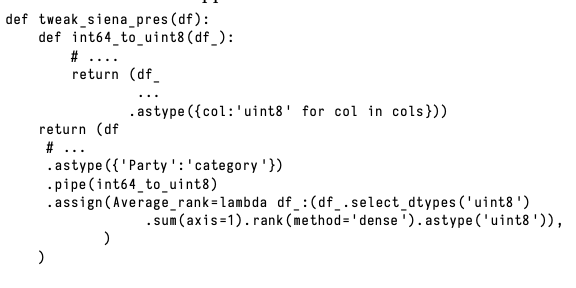

## 20.2 Memory Usage

In [976]:
pres.memory_usage(deep=True)

Index                             1424
Seq                               2590
President                         3175
Party                              624
Background                          44
Imagination                         44
Integrity                           44
Intelligence                        44
Luck                                44
Willing_to_take_risks               44
Ability_to_compromise               44
Executive_ability                   44
Leadership_ability                  44
Communication_ability               44
Overall_ability                     44
Party_leadership                    44
Relations_with_Congress             44
Court_appointments                  44
Handling_of_economy                 44
Executive_appointments              44
Domestic_accomplishments            44
Foreign_policy_accomplishments      44
Avoid_crucial_mistakes              44
Experts'_view                       44
Overall                             44
Average_rank             

In [978]:
pres.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 1 to 44
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Seq                             44 non-null     object  
 1   President                       44 non-null     object  
 2   Party                           44 non-null     category
 3   Background                      44 non-null     uint8   
 4   Imagination                     44 non-null     uint8   
 5   Integrity                       44 non-null     uint8   
 6   Intelligence                    44 non-null     uint8   
 7   Luck                            44 non-null     uint8   
 8   Willing_to_take_risks           44 non-null     uint8   
 9   Ability_to_compromise           44 non-null     uint8   
 10  Executive_ability               44 non-null     uint8   
 11  Leadership_ability              44 non-null     uint8   
 12  Communication_ability        

## 20.3 Summary

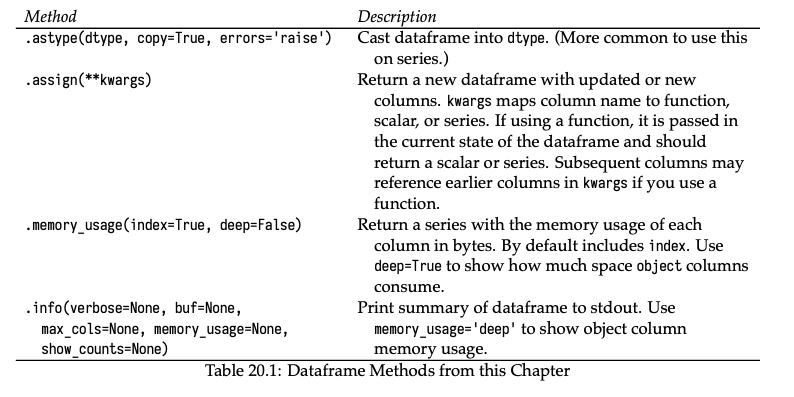

## 20.4 Exercises

**1. Find a numeric column and change the type of it. Did you save memory? Did you lose precision?**

In [980]:
df.memory_usage('deep')

Index    132
a         24
b         24
c         24
dtype: int64

In [982]:
df.assign(a_str = lambda df_:df_['a'].astype('string')).memory_usage('deep')

Index    132
a         24
b         24
c         24
a_str     24
dtype: int64